<a href="https://colab.research.google.com/github/AGiannoutsos/Image_Classification_with_Convolutional_Autoencoder/blob/main/experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://@github.com/AGiannoutsos/Image_Classification_with_Convolutional_Autoencoder.git
%cd Image_Classification_with_Convolutional_Autoencoder/

Cloning into 'Image_Classification_with_Convolutional_Autoencoder'...
remote: Enumerating objects: 183, done.
remote: Counting objects: 100% (183/183), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 183 (delta 94), reused 120 (delta 49), pack-reused 0
Receiving objects: 100% (183/183), 36.69 MiB | 8.15 MiB/s, done.
Resolving deltas: 100% (94/94), done.
/content/Image_Classification_with_Convolutional_Autoencoder


# Experiments and research for the best model

In [2]:
import keras
import numpy as np
from model import get_Classifier, train_Classifier, get_Autoencoder, train_Autoencoder
from visualization import classifier_prediction_visualization, classifier_loss_visualization, autoencoder_visualization, classifier_prediction_visualization_window
from autoencoder import load_mnist
from keras.utils import to_categorical, normalize
from keras.utils.vis_utils import plot_model
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

## Loading data from dataset and convertto one hot vectors

In [3]:
# Reading training and test sets
datasetFile = "/content/Image_Classification_with_Convolutional_Autoencoder/data/train-images-idx3-ubyte"
dlabelsFile = "/content/Image_Classification_with_Convolutional_Autoencoder/data/train-labels-idx1-ubyte"
testsetFile = "/content/Image_Classification_with_Convolutional_Autoencoder/data/t10k-images-idx3-ubyte"
tlabelsFile = "/content/Image_Classification_with_Convolutional_Autoencoder/data/t10k-labels-idx1-ubyte"

train_X = load_mnist(datasetFile, type='data')[0:]
train_Y = load_mnist(dlabelsFile, type='labels')[0:]
test_X  = load_mnist(testsetFile, type='data')[0:]
test_Y  = load_mnist(tlabelsFile, type='labels')[0:]

# one hot vectors
train_Y = to_categorical(train_Y)
test_Y  = to_categorical(test_Y)

# normalize
train_X = normalize(train_X)
test_X  = normalize(test_X)
input_shape = train_X.shape[1:]
num_of_classes = train_Y.shape[1]

print(train_X.shape, train_Y.shape[1])

(60000, 28, 28, 1) 10


# Autoencoder testing

In [ ]:
autoencoder_experiment_histories = []

## Small Model testing

### Default Small Model

Epoch 1/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0074 - val_loss: 0.0022
Epoch 2/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0014 - val_loss: 8.6463e-04
Epoch 3/30
1688/1688 [==============================] - 7s 4ms/step - loss: 6.5277e-04 - val_loss: 4.7117e-04
Epoch 4/30
1688/1688 [==============================] - 7s 4ms/step - loss: 3.9787e-04 - val_loss: 3.6743e-04
Epoch 5/30
1688/1688 [==============================] - 7s 4ms/step - loss: 2.8373e-04 - val_loss: 3.1166e-04
Epoch 6/30
1688/1688 [==============================] - 7s 4ms/step - loss: 2.0562e-04 - val_loss: 2.5815e-04
Epoch 7/30
1688/1688 [==============================] - 7s 4ms/step - loss: 1.6479e-04 - val_loss: 1.5093e-04
Epoch 8/30
1688/1688 [==============================] - 7s 4ms/step - loss: 1.3638e-04 - val_loss: 1.2252e-04
Epoch 9/30
1688/1688 [==============================] - 7s 4ms/step - loss: 1.1162e-04 - val_loss: 1.3299e-04
Epoch 10/30
1688/1688 

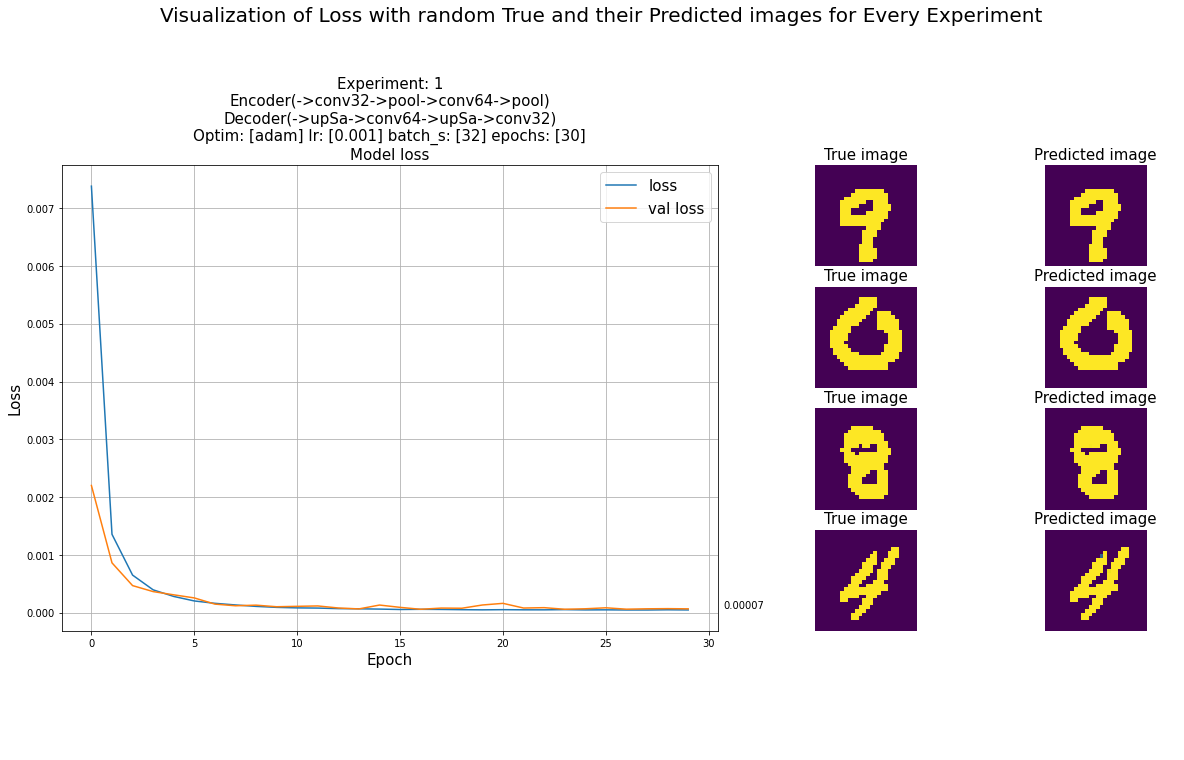

In [ ]:
small_model_histories = []
small_model_info = {"encoder_layers" : [["conv", 32, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 64, (3,3)],
                                        ["pool", (2,2)]]
                    ,
                    "decoder_layers" :  [["upSample", (2,2)],
                                        ["conv", 64, (3,3)],
                                        ["upSample", (2,2)],
                                        ["conv", 32, (3,3)]]
                    ,
                    "optimizer" :       ["adam", 0.001]
                    ,
                    "batch_size":       32
                    ,
                    "epochs" :          30
                    }
# get model
small_model = get_Autoencoder(small_model_info, input_shape)
# train it
small_model_history = train_Autoencoder(small_model, small_model_info, train_X)
# save it
small_model_histories.append(small_model_history)
# plot it
_ = autoencoder_visualization([small_model_history], test_X)

This is a simple auto encoder model with only 32 and 64 filters

Convergence is fast and the error is very small. Therefore no further test is needed

Add the best compination of hyperparametrs for the medium model in the autoencoder experiments list

and save it

In [ ]:
autoencoder_experiment_histories.append(small_model_histories[0])
small_model_histories[0].model.save("small_model.h5")

## Medium Model testing

### Default Medium Model

Epoch 1/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0079 - val_loss: 0.0025
Epoch 2/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 3/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0012 - val_loss: 8.9525e-04
Epoch 4/30
1688/1688 [==============================] - 9s 5ms/step - loss: 7.7987e-04 - val_loss: 9.6436e-04
Epoch 5/30
1688/1688 [==============================] - 9s 5ms/step - loss: 6.1019e-04 - val_loss: 7.5613e-04
Epoch 6/30
1688/1688 [==============================] - 9s 5ms/step - loss: 4.5683e-04 - val_loss: 4.2430e-04
Epoch 7/30
1688/1688 [==============================] - 9s 5ms/step - loss: 4.1928e-04 - val_loss: 3.8817e-04
Epoch 8/30
1688/1688 [==============================] - 9s 5ms/step - loss: 3.8702e-04 - val_loss: 4.4220e-04
Epoch 9/30
1688/1688 [==============================] - 9s 5ms/step - loss: 3.7200e-04 - val_loss: 5.0342e-04
Epoch 10/30
1688/1688 [=======

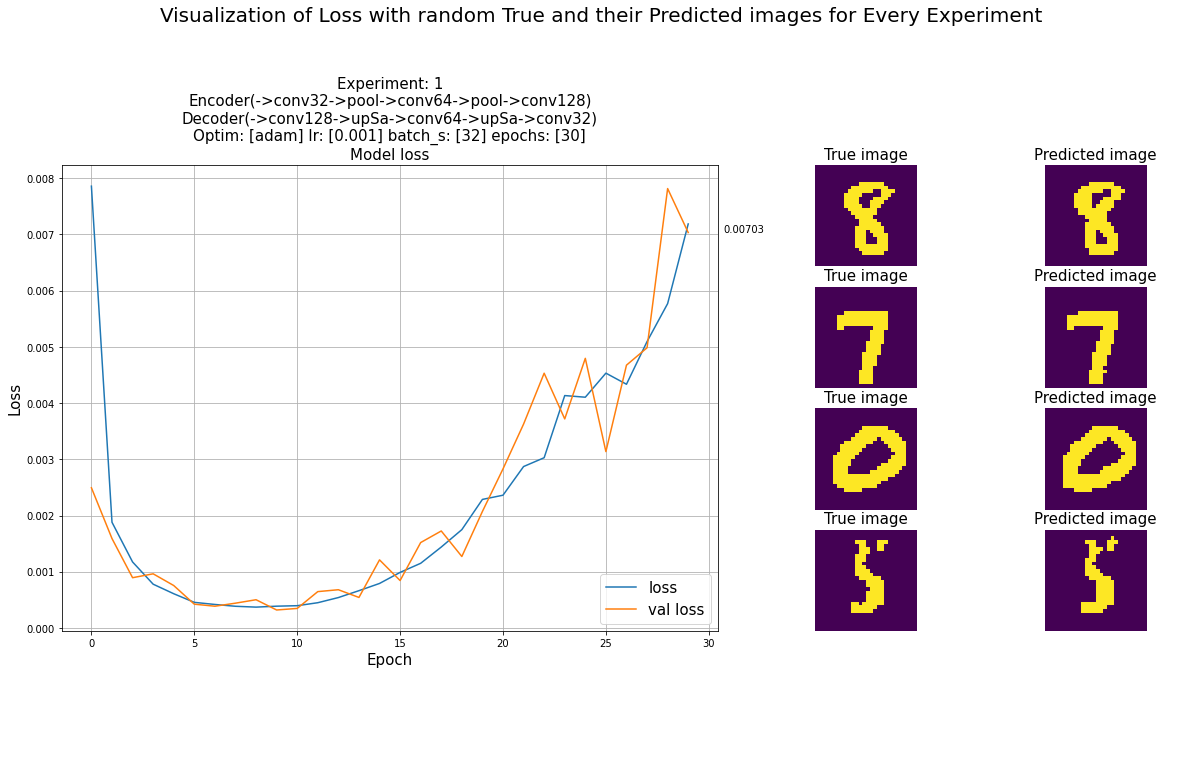

In [ ]:
medium_model_histories = []
medium_model_info = {"encoder_layers" : [["conv", 32, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 64, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 128, (3,3)]]
                    ,
                    "decoder_layers" :  [["conv", 128, (3,3)],
                                        ["upSample", (2,2)],
                                        ["conv", 64, (3,3)],
                                        ["upSample", (2,2)],
                                        ["conv", 32, (3,3)]]
                    ,
                    "optimizer" :       ["adam", 0.001]
                    ,
                    "batch_size":       32
                    ,
                    "epochs" :          30
                    }
# get model
medium_model = get_Autoencoder(medium_model_info, input_shape)
# train it
medium_model_history = train_Autoencoder(medium_model, medium_model_info, train_X)
# save it
medium_model_histories.append(medium_model_history)
# plot it
_ = autoencoder_visualization([medium_model_history], test_X)

### Medium Model with smaller learning rate

Epoch 1/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0177 - val_loss: 0.0069
Epoch 2/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0054 - val_loss: 0.0045
Epoch 3/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 4/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 5/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 6/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 7/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 8/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 9/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 10/30
1688/1688 [==============================] - 9s 5ms/step - loss: 8.596

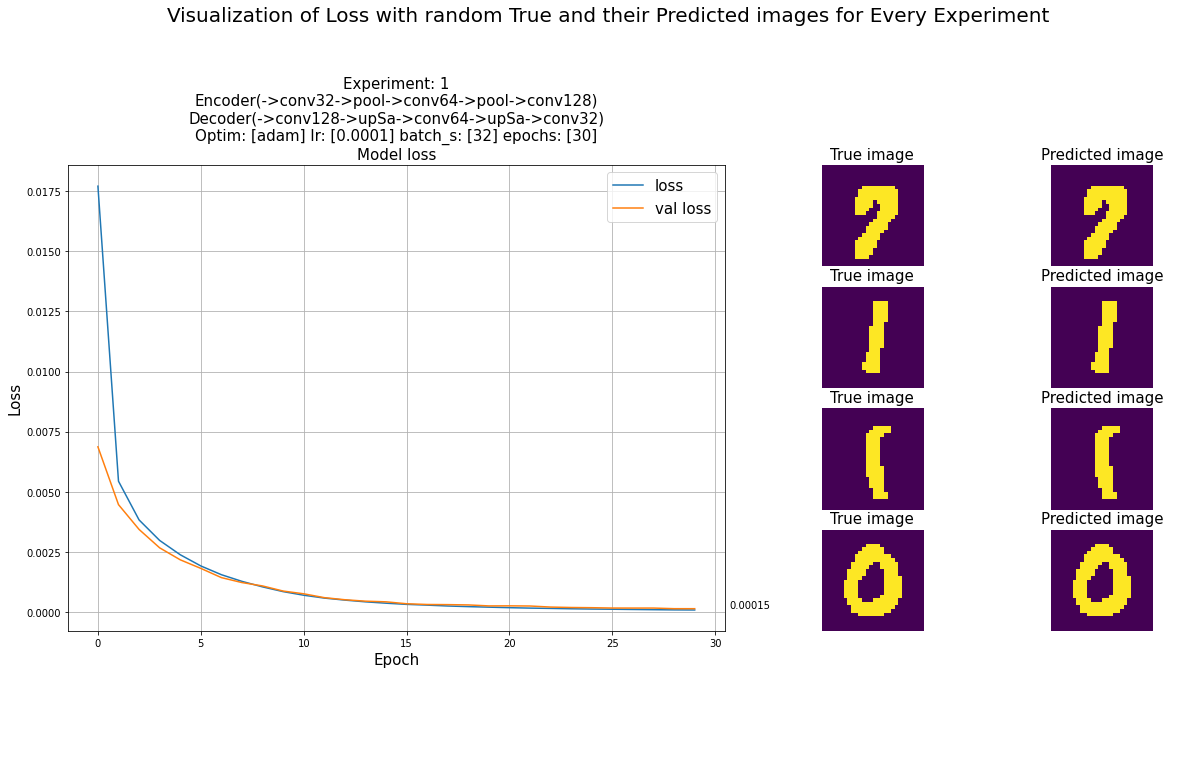

In [ ]:
medium_model_info = {"encoder_layers" : [["conv", 32, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 64, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 128, (3,3)]]
                    ,
                    "decoder_layers" :  [["conv", 128, (3,3)],
                                        ["upSample", (2,2)],
                                        ["conv", 64, (3,3)],
                                        ["upSample", (2,2)],
                                        ["conv", 32, (3,3)]]
                    ,
                    "optimizer" :       ["adam", 0.0001]
                    ,
                    "batch_size":       32
                    ,
                    "epochs" :          30
                    }
# get model
medium_model = get_Autoencoder(medium_model_info, input_shape)
# train it
medium_model_history = train_Autoencoder(medium_model, medium_model_info, train_X)
# save it
medium_model_histories.append(medium_model_history)
# plot it
_ = autoencoder_visualization([medium_model_history], test_X)

### Training for more epochs

Epoch 1/60
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0181 - val_loss: 0.0080
Epoch 2/60
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0057 - val_loss: 0.0047
Epoch 3/60
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 4/60
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 5/60
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 6/60
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 7/60
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 8/60
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 9/60
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 10/60
1688/1688 [==============================] - 9s 5ms/step - loss: 9.618

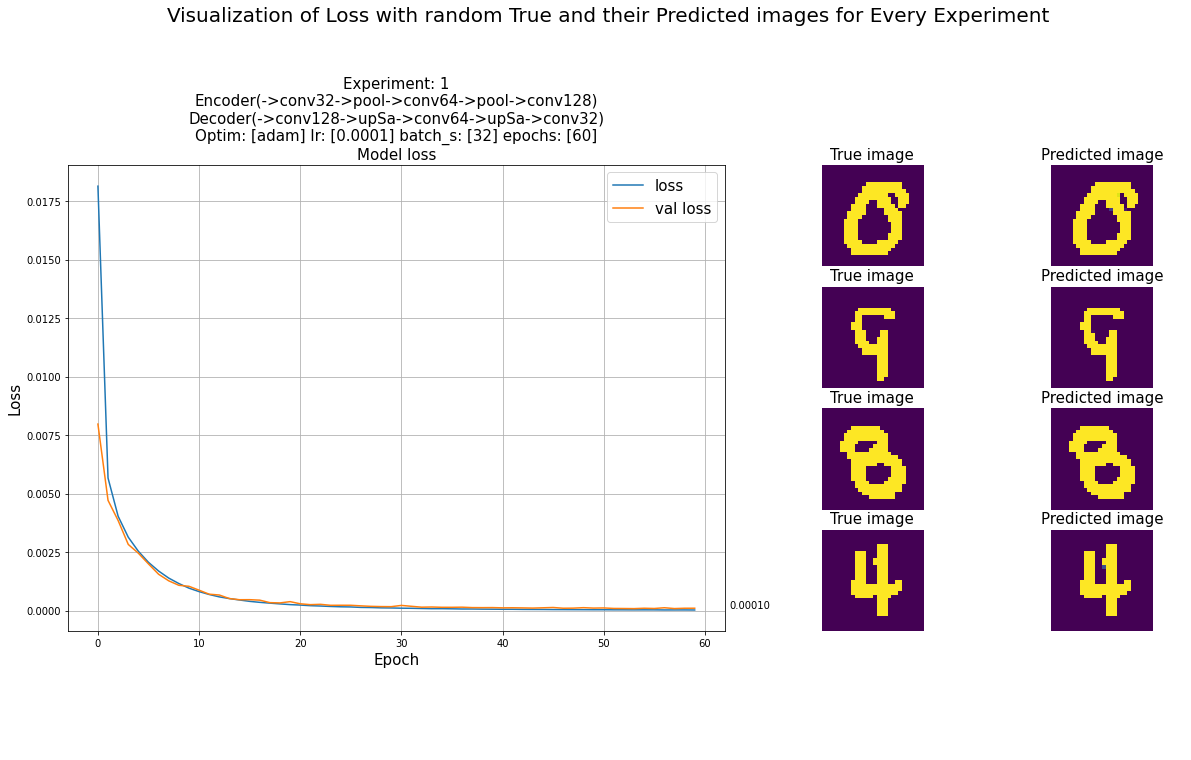

In [ ]:
medium_model_info = {"encoder_layers" : [["conv", 32, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 64, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 128, (3,3)]]
                    ,
                    "decoder_layers" :  [["conv", 128, (3,3)],
                                        ["upSample", (2,2)],
                                        ["conv", 64, (3,3)],
                                        ["upSample", (2,2)],
                                        ["conv", 32, (3,3)]]
                    ,
                    "optimizer" :       ["adam", 0.0001]
                    ,
                    "batch_size":       32
                    ,
                    "epochs" :          60
                    }
# get model
medium_model = get_Autoencoder(medium_model_info, input_shape)
# train it
medium_model_history = train_Autoencoder(medium_model, medium_model_info, train_X)
# save it
medium_model_histories.append(medium_model_history)
# plot it
_ = autoencoder_visualization([medium_model_history], test_X)

### Medium Models experiments overview




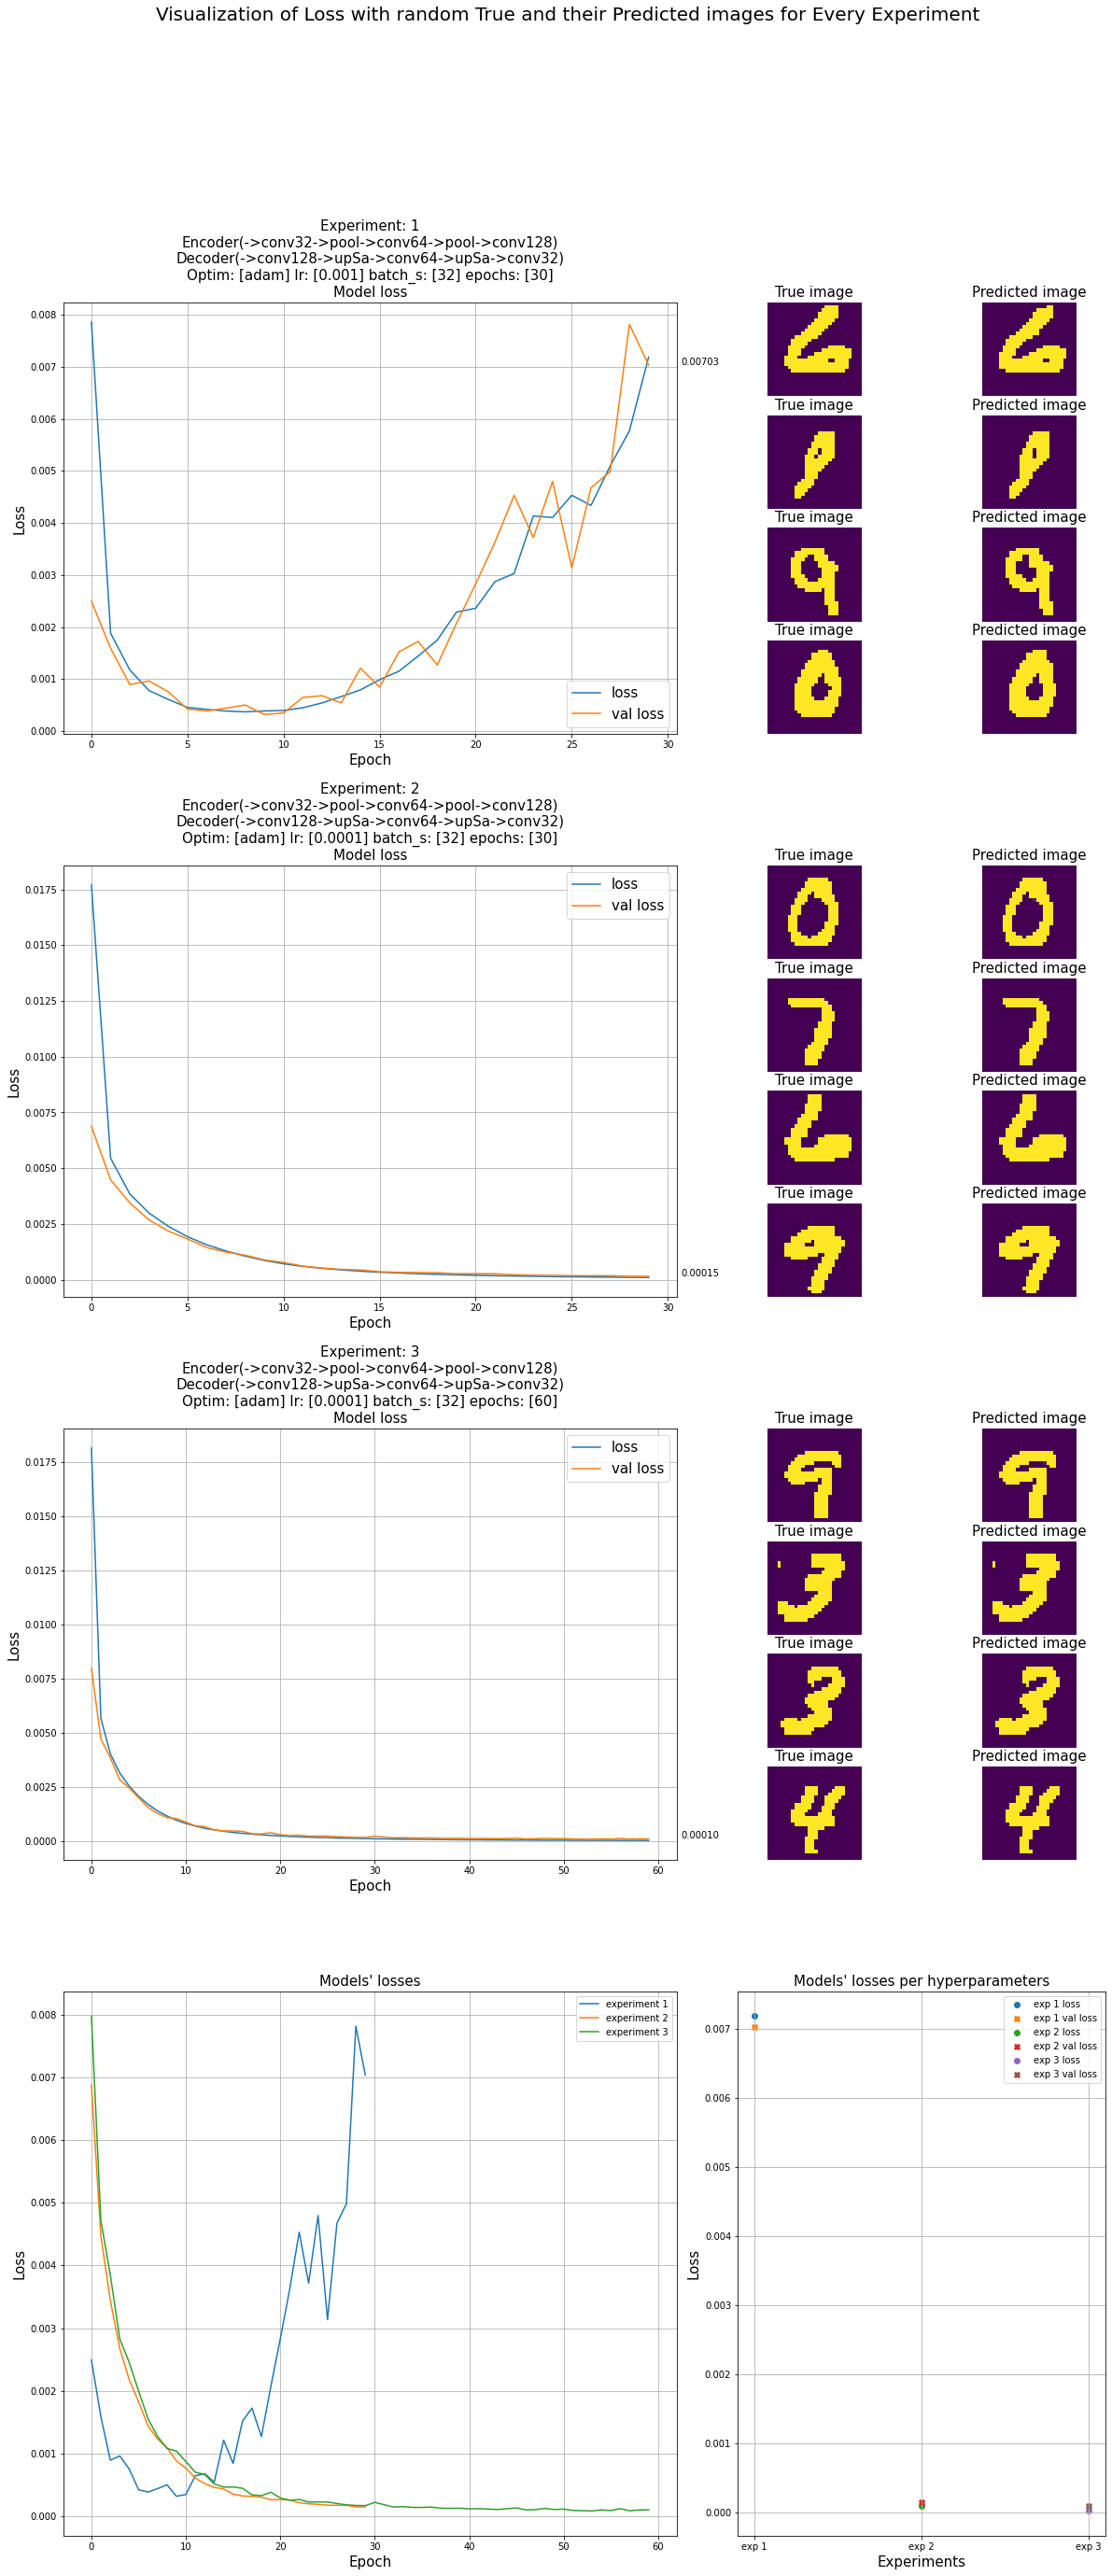

In [ ]:
_ = autoencoder_visualization(medium_model_histories, test_X)

This model at first did not converge so it was necessary to reduce learning rate
After the reduction, the model converged normally and most of the epochs did not help

However, we will choose this with the smallest error

Add the best compination of hyperparametrs for the medium model in the autoencoder experiments list

and save it


In [ ]:
autoencoder_experiment_histories.append(medium_model_histories[2])
medium_model_histories[2].model.save("medium_model.h5")

## Large Model testing

### Default Large Model

Epoch 1/30
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0081 - val_loss: 0.0029
Epoch 2/30
1688/1688 [==============================] - 13s 7ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 3/30
1688/1688 [==============================] - 13s 7ms/step - loss: 0.0015 - val_loss: 0.0080
Epoch 4/30
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 5/30
1688/1688 [==============================] - 13s 7ms/step - loss: 0.0011 - val_loss: 9.6227e-04
Epoch 6/30
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0010 - val_loss: 8.5128e-04
Epoch 7/30
1688/1688 [==============================] - 12s 7ms/step - loss: 9.6265e-04 - val_loss: 8.5745e-04
Epoch 8/30
1688/1688 [==============================] - 12s 7ms/step - loss: 9.1466e-04 - val_loss: 0.0011
Epoch 9/30
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 10/30
1688/1688 [==============================

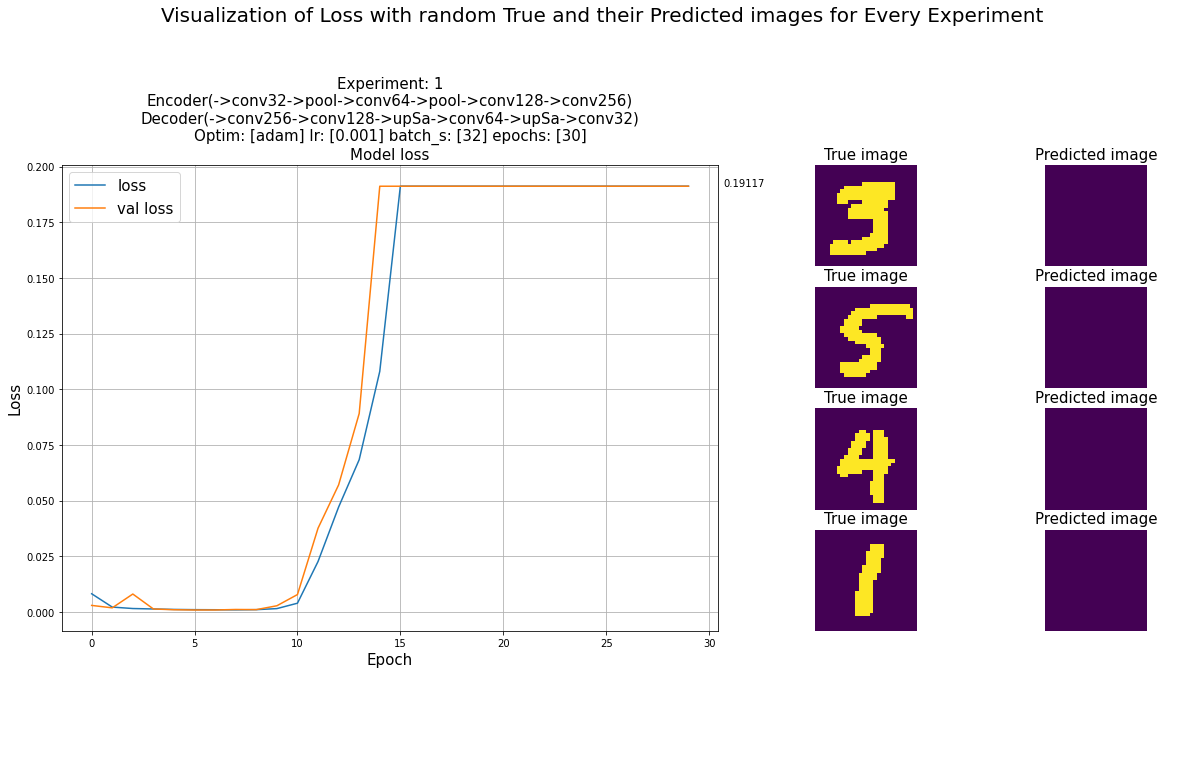

In [ ]:
large_model_histories = []
large_model_info = {"encoder_layers" : [["conv", 32, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 64, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 128, (3,3)],
                                        ["conv", 256, (3,3)]]
                    ,
                    "decoder_layers" :  [["conv", 256, (3,3)],
                                         ["conv", 128, (3,3)],
                                         ["upSample", (2,2)],
                                         ["conv", 64, (3,3)],
                                         ["upSample", (2,2)],
                                         ["conv", 32, (3,3)]]
                    ,
                    "optimizer" :       ["adam", 0.001]
                    ,
                    "batch_size":       32
                    ,
                    "epochs" :          30
                    }
# get model
large_model = get_Autoencoder(large_model_info, input_shape)
# train it
large_model_history = train_Autoencoder(large_model, large_model_info, train_X)
# save it
large_model_histories.append(large_model_history)
# plot it
_ = autoencoder_visualization([large_model_history], test_X)

### Large Model with smaller learning rate

Epoch 1/30
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0176 - val_loss: 0.0068
Epoch 2/30
1688/1688 [==============================] - 13s 7ms/step - loss: 0.0053 - val_loss: 0.0042
Epoch 3/30
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 4/30
1688/1688 [==============================] - 13s 7ms/step - loss: 0.0028 - val_loss: 0.0024
Epoch 5/30
1688/1688 [==============================] - 13s 7ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 6/30
1688/1688 [==============================] - 13s 7ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 7/30
1688/1688 [==============================] - 13s 7ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 8/30
1688/1688 [==============================] - 13s 7ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 9/30
1688/1688 [==============================] - 13s 7ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 10/30
1688/1688 [==============================] - 12s 7ms/step - l

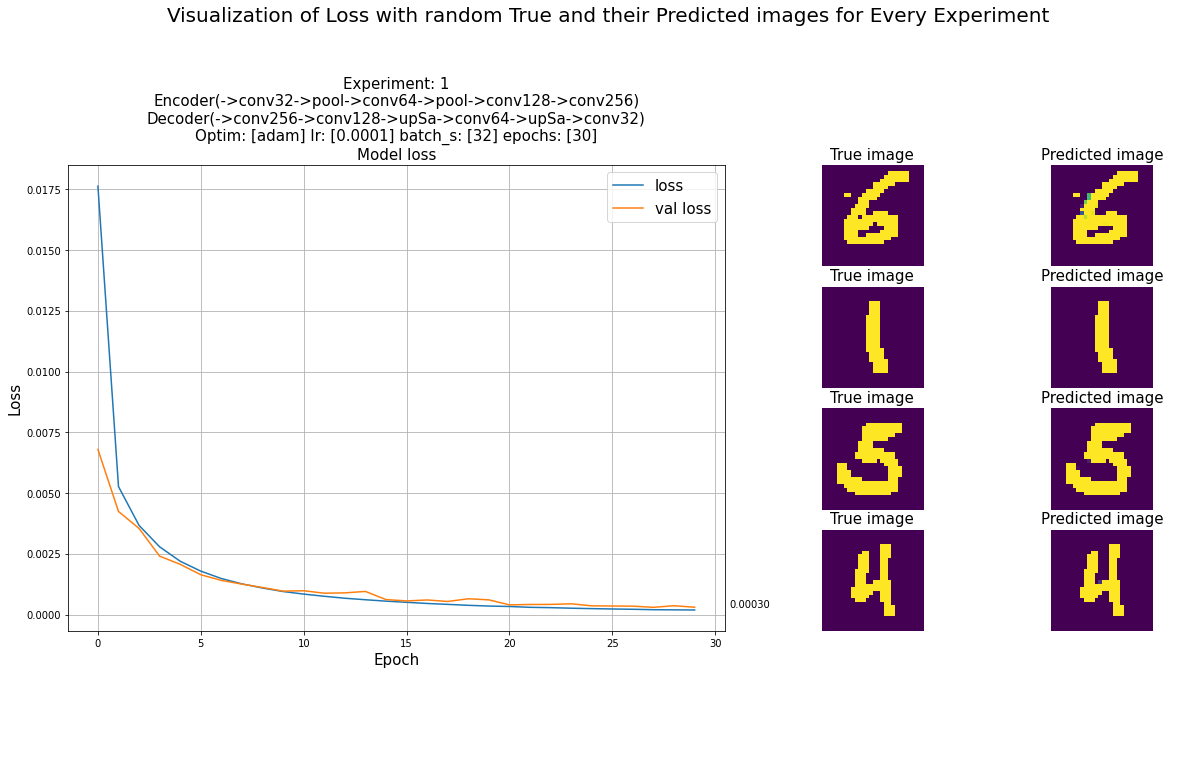

In [ ]:
large_model_info = {"encoder_layers" : [["conv", 32, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 64, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 128, (3,3)],
                                        ["conv", 256, (3,3)]]
                    ,
                    "decoder_layers" :  [["conv", 256, (3,3)],
                                         ["conv", 128, (3,3)],
                                         ["upSample", (2,2)],
                                         ["conv", 64, (3,3)],
                                         ["upSample", (2,2)],
                                         ["conv", 32, (3,3)]]
                    ,
                    "optimizer" :       ["adam", 0.0001]
                    ,
                    "batch_size":       32
                    ,
                    "epochs" :          30
                    }
# get model
large_model = get_Autoencoder(large_model_info, input_shape)
# train it
large_model_history = train_Autoencoder(large_model, large_model_info, train_X)
# save it
large_model_histories.append(large_model_history)
# plot it
_ = autoencoder_visualization([large_model_history], test_X)

### Large Model with more epochs

Epoch 1/60
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0162 - val_loss: 0.0066
Epoch 2/60
1688/1688 [==============================] - 13s 7ms/step - loss: 0.0048 - val_loss: 0.0039
Epoch 3/60
1688/1688 [==============================] - 13s 7ms/step - loss: 0.0034 - val_loss: 0.0029
Epoch 4/60
1688/1688 [==============================] - 13s 7ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 5/60
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 6/60
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 7/60
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 8/60
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 9/60
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 10/60
1688/1688 [==============================] - 12s 7ms/step - l

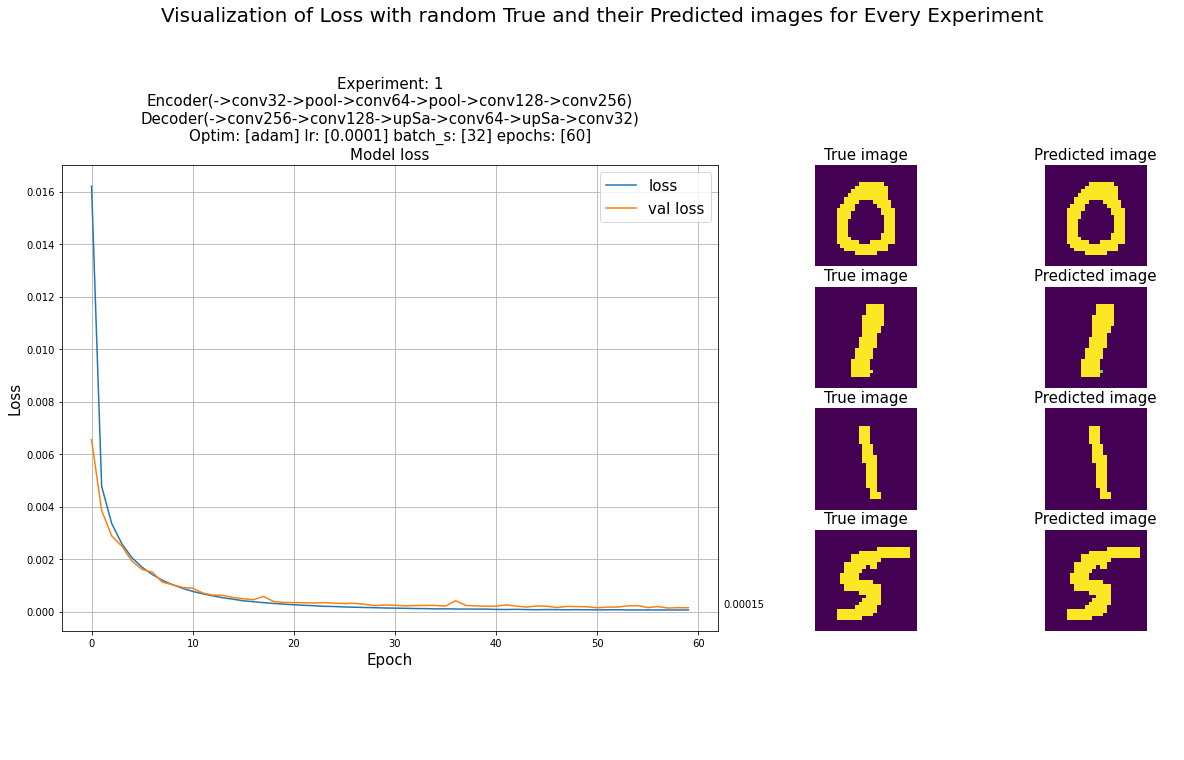

In [ ]:
large_model_info = {"encoder_layers" : [["conv", 32, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 64, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 128, (3,3)],
                                        ["conv", 256, (3,3)]]
                    ,
                    "decoder_layers" :  [["conv", 256, (3,3)],
                                         ["conv", 128, (3,3)],
                                         ["upSample", (2,2)],
                                         ["conv", 64, (3,3)],
                                         ["upSample", (2,2)],
                                         ["conv", 32, (3,3)]]
                    ,
                    "optimizer" :       ["adam", 0.0001]
                    ,
                    "batch_size":       32
                    ,
                    "epochs" :          60
                    }
# get model
large_model = get_Autoencoder(large_model_info, input_shape)
# train it
large_model_history = train_Autoencoder(large_model, large_model_info, train_X)
# save it
large_model_histories.append(large_model_history)
# plot it
_ = autoencoder_visualization([large_model_history], test_X)

### Addign Batch Normalization

Epoch 1/30
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0082 - val_loss: 0.0048
Epoch 2/30
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0026 - val_loss: 0.0018
Epoch 3/30
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 4/30
1688/1688 [==============================] - 13s 8ms/step - loss: 7.6269e-04 - val_loss: 7.1652e-04
Epoch 5/30
1688/1688 [==============================] - 13s 8ms/step - loss: 5.0482e-04 - val_loss: 8.3739e-04
Epoch 6/30
1688/1688 [==============================] - 13s 8ms/step - loss: 3.6033e-04 - val_loss: 4.6292e-04
Epoch 7/30
1688/1688 [==============================] - 13s 8ms/step - loss: 2.7186e-04 - val_loss: 4.5217e-04
Epoch 8/30
1688/1688 [==============================] - 13s 8ms/step - loss: 2.1400e-04 - val_loss: 3.2086e-04
Epoch 9/30
1688/1688 [==============================] - 13s 8ms/step - loss: 1.7355e-04 - val_loss: 2.5679e-04
Epoch 10/30
1688/1688 [==

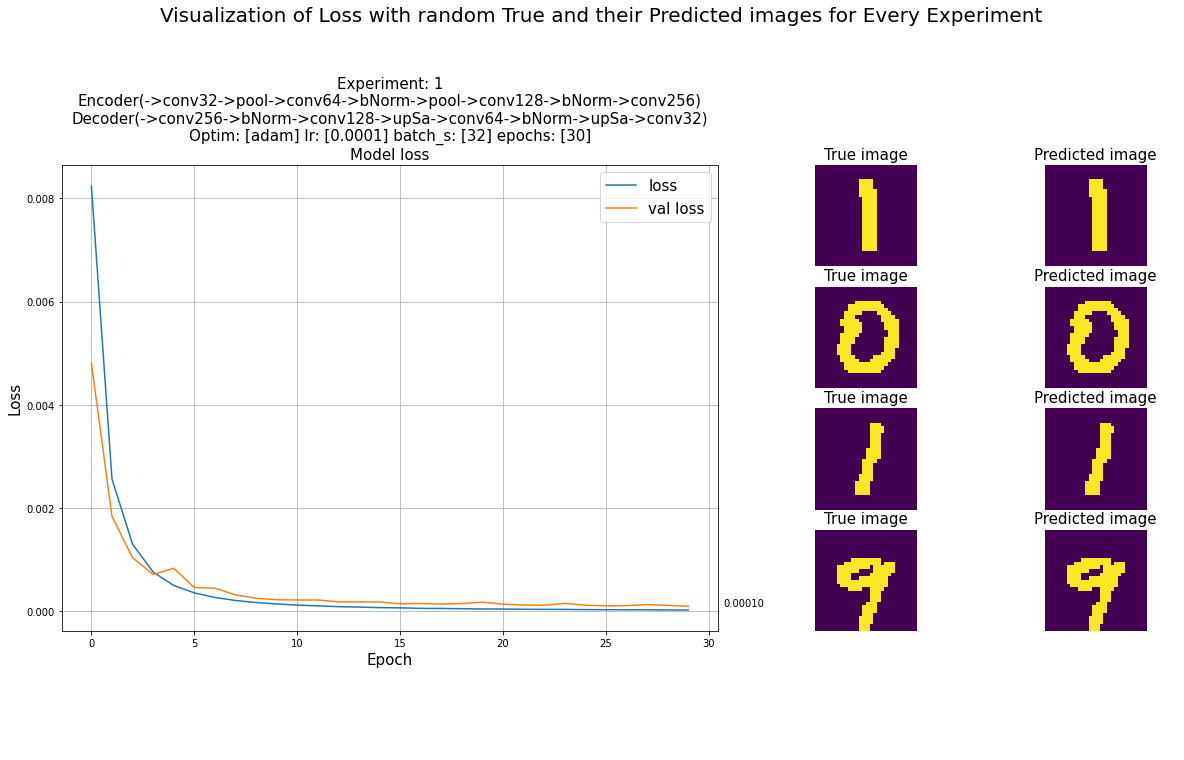

In [ ]:
large_model_info = {"encoder_layers" : [["conv", 32, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 64, (3,3)],
                                        ["batchNorm"],
                                        ["pool", (2,2)],
                                        ["conv", 128, (3,3)],
                                        ["batchNorm"],
                                        ["conv", 256, (3,3)]]
                    ,
                    "decoder_layers" :  [["conv", 256, (3,3)],
                                         ["batchNorm"],
                                         ["conv", 128, (3,3)],
                                         ["upSample", (2,2)],
                                         ["conv", 64, (3,3)],
                                         ["batchNorm"],
                                         ["upSample", (2,2)],
                                         ["conv", 32, (3,3)]]
                    ,
                    "optimizer" :       ["adam", 0.0001]
                    ,
                    "batch_size":       32
                    ,
                    "epochs" :          30
                    }
# get model
large_model = get_Autoencoder(large_model_info, input_shape)
# train it
large_model_history = train_Autoencoder(large_model, large_model_info, train_X)
# save it
large_model_histories.append(large_model_history)
# plot it
_ = autoencoder_visualization([large_model_history], test_X)

### Batch Normalization with more epochs

Epoch 1/60
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0086 - val_loss: 0.0037
Epoch 2/60
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 3/60
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 4/60
1688/1688 [==============================] - 13s 8ms/step - loss: 7.9723e-04 - val_loss: 9.3598e-04
Epoch 5/60
1688/1688 [==============================] - 13s 8ms/step - loss: 5.3933e-04 - val_loss: 6.0662e-04
Epoch 6/60
1688/1688 [==============================] - 13s 8ms/step - loss: 3.9045e-04 - val_loss: 4.4054e-04
Epoch 7/60
1688/1688 [==============================] - 13s 8ms/step - loss: 2.9467e-04 - val_loss: 4.9989e-04
Epoch 8/60
1688/1688 [==============================] - 13s 8ms/step - loss: 2.3118e-04 - val_loss: 4.3767e-04
Epoch 9/60
1688/1688 [==============================] - 13s 8ms/step - loss: 1.9112e-04 - val_loss: 2.9118e-04
Epoch 10/60
1688/1688 [==

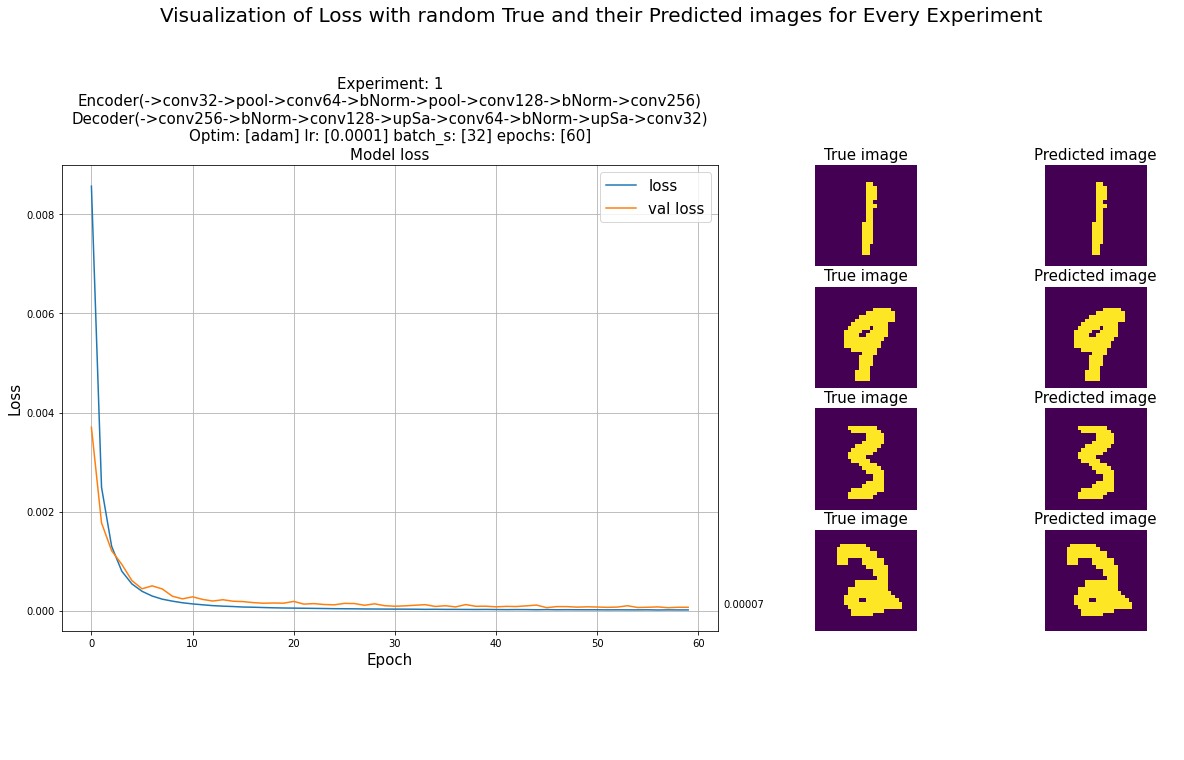

In [ ]:
large_model_info = {"encoder_layers" : [["conv", 32, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 64, (3,3)],
                                        ["batchNorm"],
                                        ["pool", (2,2)],
                                        ["conv", 128, (3,3)],
                                        ["batchNorm"],
                                        ["conv", 256, (3,3)]]
                    ,
                    "decoder_layers" :  [["conv", 256, (3,3)],
                                         ["batchNorm"],
                                         ["conv", 128, (3,3)],
                                         ["upSample", (2,2)],
                                         ["conv", 64, (3,3)],
                                         ["batchNorm"],
                                         ["upSample", (2,2)],
                                         ["conv", 32, (3,3)]]
                    ,
                    "optimizer" :       ["adam", 0.0001]
                    ,
                    "batch_size":       32
                    ,
                    "epochs" :          60
                    }
# get model
large_model = get_Autoencoder(large_model_info, input_shape)
# train it
large_model_history = train_Autoencoder(large_model, large_model_info, train_X)
# save it
large_model_histories.append(large_model_history)
# plot it
_ = autoencoder_visualization([large_model_history], test_X)

### Large Models experiments overview

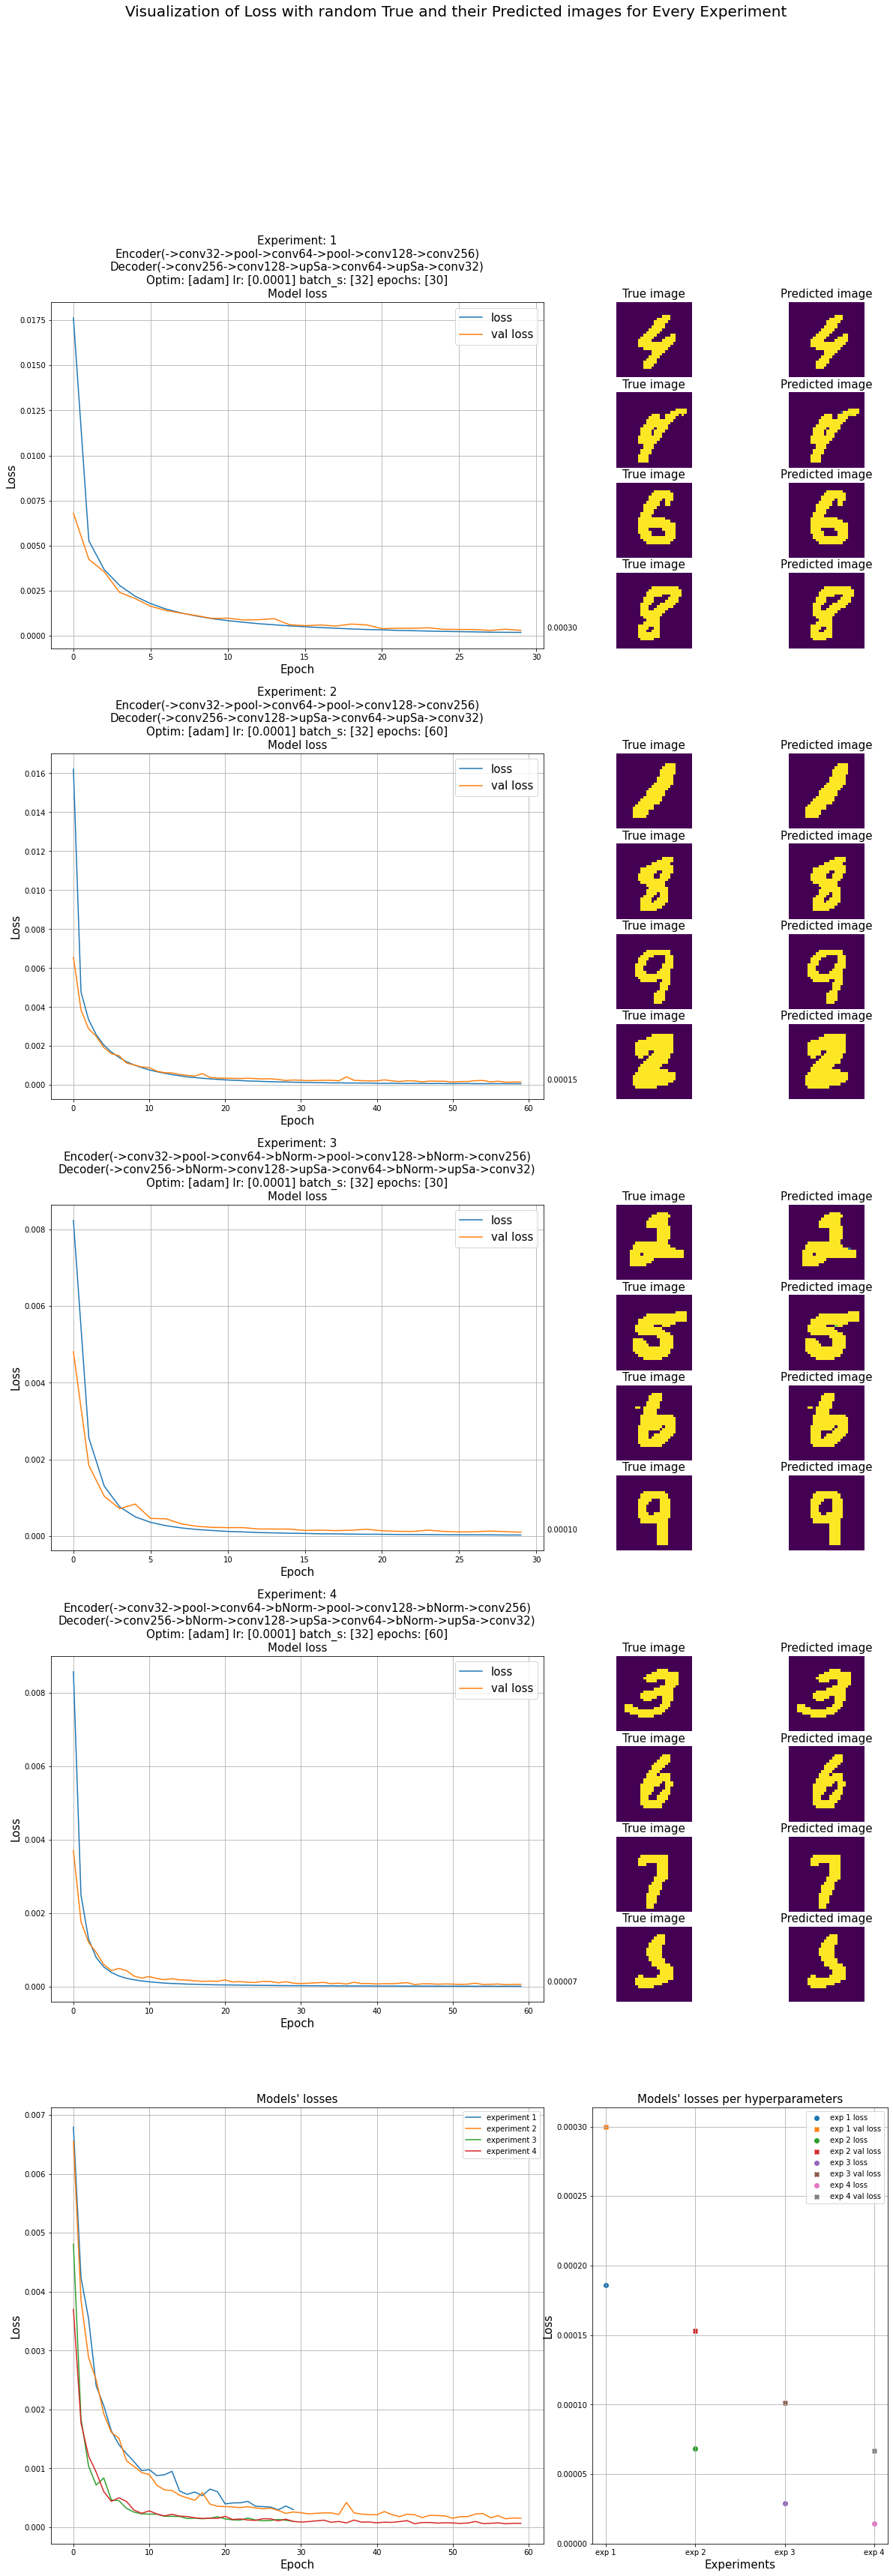

In [ ]:
_ = autoencoder_visualization(large_model_histories[1:], test_X)

The larger model was the most difficult to train as its many layers required many operations.

Like the medium model in the beginning wanted a reduction of the learning rate

However, in order to make the convergence process faster, batch normalization was used, which significantly accelerated the training and reduced the error. Therefore this model will be chosen as the best large

Add the best compination of hyperparametrs for the large model in the autoencoder experiments list

and save it

In [ ]:
autoencoder_experiment_histories.append(large_model_histories[-1])
large_model_histories[-1].model.save("large_model.h5")

## Autoencoder Models Overview

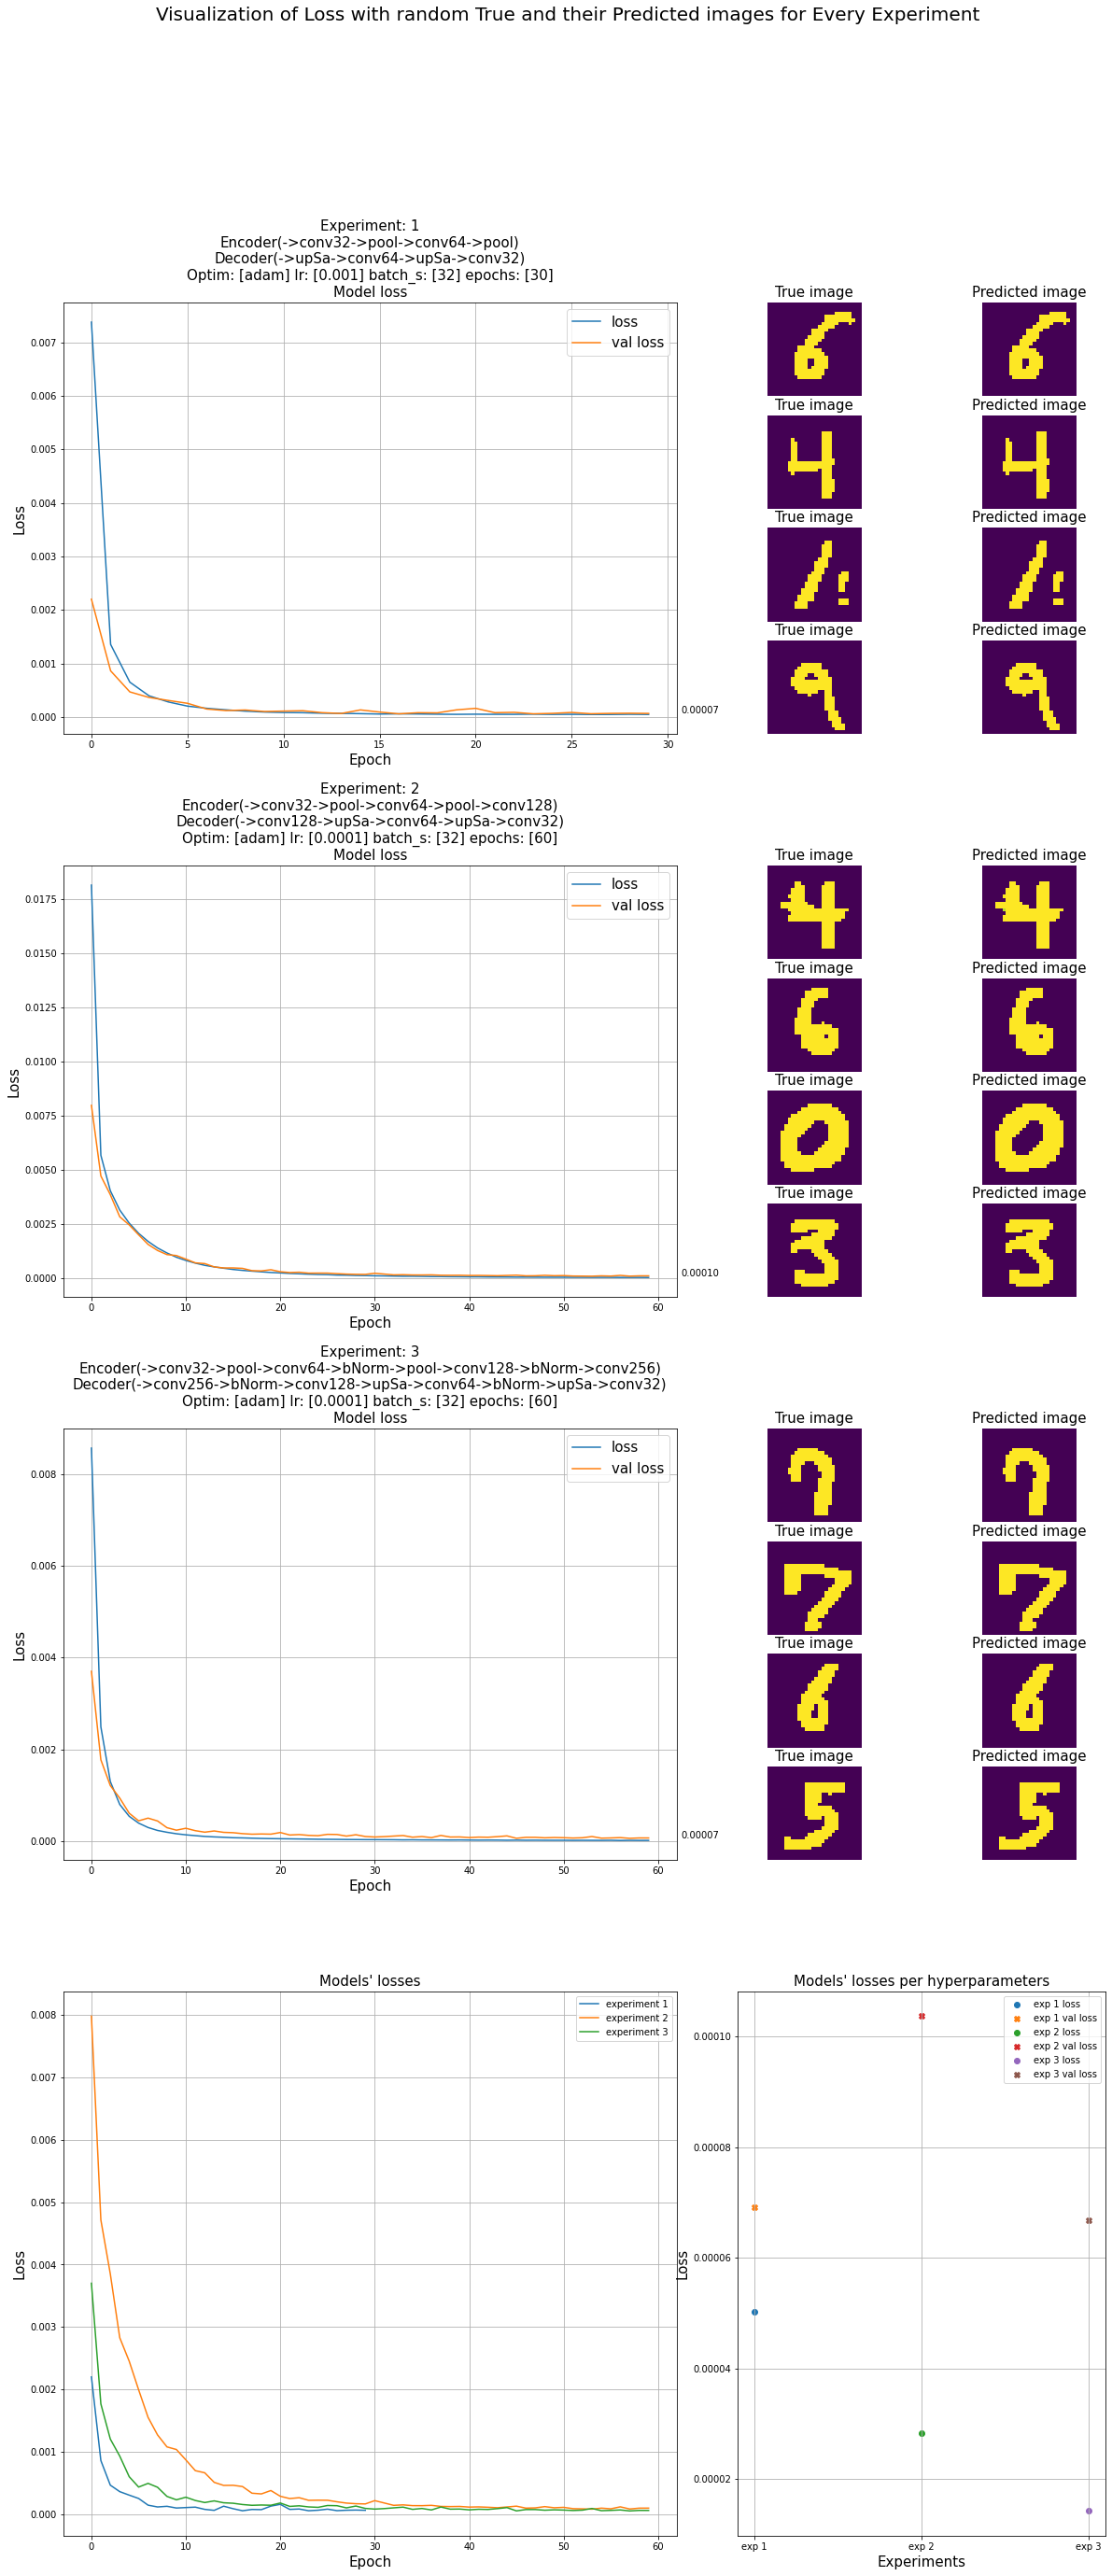

In [ ]:
_ = autoencoder_visualization(autoencoder_experiment_histories, test_X)

# Classifier testing

To search for the best classifier we will use the best autoencoder models from above as large and small and will be tested with different dense models

In [4]:
classifier_experiment_histories = []

## Small Encoder + Extra Small Dense

### Default Extra Small Dense

Train only dense layer
Epoch 1/30
3750/3750 [==============================] - 15s 4ms/step - loss: 0.2880 - accuracy: 0.9087 - Precision: 0.9497 - Recall: 0.8866 - val_loss: 0.1015 - val_accuracy: 0.9710 - val_Precision: 0.9758 - val_Recall: 0.9683
Epoch 2/30
3750/3750 [==============================] - 15s 4ms/step - loss: 0.0904 - accuracy: 0.9732 - Precision: 0.9772 - Recall: 0.9708 - val_loss: 0.1091 - val_accuracy: 0.9692 - val_Precision: 0.9733 - val_Recall: 0.9681
Epoch 3/30
3750/3750 [==============================] - 15s 4ms/step - loss: 0.0649 - accuracy: 0.9800 - Precision: 0.9826 - Recall: 0.9782 - val_loss: 0.0815 - val_accuracy: 0.9766 - val_Precision: 0.9794 - val_Recall: 0.9746
Epoch 4/30
3750/3750 [==============================] - 15s 4ms/step - loss: 0.0483 - accuracy: 0.9847 - Precision: 0.9867 - Recall: 0.9836 - val_loss: 0.0753 - val_accuracy: 0.9786 - val_Precision: 0.9804 - val_Recall: 0.9779
Epoch 5/30
3750/3750 [==============================] - 15s 4ms/step 

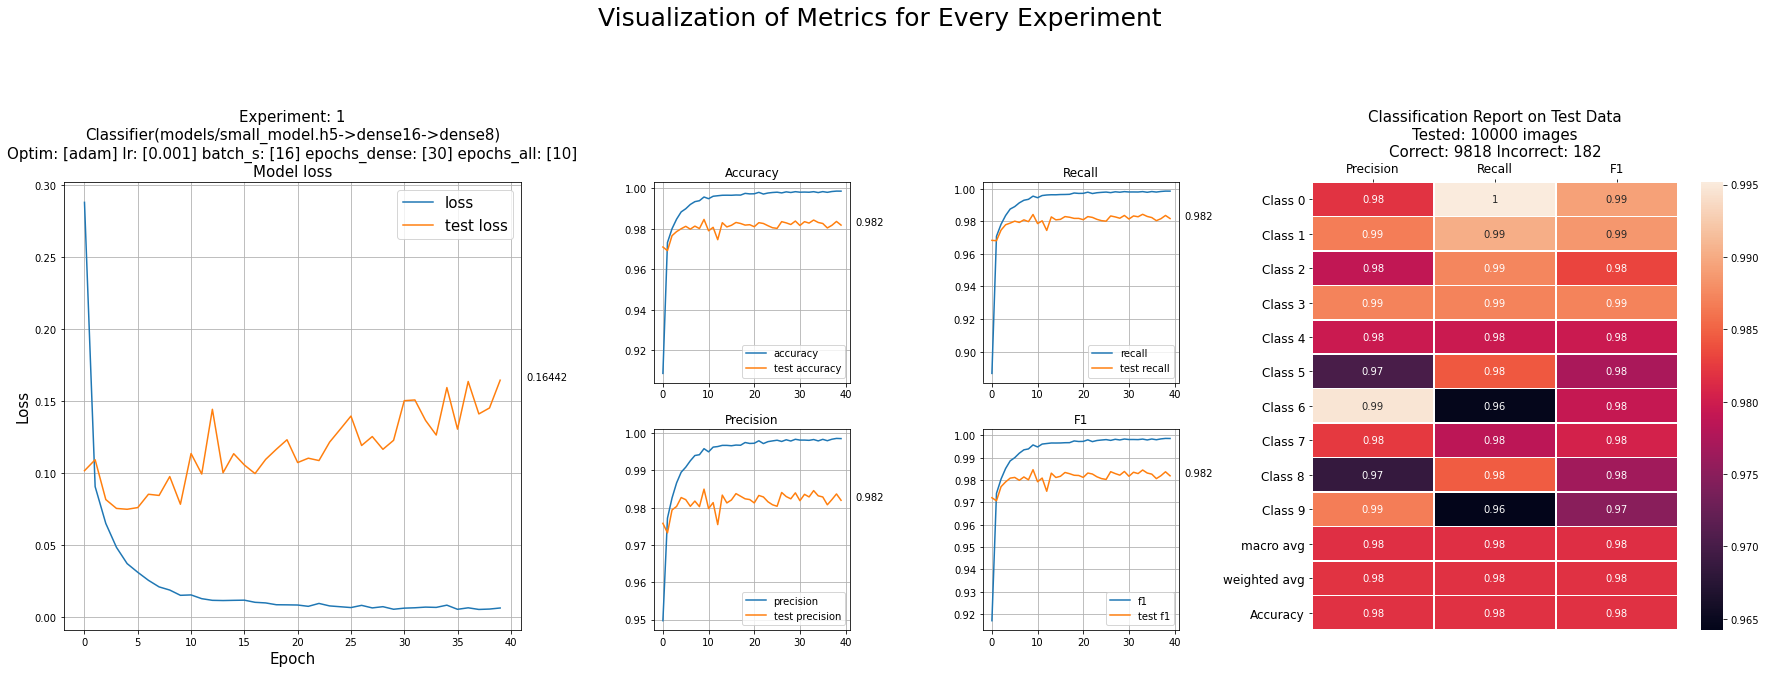

In [ ]:
extra_small_model_classifier_histories = []
extra_small_model_classifier_info = {"dense_layers" : [["dense", 16],["dense", 8]]
                                ,
                                "encoder_layers" : "models/small_model.h5"
                                ,
                                "optimizer" :   ["adam", 0.001]
                                ,
                                "dense_only_train_epochs": 30
                                ,
                                "full_train_epochs": 10
                                ,
                                  "batch_size": 16
                                }

# get model
extra_small_model_classifier = get_Classifier(extra_small_model_classifier_info, train_X, num_of_classes)
# train it
extra_small_model_classifier_history = train_Classifier(extra_small_model_classifier, extra_small_model_classifier_info, train_X, train_Y, test_X, test_Y)
# save it
extra_small_model_classifier_histories.append(extra_small_model_classifier_history)
# plot it
_ = classifier_loss_visualization([extra_small_model_classifier_history])

### Adding Dropout to Dense

Train only dense layer
Epoch 1/25
1875/1875 [==============================] - 14s 8ms/step - loss: 0.7773 - accuracy: 0.7320 - Precision: 0.8712 - Recall: 0.6388 - val_loss: 0.2147 - val_accuracy: 0.9498 - val_Precision: 0.9719 - val_Recall: 0.9325
Epoch 2/25
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4359 - accuracy: 0.8536 - Precision: 0.9102 - Recall: 0.8089 - val_loss: 0.1516 - val_accuracy: 0.9656 - val_Precision: 0.9771 - val_Recall: 0.9525
Epoch 3/25
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3305 - accuracy: 0.8977 - Precision: 0.9221 - Recall: 0.8753 - val_loss: 0.1191 - val_accuracy: 0.9708 - val_Precision: 0.9783 - val_Recall: 0.9631
Epoch 4/25
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2866 - accuracy: 0.9127 - Precision: 0.9318 - Recall: 0.8981 - val_loss: 0.1042 - val_accuracy: 0.9723 - val_Precision: 0.9803 - val_Recall: 0.9659
Epoch 5/25
1875/1875 [==============================] - 14s 7ms/step 

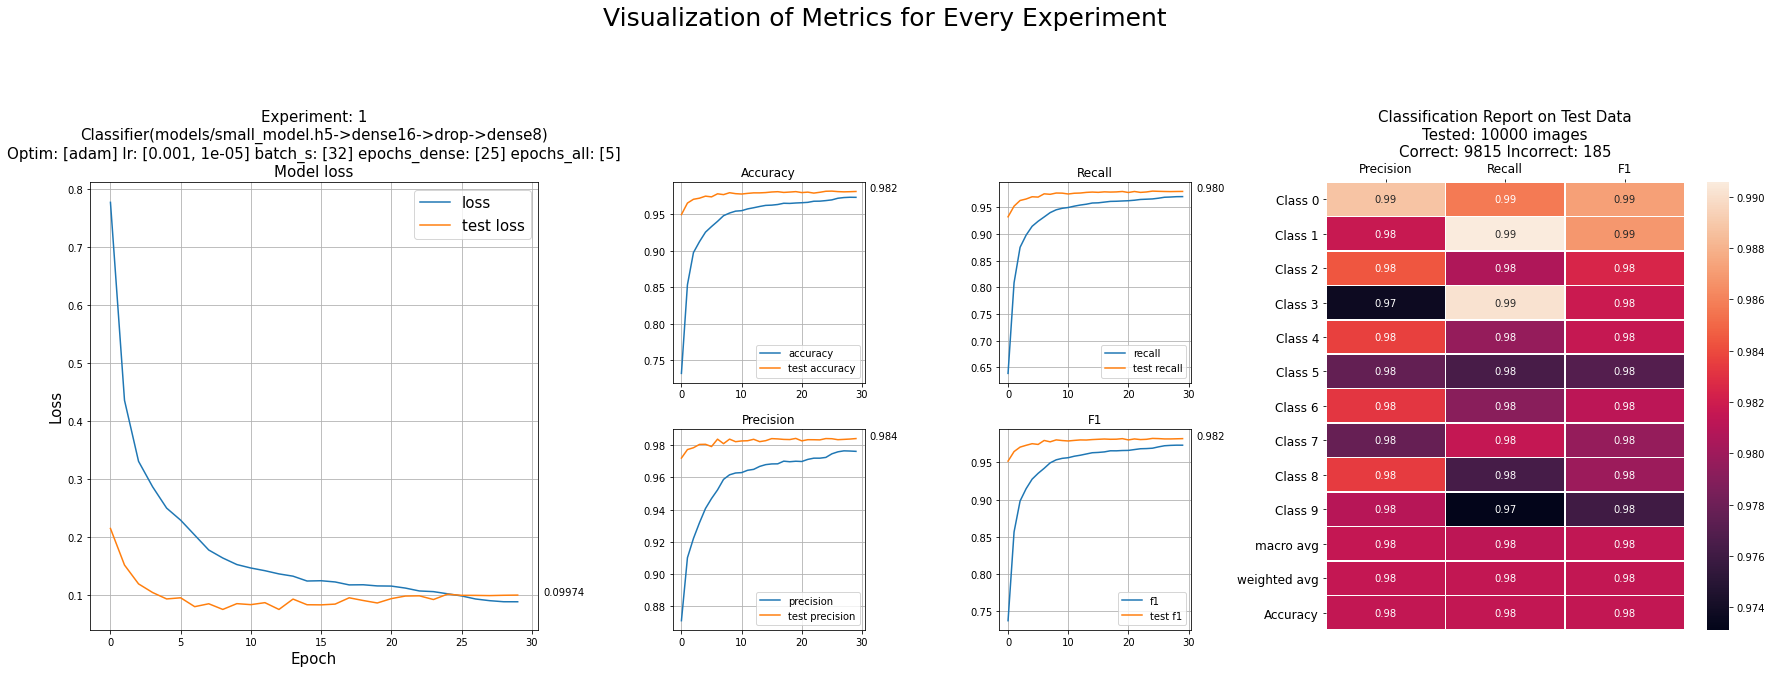

In [8]:
extra_small_model_classifier_info = {"dense_layers" : [["dense", 16],
                                                 ["drop", 0.2],
                                                ["dense", 8]]
                                ,
                                "encoder_layers" : "models/small_model.h5"
                                ,
                                "optimizer" :   ["adam", 0.001, 1e-5]
                                ,
                                "dense_only_train_epochs": 30
                                ,
                                "full_train_epochs": 10
                                ,
                                "batch_size": 32
                                }


# get model
extra_small_model_classifier = get_Classifier(extra_small_model_classifier_info, train_X, num_of_classes)
# train it
extra_small_model_classifier_history = train_Classifier(extra_small_model_classifier, extra_small_model_classifier_info, train_X, train_Y, test_X, test_Y)
# save it
extra_small_model_classifier_histories.append(extra_small_model_classifier_history)
# plot it
_ = classifier_loss_visualization([extra_small_model_classifier_history])

### Small Encoder + Extra Small Dense overview

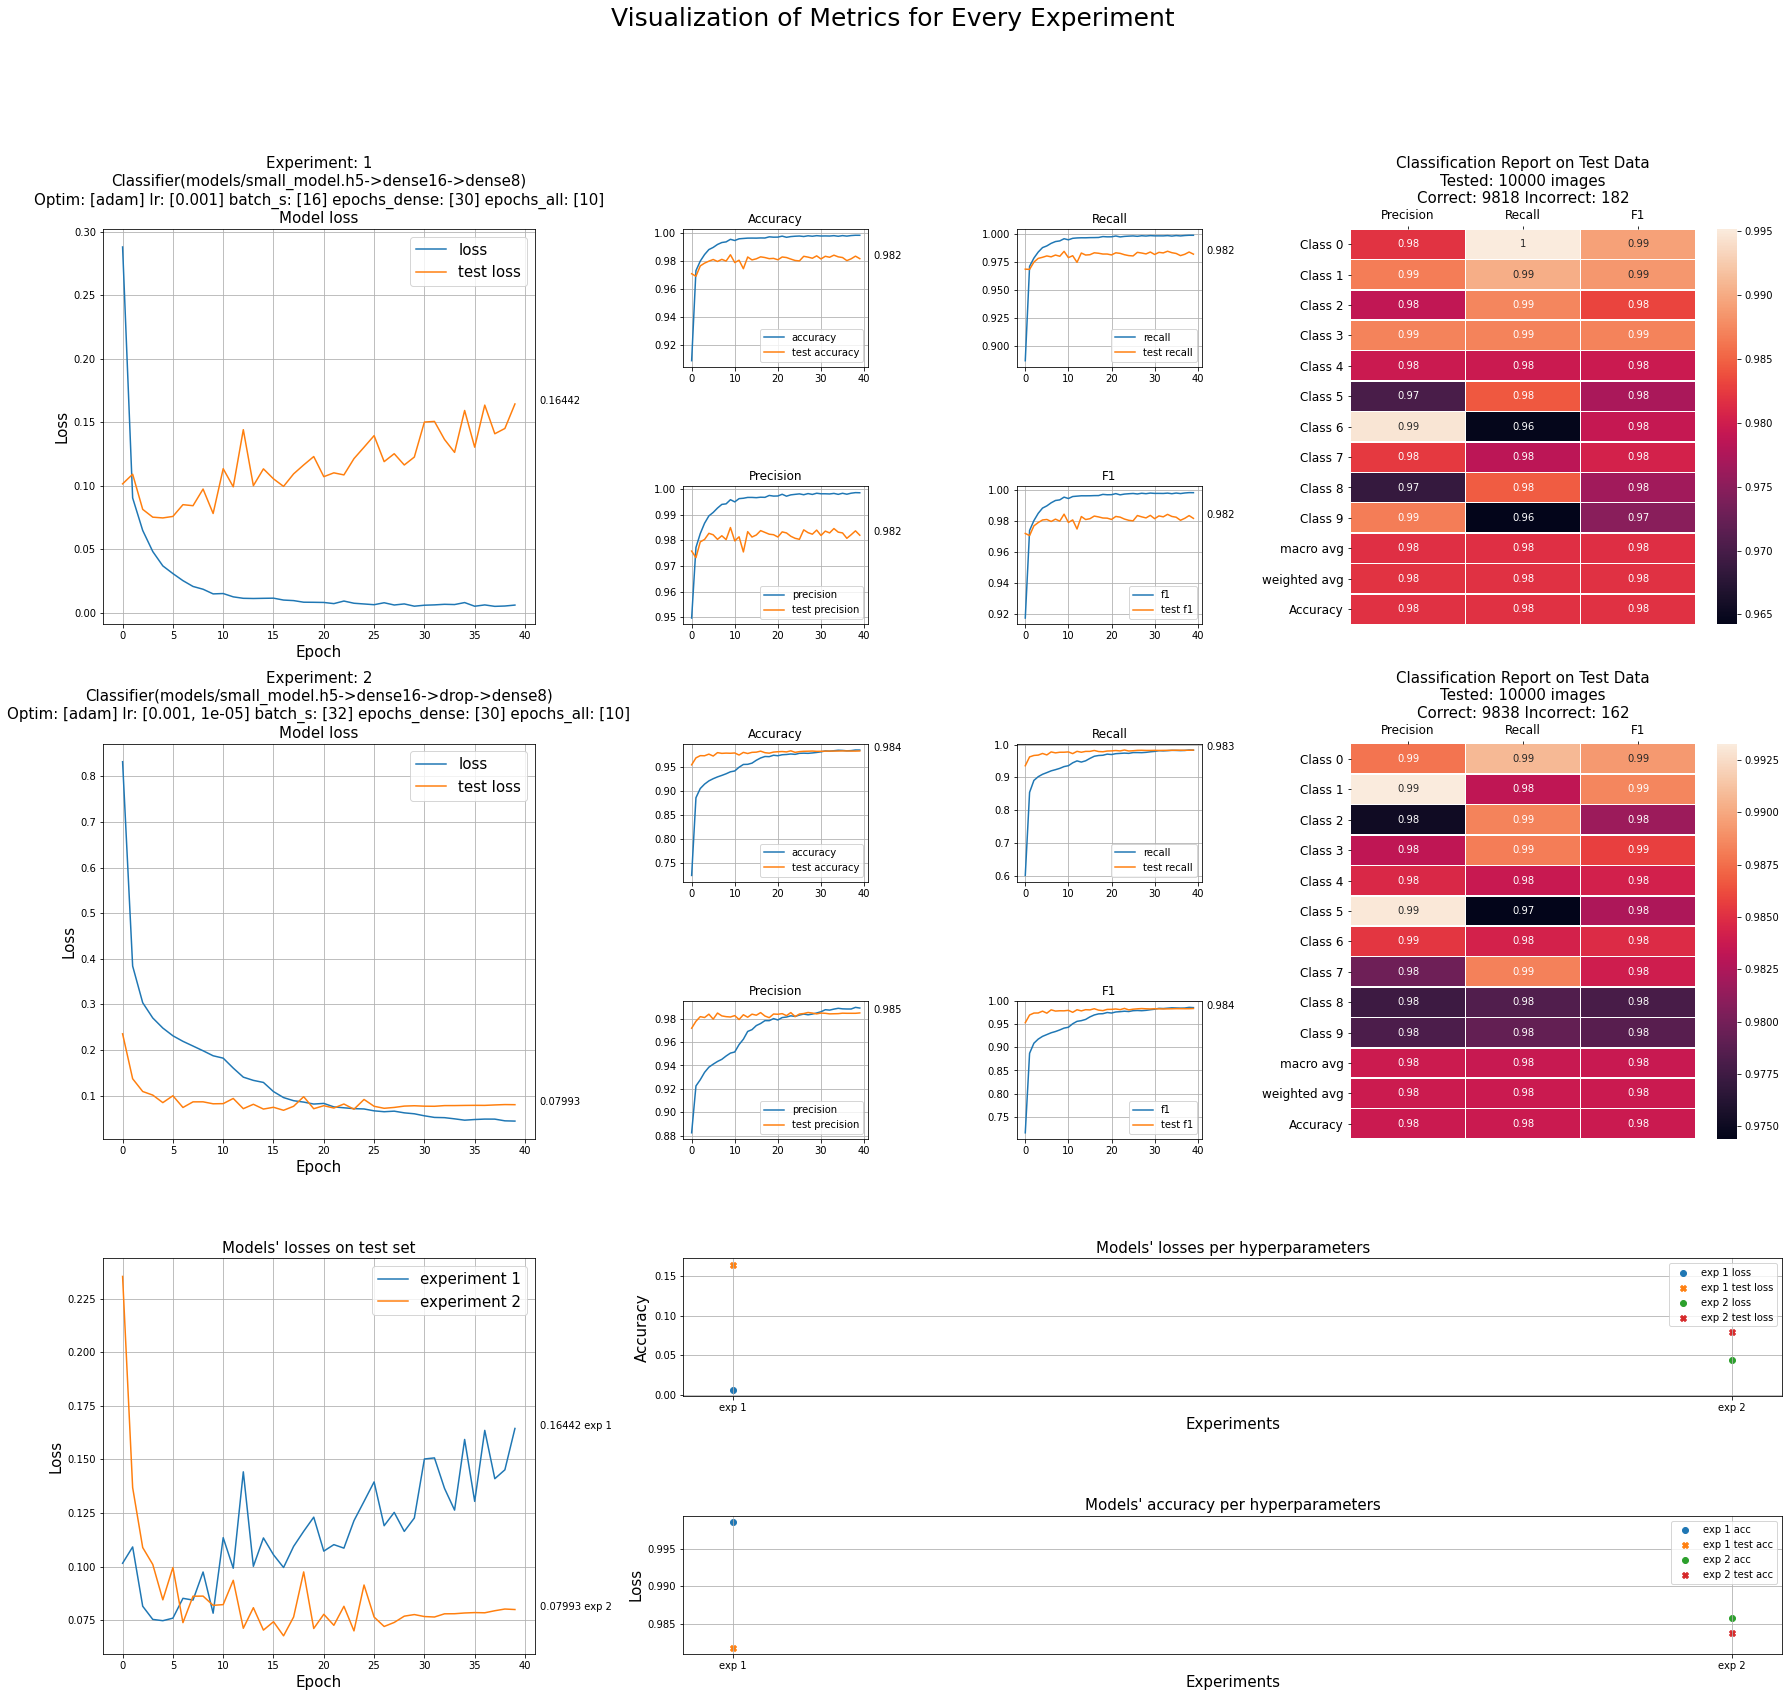

In [ ]:
_ = classifier_loss_visualization(extra_small_model_classifier_histories)

This model has the smallest number of parameters to train from all other models.

For this reason it converges very quickly.

In the first test, overfitting was observed as the test set error increased.

This was treated continuously with dropout and the model does not show overfitt therefore this model will be saved as the best extra small

Adding the best set of hyperparametres to the classifiers experiment list 

and save it

In [ ]:
classifier_experiment_histories.append(extra_small_model_classifier_histories[1])
extra_small_model_classifier_histories[1].model.save("small_encoder_extra_small_dense_classifier.h5")

## Small Encoder + Small Dense

### Default Small Dense

Train only dense layer
Epoch 1/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1583 - accuracy: 0.9510 - Precision: 0.9669 - Recall: 0.9393 - val_loss: 0.0748 - val_accuracy: 0.9768 - val_Precision: 0.9803 - val_Recall: 0.9749
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0568 - accuracy: 0.9829 - Precision: 0.9851 - Recall: 0.9813 - val_loss: 0.0589 - val_accuracy: 0.9819 - val_Precision: 0.9836 - val_Recall: 0.9791
Epoch 3/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0387 - accuracy: 0.9881 - Precision: 0.9893 - Recall: 0.9870 - val_loss: 0.0510 - val_accuracy: 0.9842 - val_Precision: 0.9862 - val_Recall: 0.9828
Epoch 4/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0266 - accuracy: 0.9913 - Precision: 0.9920 - Recall: 0.9907 - val_loss: 0.0581 - val_accuracy: 0.9831 - val_Precision: 0.9838 - val_Recall: 0.9826
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - los

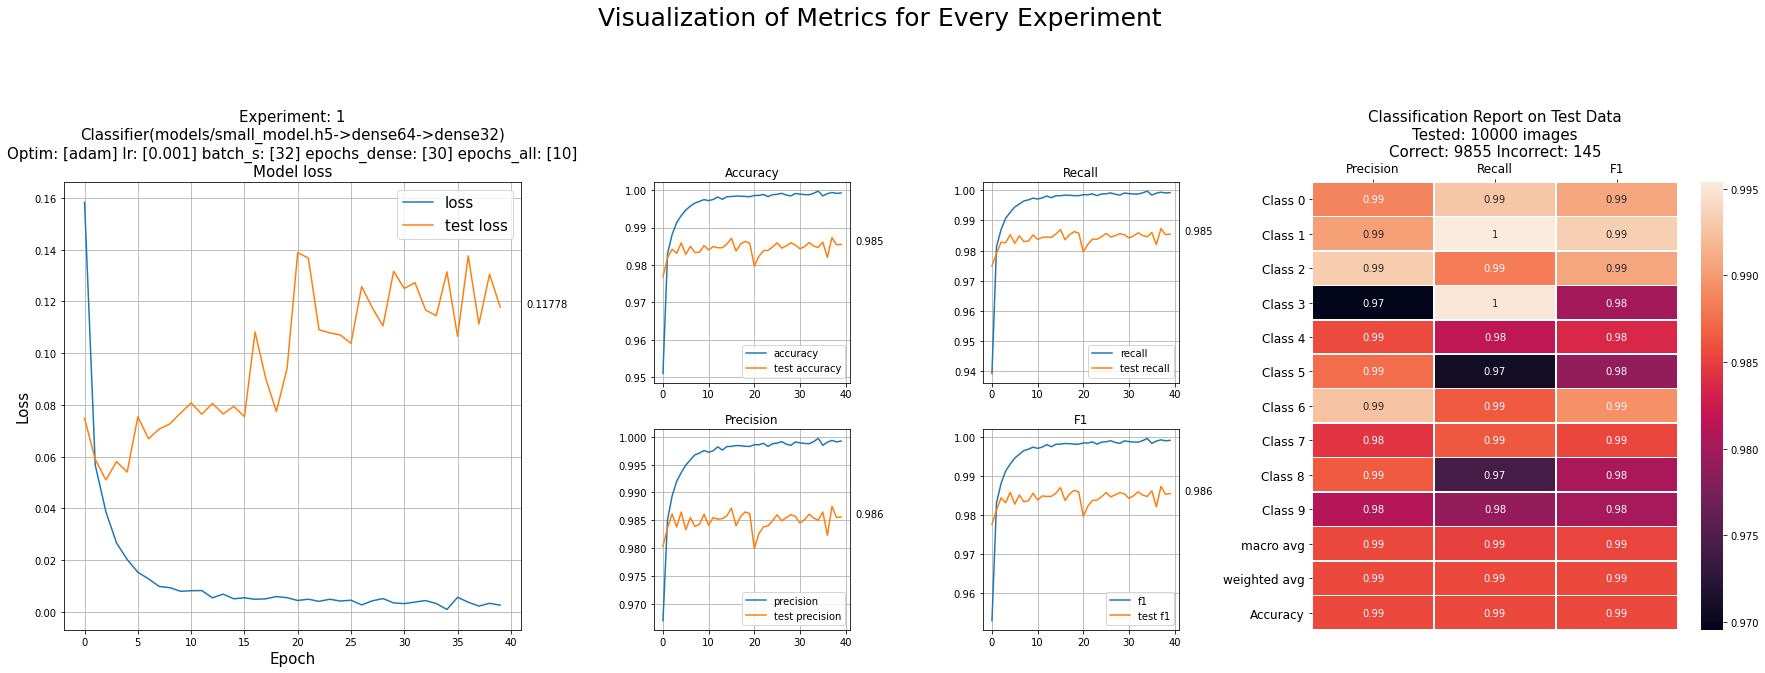

In [ ]:
small_model_classifier_histories = []
small_model_classifier_info = {"dense_layers" : [["dense", 64],
                                                ["dense", 32]]
                                ,
                                "encoder_layers" : "models/small_model.h5"
                                ,
                                "optimizer" :   ["adam", 0.001]
                                ,
                                "dense_only_train_epochs": 30
                                ,
                                "full_train_epochs": 10
                                ,
                                "batch_size": 32
                                }

# get model
small_model_classifier = get_Classifier(small_model_classifier_info, train_X, num_of_classes)
# train it
small_model_classifier_history = train_Classifier(small_model_classifier, small_model_classifier_info, train_X, train_Y, test_X, test_Y)
# save it
small_model_classifier_histories.append(small_model_classifier_history)
# plot it
_ = classifier_loss_visualization([small_model_classifier_history])

### Adding Dropout to Dense

Train only dense layer
Epoch 1/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4495 - accuracy: 0.8518 - Precision: 0.9204 - Recall: 0.8028 - val_loss: 0.0863 - val_accuracy: 0.9743 - val_Precision: 0.9787 - val_Recall: 0.9706
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1878 - accuracy: 0.9422 - Precision: 0.9598 - Recall: 0.9279 - val_loss: 0.0721 - val_accuracy: 0.9771 - val_Precision: 0.9806 - val_Recall: 0.9738
Epoch 3/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1356 - accuracy: 0.9590 - Precision: 0.9693 - Recall: 0.9496 - val_loss: 0.0490 - val_accuracy: 0.9856 - val_Precision: 0.9866 - val_Recall: 0.9841
Epoch 4/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1042 - accuracy: 0.9686 - Precision: 0.9759 - Recall: 0.9616 - val_loss: 0.0489 - val_accuracy: 0.9857 - val_Precision: 0.9876 - val_Recall: 0.9835
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - los

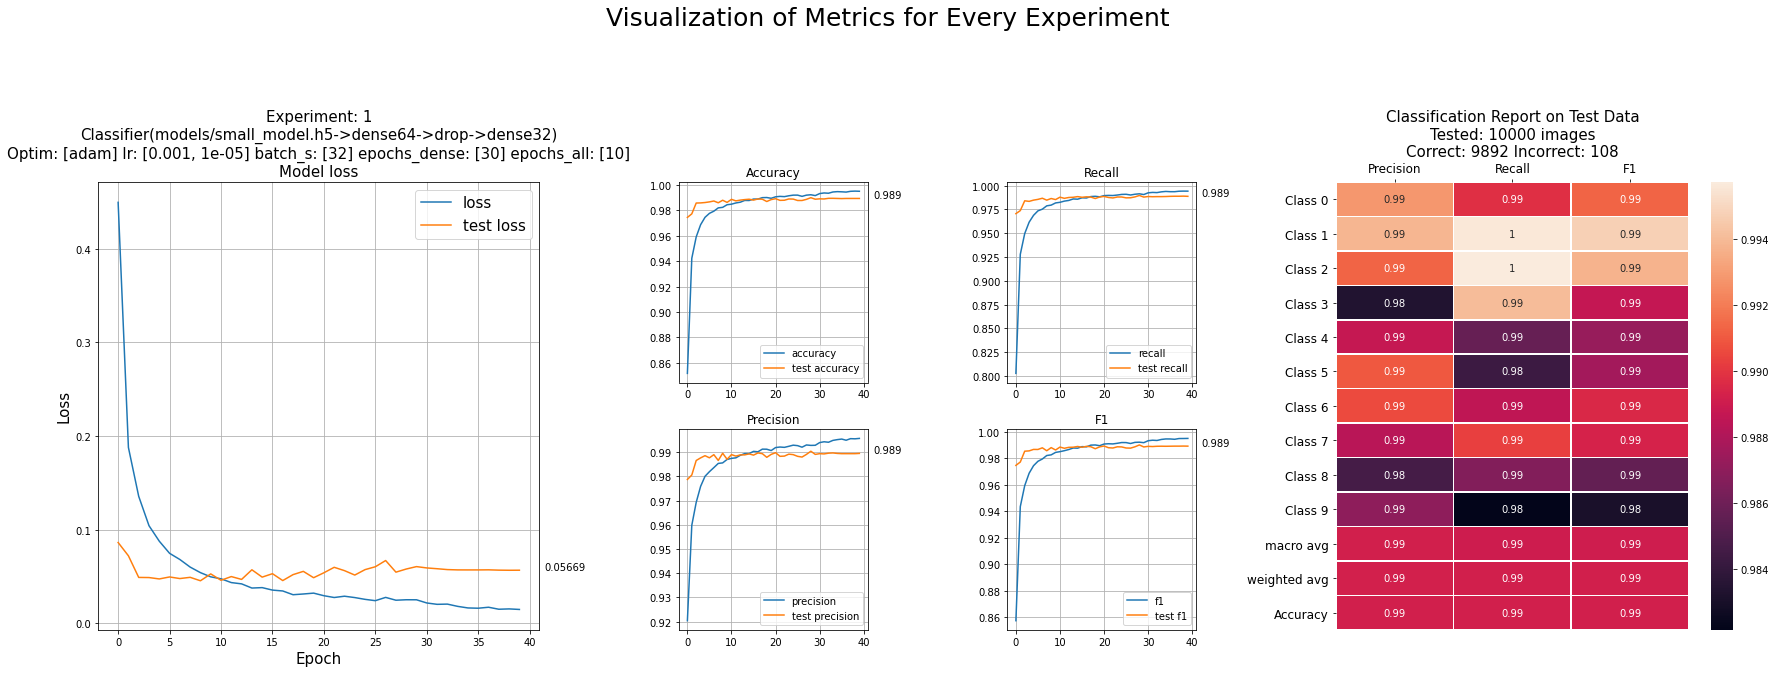

In [ ]:
small_model_classifier_info = {"dense_layers" : [["dense", 64],
                                                 ["drop", 0.5],
                                                ["dense", 32]]
                                ,
                                "encoder_layers" : "models/small_model.h5"
                                ,
                                "optimizer" :   ["adam", 0.001, 1e-5]
                                ,
                                "dense_only_train_epochs": 30
                                ,
                                "full_train_epochs": 10
                                ,
                                "batch_size": 32
                                }


# get model
small_model_classifier = get_Classifier(small_model_classifier_info, train_X, num_of_classes)
# train it
small_model_classifier_history = train_Classifier(small_model_classifier, small_model_classifier_info, train_X, train_Y, test_X, test_Y)
# save it
small_model_classifier_histories.append(small_model_classifier_history)
# plot it
_ = classifier_loss_visualization([small_model_classifier_history])

### Train for more epochs with greater learning rate

Train only dense layer
Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4872 - accuracy: 0.8371 - Precision: 0.9164 - Recall: 0.7853 - val_loss: 0.0973 - val_accuracy: 0.9725 - val_Precision: 0.9769 - val_Recall: 0.9697
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2151 - accuracy: 0.9308 - Precision: 0.9551 - Recall: 0.9133 - val_loss: 0.0667 - val_accuracy: 0.9796 - val_Precision: 0.9841 - val_Recall: 0.9770
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1636 - accuracy: 0.9474 - Precision: 0.9646 - Recall: 0.9349 - val_loss: 0.0539 - val_accuracy: 0.9832 - val_Precision: 0.9864 - val_Recall: 0.9811
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1320 - accuracy: 0.9596 - Precision: 0.9704 - Recall: 0.9503 - val_loss: 0.0507 - val_accuracy: 0.9838 - val_Precision: 0.9860 - val_Recall: 0.9818
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - los

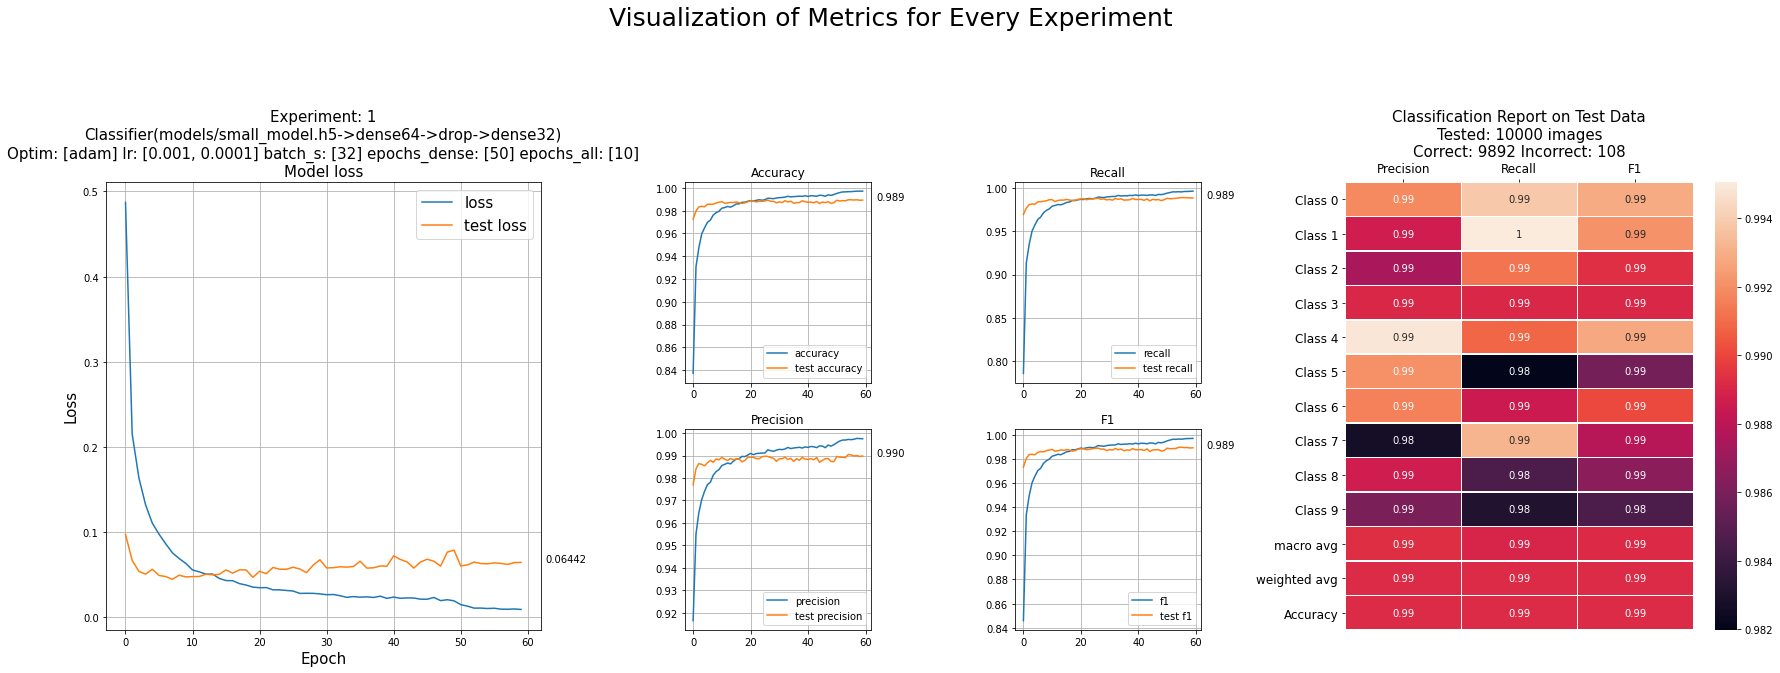

In [ ]:
small_model_classifier_info = {"dense_layers" : [["dense", 64],
                                                 ["drop", 0.5],
                                                ["dense", 32]]
                                ,
                                "encoder_layers" : "models/small_model.h5"
                                ,
                                "optimizer" :   ["adam", 0.001, 1e-4]
                                ,
                                "dense_only_train_epochs": 50
                                ,
                                "full_train_epochs": 10
                                ,
                                "batch_size": 32
                                }


# get model
small_model_classifier = get_Classifier(small_model_classifier_info, train_X, num_of_classes)
# train it
small_model_classifier_history = train_Classifier(small_model_classifier, small_model_classifier_info, train_X, train_Y, test_X, test_Y)
# save it
small_model_classifier_histories.append(small_model_classifier_history)
# plot it
_ = classifier_loss_visualization([small_model_classifier_history])

### Adding more dropout

Train only dense layer
Epoch 1/25
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5061 - accuracy: 0.8369 - Precision: 0.9087 - Recall: 0.7818 - val_loss: 0.0915 - val_accuracy: 0.9727 - val_Precision: 0.9779 - val_Recall: 0.9682
Epoch 2/25
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2217 - accuracy: 0.9327 - Precision: 0.9500 - Recall: 0.9170 - val_loss: 0.0675 - val_accuracy: 0.9789 - val_Precision: 0.9824 - val_Recall: 0.9755
Epoch 3/25
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1727 - accuracy: 0.9490 - Precision: 0.9607 - Recall: 0.9378 - val_loss: 0.0565 - val_accuracy: 0.9826 - val_Precision: 0.9850 - val_Recall: 0.9807
Epoch 4/25
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1455 - accuracy: 0.9563 - Precision: 0.9655 - Recall: 0.9478 - val_loss: 0.0512 - val_accuracy: 0.9831 - val_Precision: 0.9857 - val_Recall: 0.9810
Epoch 5/25
1875/1875 [==============================] - 14s 8ms/step 

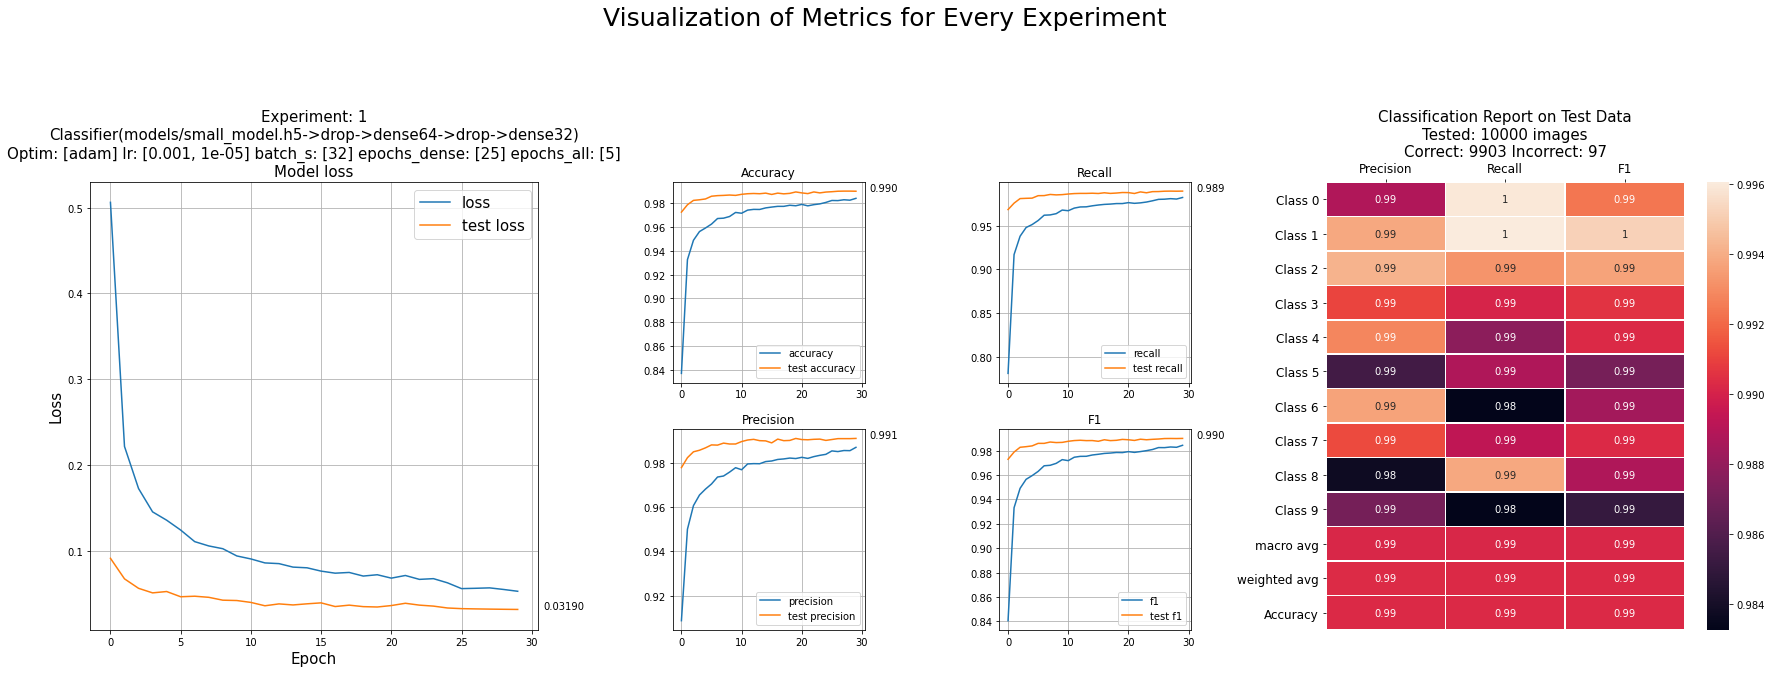

In [9]:
small_model_classifier_info = {"dense_layers" : [["drop", 0.5],
                                                 ["dense", 64],
                                                 ["drop", 0.5],
                                                ["dense", 32]]
                                ,
                                "encoder_layers" : "models/small_model.h5"
                                ,
                                "optimizer" :   ["adam", 0.001, 1e-5]
                                ,
                                "dense_only_train_epochs": 25
                                ,
                                "full_train_epochs": 5
                                ,
                                "batch_size": 32
                                }


# get model
small_model_classifier = get_Classifier(small_model_classifier_info, train_X, num_of_classes)
# train it
small_model_classifier_history = train_Classifier(small_model_classifier, small_model_classifier_info, train_X, train_Y, test_X, test_Y)
# save it
# small_model_classifier_histories.append(small_model_classifier_history)
# plot it
_ = classifier_loss_visualization([small_model_classifier_history])
classifier_experiment_histories.append(small_model_classifier_history)
small_model_classifier_history.model.save("small_encoder_small_dense_classifier.h5")

### Small Encoder + Small Dense overview

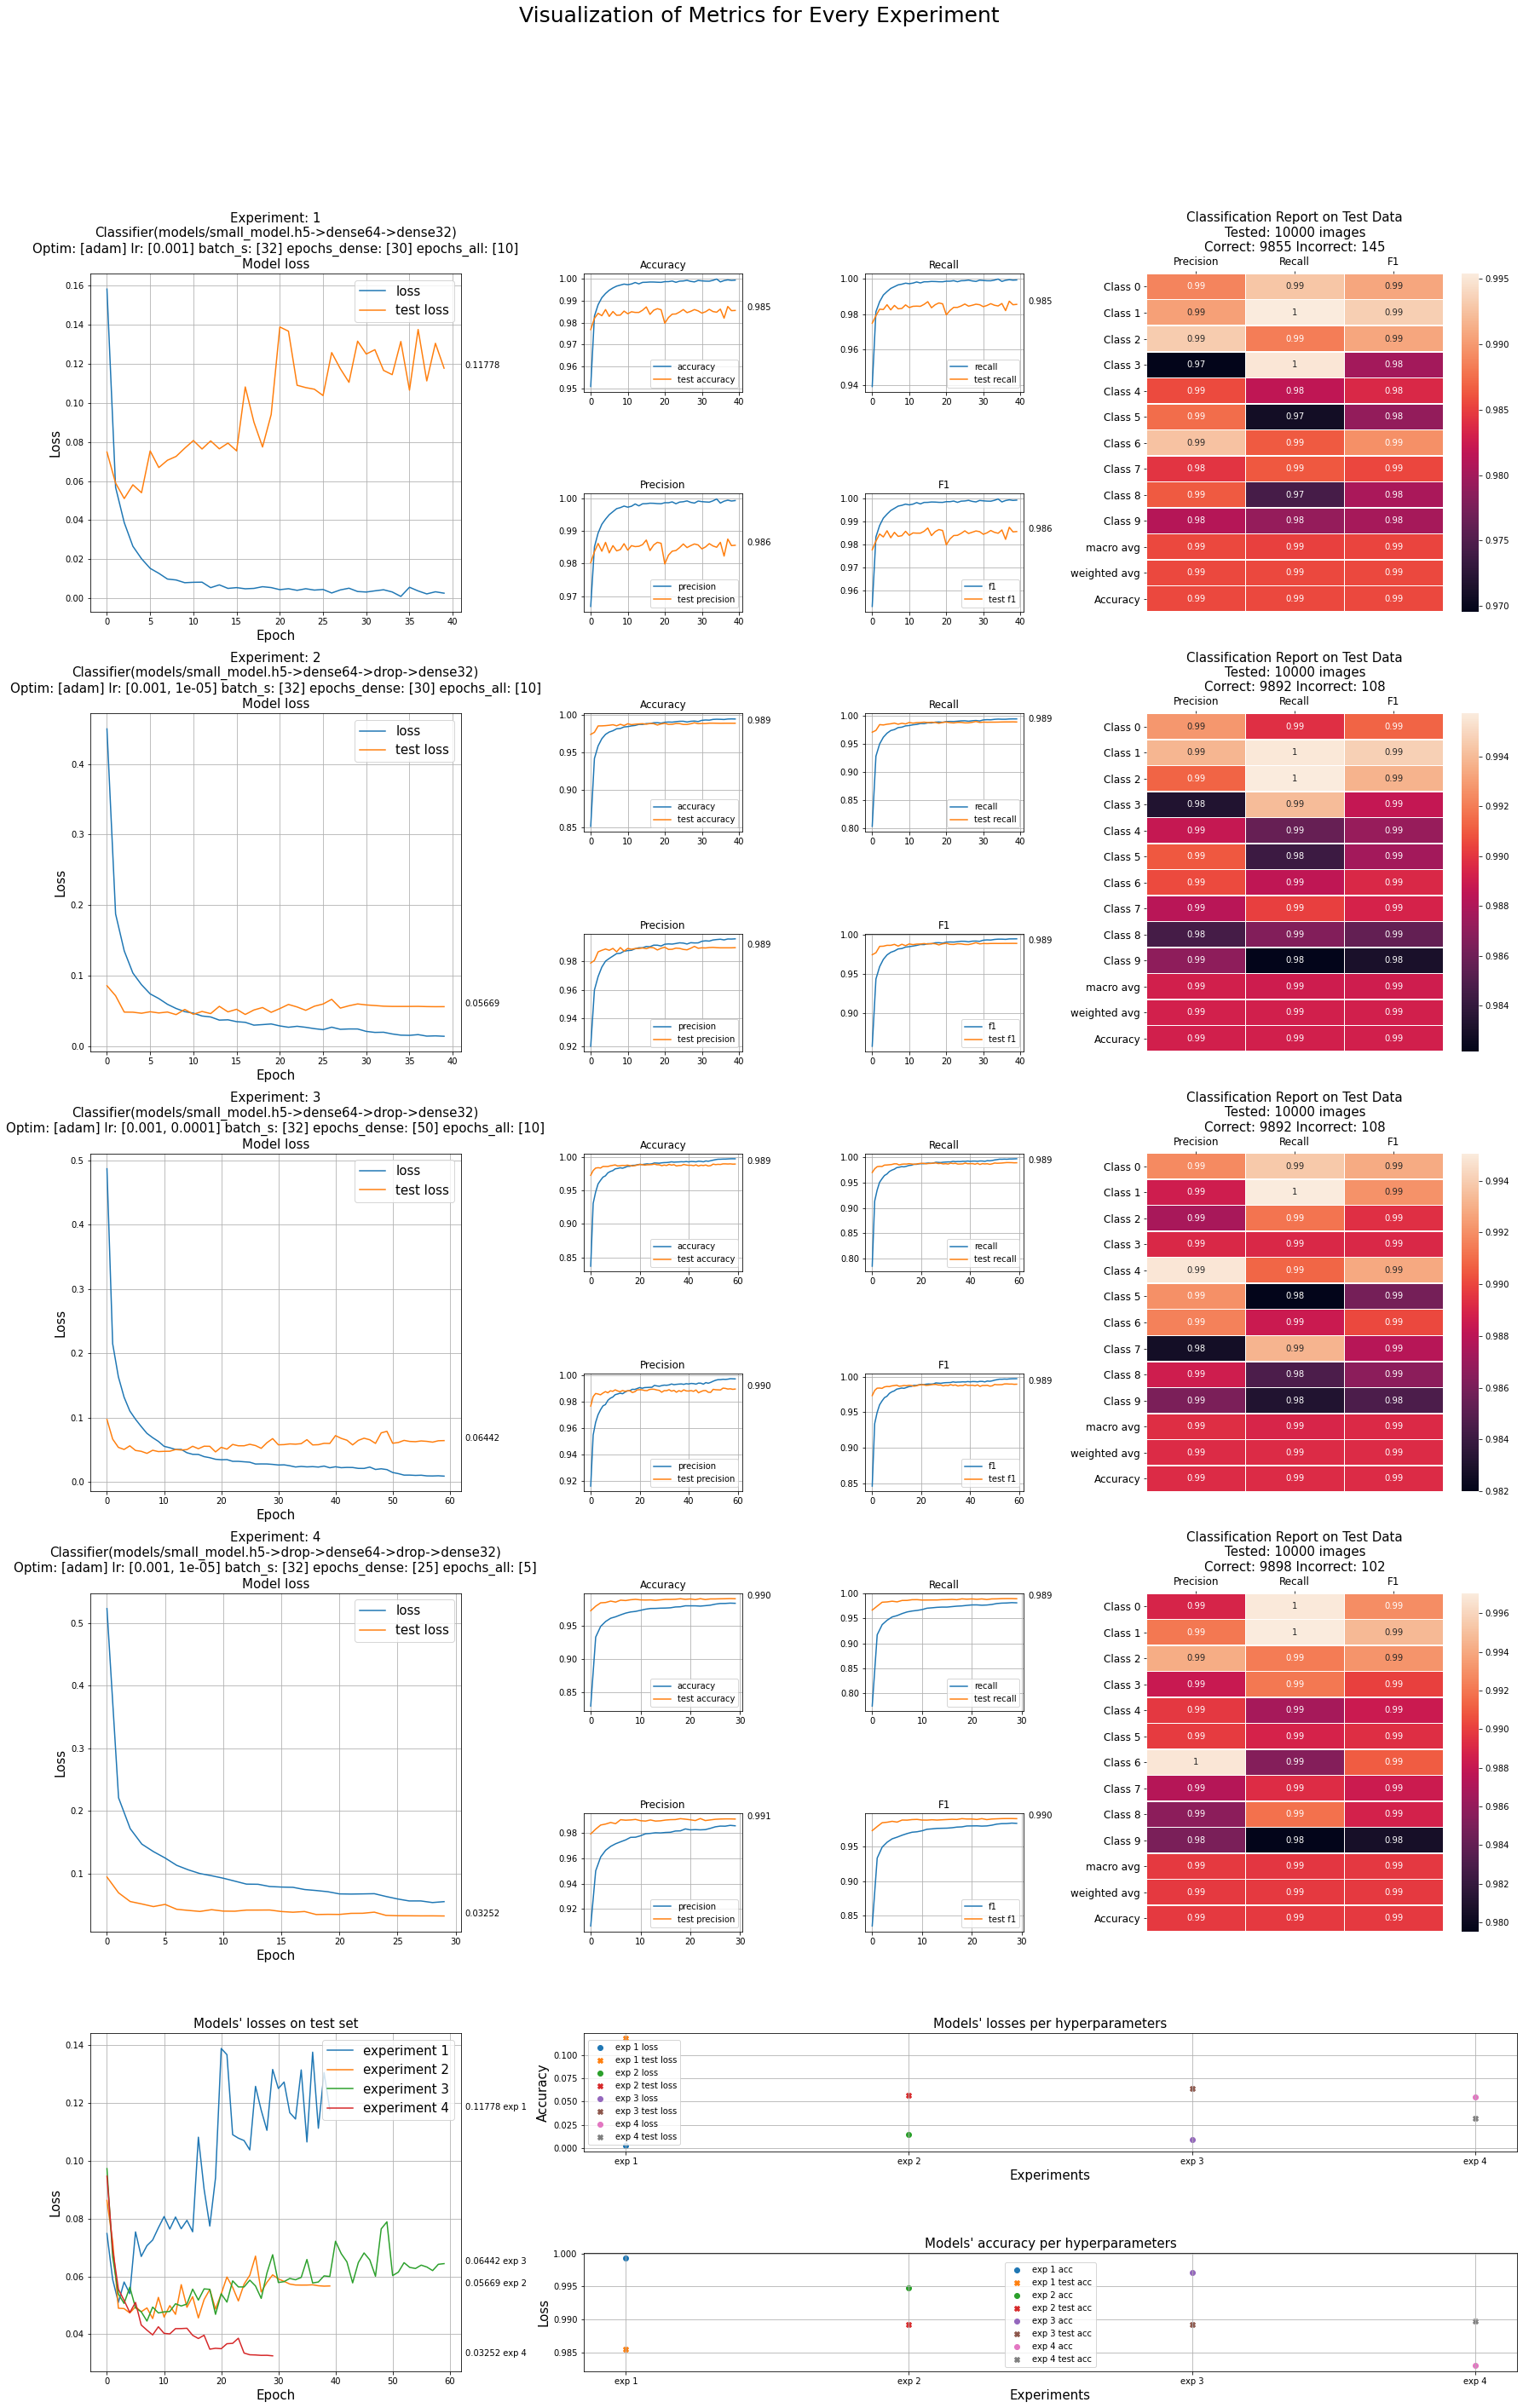

In [ ]:
_ = classifier_loss_visualization(small_model_classifier_histories)

In this model we initially had a lot of overfitting.

Then with the use of dropout it decreased a lot

But then we slightly increased the learning rate and again to a lesser extent showed overfitting

For this reason we introduced more dropout and not only did it reduce it but the model also had better accuracy.

The fact that the training error is more than that of the test is due to the large degree of dropout that we have introduced

Adding the best set of hyperparametres to the classifiers experiment list 

and save it

In [ ]:
classifier_experiment_histories.append(small_model_classifier_histories[3])
small_model_classifier_histories[3].model.save("small_encoder_small_dense_classifier.h5")

## Small Encoder + Large Dense

### Default Large Dense with a little of Dropout

Train only dense layer
Epoch 1/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1860 - accuracy: 0.9424 - Precision: 0.9593 - Recall: 0.9303 - val_loss: 0.0682 - val_accuracy: 0.9783 - val_Precision: 0.9807 - val_Recall: 0.9759
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0741 - accuracy: 0.9774 - Precision: 0.9805 - Recall: 0.9748 - val_loss: 0.0462 - val_accuracy: 0.9853 - val_Precision: 0.9872 - val_Recall: 0.9839
Epoch 3/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0520 - accuracy: 0.9840 - Precision: 0.9861 - Recall: 0.9824 - val_loss: 0.0449 - val_accuracy: 0.9863 - val_Precision: 0.9878 - val_Recall: 0.9845
Epoch 4/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0412 - accuracy: 0.9878 - Precision: 0.9891 - Recall: 0.9864 - val_loss: 0.0472 - val_accuracy: 0.9866 - val_Precision: 0.9879 - val_Recall: 0.9852
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - los

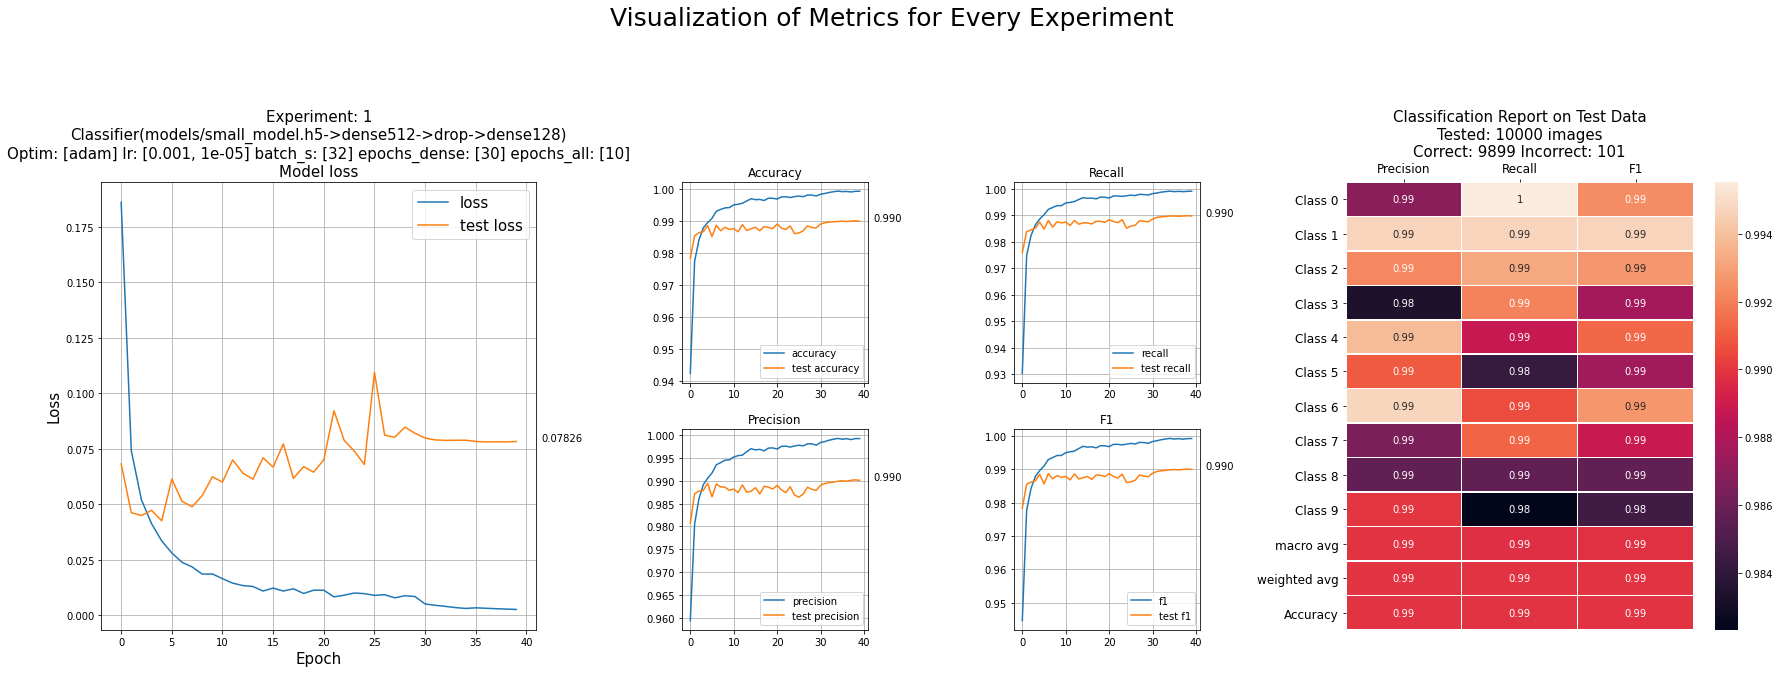

In [ ]:
large_model_classifier_histories = []
large_model_classifier_info = {"dense_layers" : [["dense", 512],
                                                 ["drop", 0.5],
                                                ["dense", 128]]
                                ,
                                "encoder_layers" : "models/small_model.h5"
                                ,
                                "optimizer" :   ["adam", 0.001, 1e-5]
                                ,
                                "dense_only_train_epochs": 30
                                ,
                                "full_train_epochs": 10
                                ,
                                "batch_size": 32
                                }


# get model
large_model_classifier = get_Classifier(large_model_classifier_info, train_X, num_of_classes)
# train it
large_model_classifier_history = train_Classifier(large_model_classifier, large_model_classifier_info, train_X, train_Y, test_X, test_Y)
# save it
large_model_classifier_histories.append(large_model_classifier_history)
# plot it
_ = classifier_loss_visualization([large_model_classifier_history])

### Adding more Dropout

Train only dense layer
Epoch 1/30
1875/1875 [==============================] - 18s 9ms/step - loss: 1.0148 - accuracy: 0.6589 - Precision: 0.8782 - Recall: 0.5563 - val_loss: 0.1370 - val_accuracy: 0.9659 - val_Precision: 0.9793 - val_Recall: 0.9490
Epoch 2/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3473 - accuracy: 0.8985 - Precision: 0.9444 - Recall: 0.8626 - val_loss: 0.0705 - val_accuracy: 0.9792 - val_Precision: 0.9866 - val_Recall: 0.9735
Epoch 3/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2303 - accuracy: 0.9371 - Precision: 0.9629 - Recall: 0.9155 - val_loss: 0.0700 - val_accuracy: 0.9799 - val_Precision: 0.9843 - val_Recall: 0.9749
Epoch 4/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1865 - accuracy: 0.9505 - Precision: 0.9700 - Recall: 0.9348 - val_loss: 0.0594 - val_accuracy: 0.9829 - val_Precision: 0.9853 - val_Recall: 0.9794
Epoch 5/30
1875/1875 [==============================] - 17s 9ms/step 

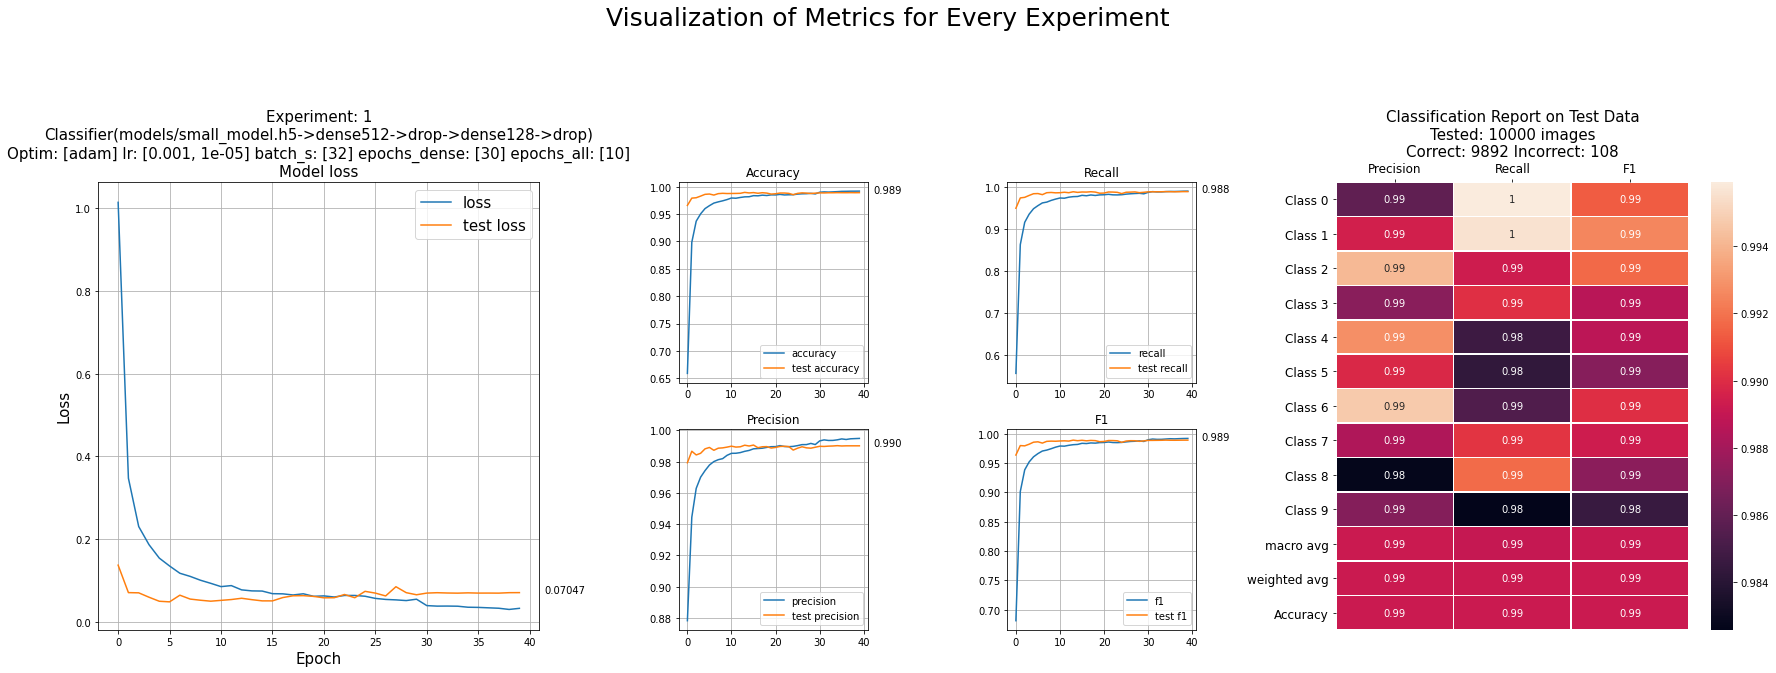

In [10]:
large_model_classifier_info = {"dense_layers" : [["dense", 512],
                                                 ["drop", 0.8],
                                                ["dense", 128],
                                                 ["drop", 0.7]]
                                ,
                                "encoder_layers" : "models/small_model.h5"
                                ,
                                "optimizer" :   ["adam", 0.001, 1e-5]
                                ,
                                "dense_only_train_epochs": 30
                                ,
                                "full_train_epochs": 10
                                ,
                                "batch_size": 32
                                }


# get model
large_model_classifier = get_Classifier(large_model_classifier_info, train_X, num_of_classes)
# train it
large_model_classifier_history = train_Classifier(large_model_classifier, large_model_classifier_info, train_X, train_Y, test_X, test_Y)
# save it
# large_model_classifier_histories.append(large_model_classifier_history)
# plot it
_ = classifier_loss_visualization([large_model_classifier_history])
classifier_experiment_histories.append(large_model_classifier_history)
large_model_classifier_history.model.save("small_encoder_large_dense_classifier.h5")

### Train for more epochs with greater learning rate

Train only dense layer
Epoch 1/60
1875/1875 [==============================] - 9s 5ms/step - loss: 0.9209 - accuracy: 0.6977 - Precision: 0.8790 - Recall: 0.5982 - val_loss: 0.1034 - val_accuracy: 0.9704 - val_Precision: 0.9808 - val_Recall: 0.9603
Epoch 2/60
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3200 - accuracy: 0.9100 - Precision: 0.9502 - Recall: 0.8780 - val_loss: 0.0786 - val_accuracy: 0.9778 - val_Precision: 0.9831 - val_Recall: 0.9724
Epoch 3/60
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2129 - accuracy: 0.9435 - Precision: 0.9655 - Recall: 0.9234 - val_loss: 0.0628 - val_accuracy: 0.9822 - val_Precision: 0.9858 - val_Recall: 0.9790
Epoch 4/60
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1679 - accuracy: 0.9565 - Precision: 0.9725 - Recall: 0.9425 - val_loss: 0.0573 - val_accuracy: 0.9838 - val_Precision: 0.9865 - val_Recall: 0.9812
Epoch 5/60
1875/1875 [==============================] - 8s 4ms/step - los

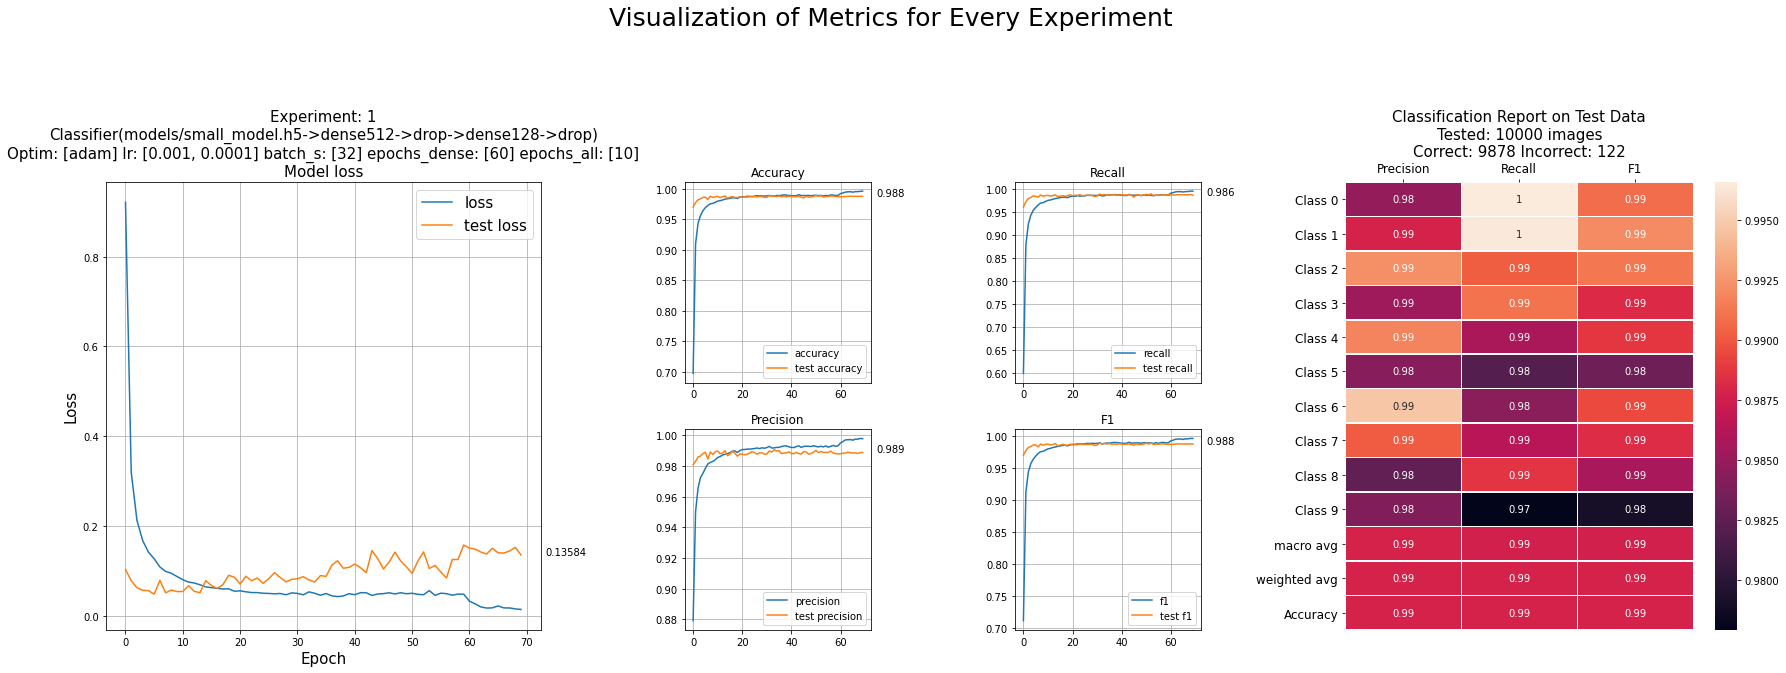

In [ ]:
large_model_classifier_info = {"dense_layers" : [["dense", 512],
                                                 ["drop", 0.8],
                                                ["dense", 128],
                                                 ["drop", 0.7]]
                                ,
                                "encoder_layers" : "models/small_model.h5"
                                ,
                                "optimizer" :   ["adam", 0.001, 1e-4]
                                ,
                                "dense_only_train_epochs": 60
                                ,
                                "full_train_epochs": 10
                                ,
                                "batch_size": 32
                                }


# get model
large_model_classifier = get_Classifier(large_model_classifier_info, train_X, num_of_classes)
# train it
large_model_classifier_history = train_Classifier(large_model_classifier, large_model_classifier_info, train_X, train_Y, test_X, test_Y)
# save it
large_model_classifier_histories.append(large_model_classifier_history)
# plot it
_ = classifier_loss_visualization([large_model_classifier_history])

### Small Encoder + Large Dense overview

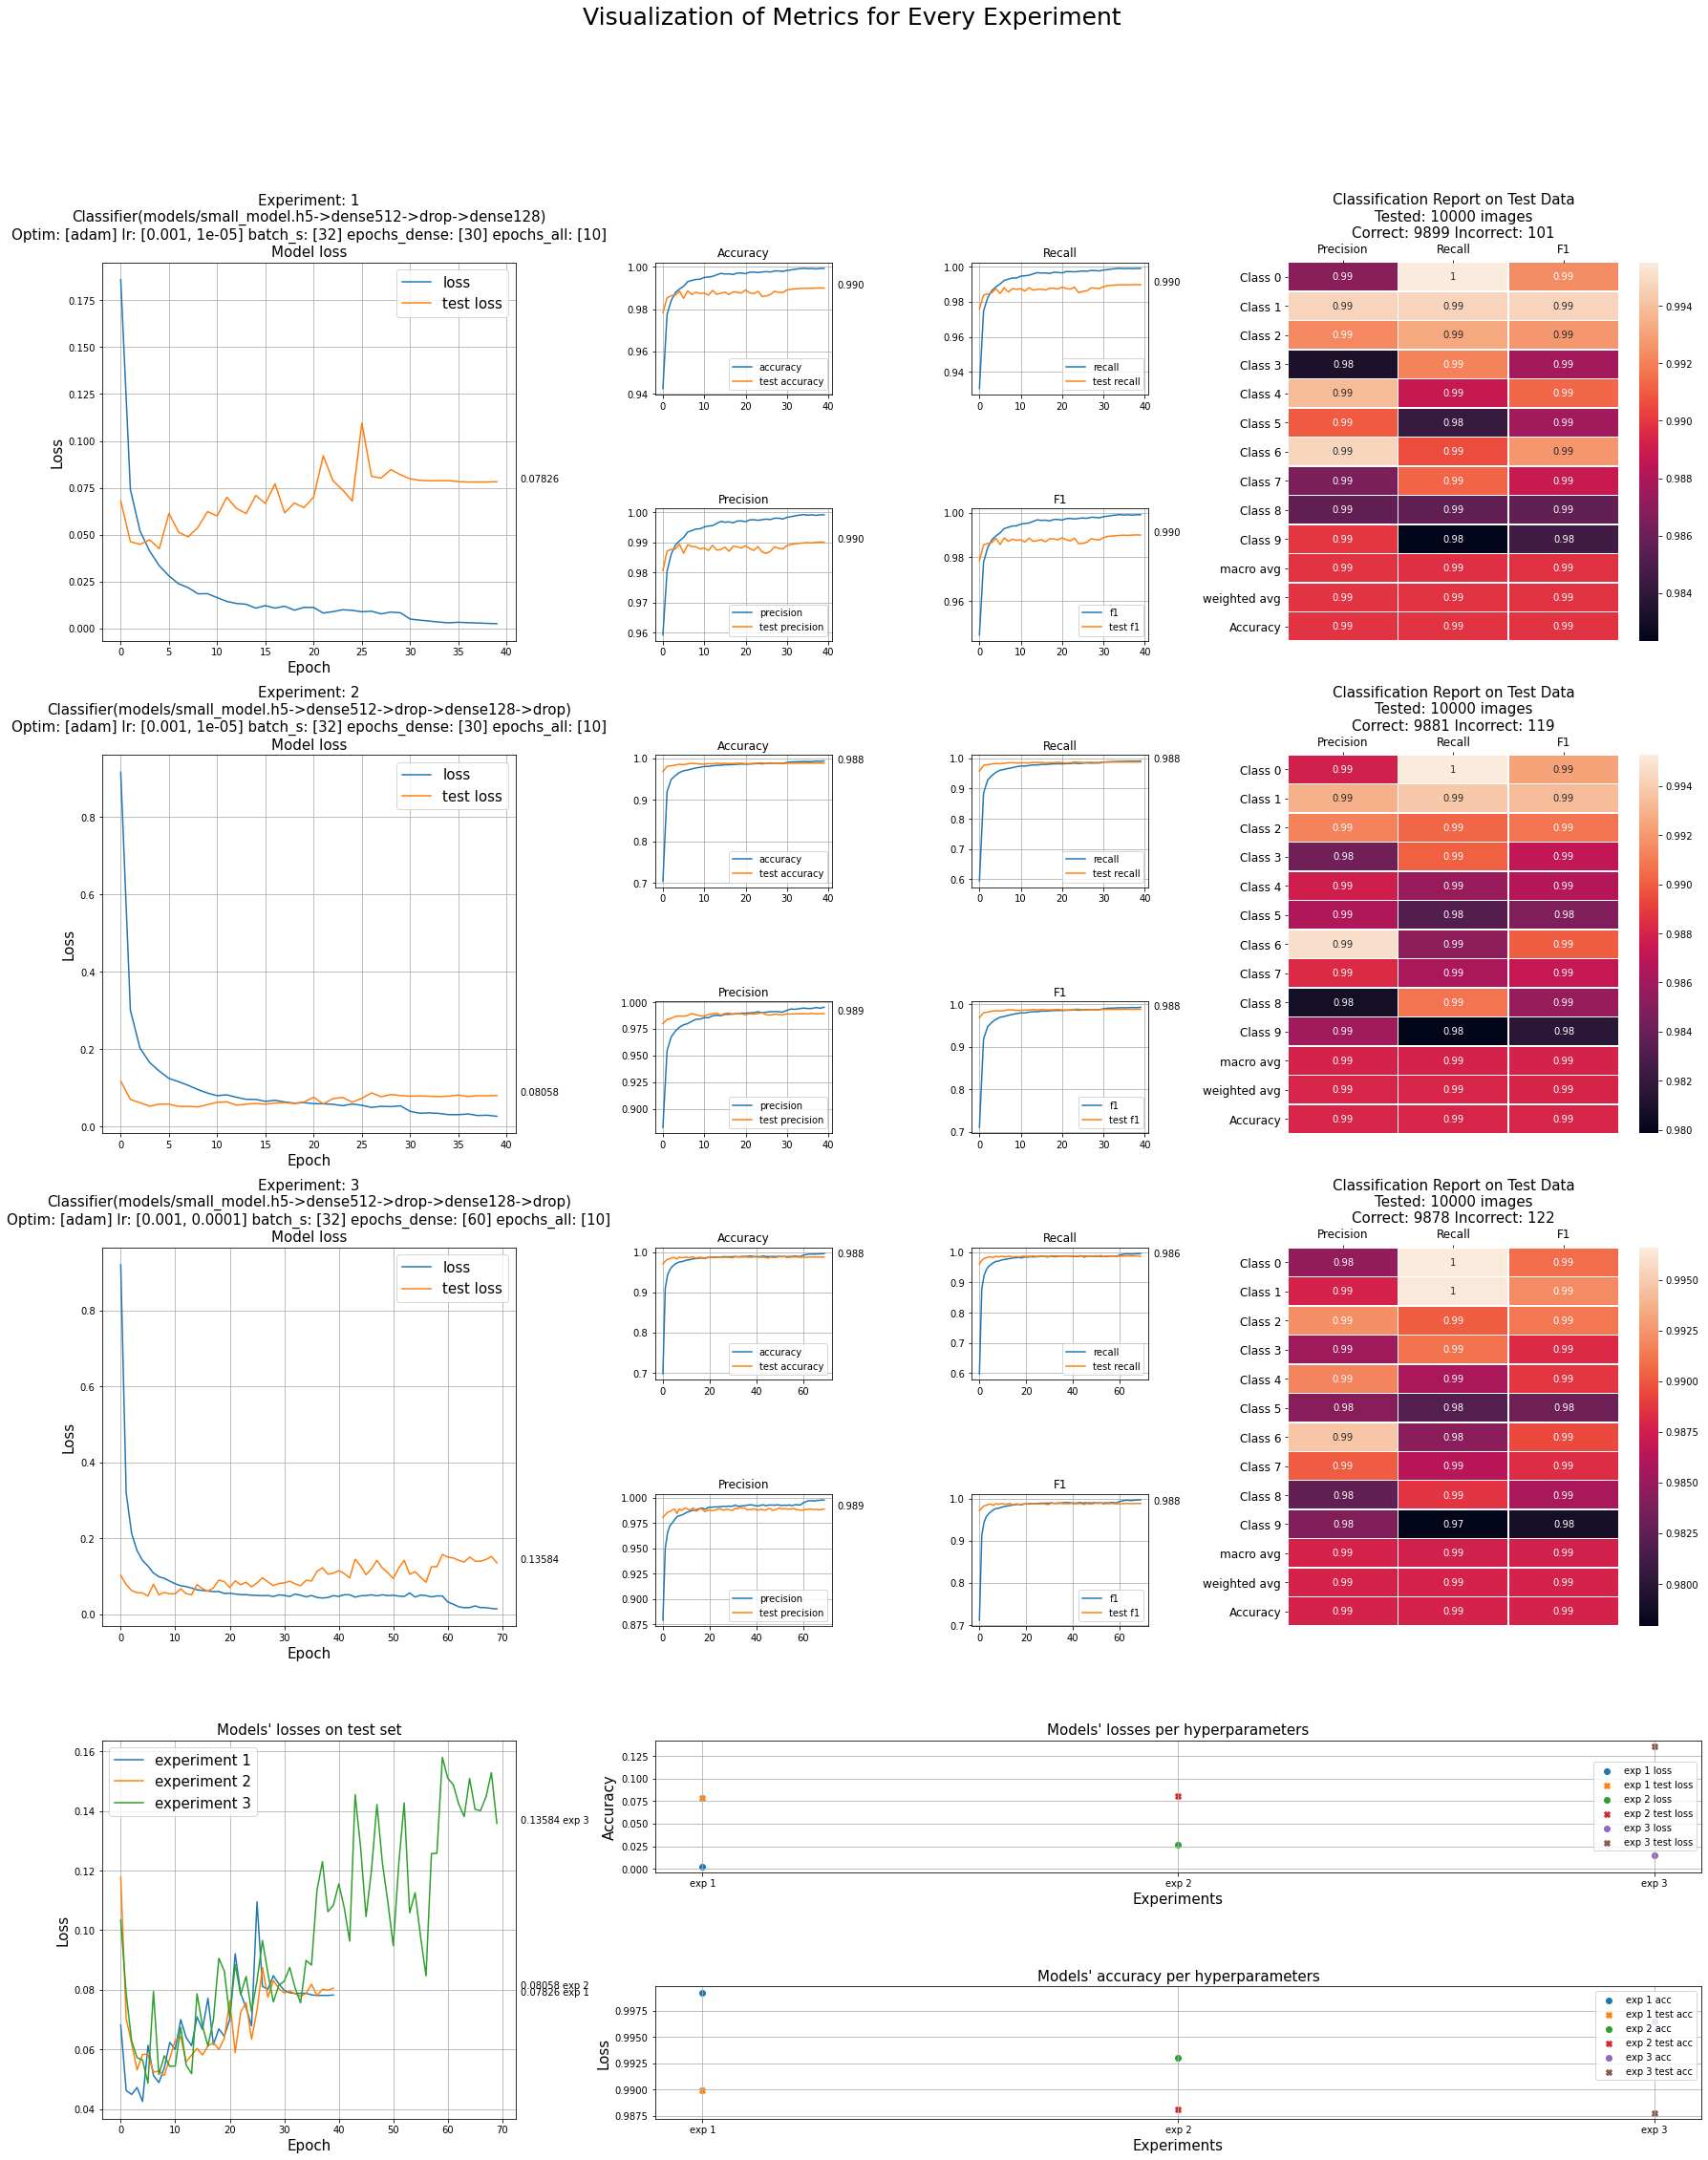

In [ ]:
_ = classifier_loss_visualization(large_model_classifier_histories)

this model as it is the one with more mattresses presented overfitting

This was treated with a dropout

Nevertheless, with the increase of the learning rate, the accuracy decreased.

This model was not as good as the one with the fewer layers

Adding the best set of hyperparametres to the classifiers experiment list 

and save it

In [ ]:
classifier_experiment_histories.append(large_model_classifier_histories[1])
large_model_classifier_histories[1].model.save("small_encoder_large_dense_classifier.h5")

## Large Encoder + Small Dense

### Default Small Dense

Train only dense layer
Epoch 1/30
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1682 - accuracy: 0.9521 - Precision: 0.9632 - Recall: 0.9456 - val_loss: 0.0625 - val_accuracy: 0.9803 - val_Precision: 0.9830 - val_Recall: 0.9792
Epoch 2/30
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0606 - accuracy: 0.9810 - Precision: 0.9834 - Recall: 0.9794 - val_loss: 0.0794 - val_accuracy: 0.9782 - val_Precision: 0.9798 - val_Recall: 0.9772
Epoch 3/30
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0469 - accuracy: 0.9865 - Precision: 0.9878 - Recall: 0.9852 - val_loss: 0.0548 - val_accuracy: 0.9842 - val_Precision: 0.9850 - val_Recall: 0.9829
Epoch 4/30
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0365 - accuracy: 0.9895 - Precision: 0.9903 - Recall: 0.9886 - val_loss: 0.0482 - val_accuracy: 0.9862 - val_Precision: 0.9877 - val_Recall: 0.9851
Epoch 5/30
1875/1875 [==============================] - 28s 15ms/

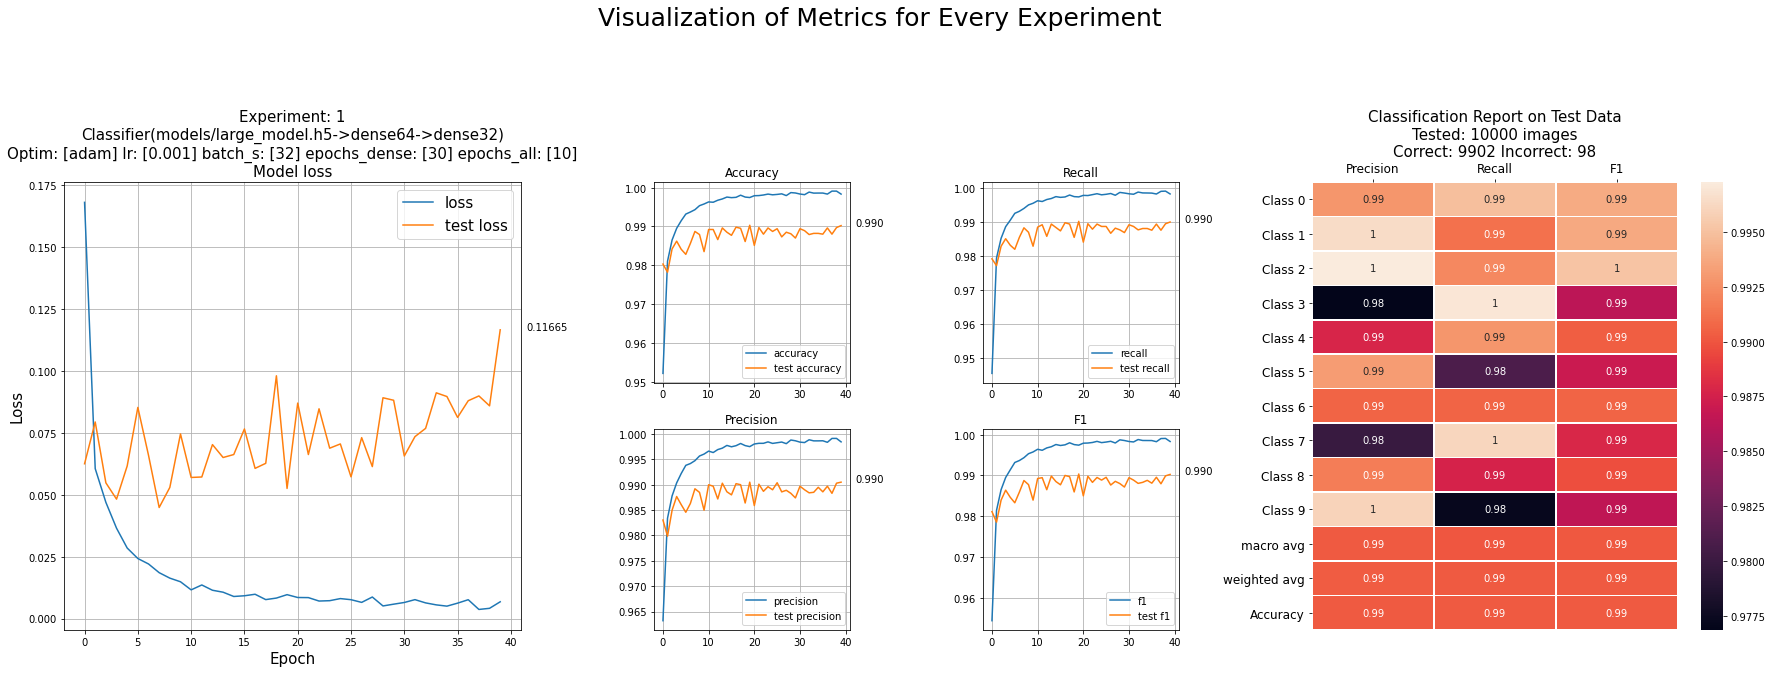

In [11]:
small_model_classifier_histories = []
small_model_classifier_info = {"dense_layers" : [["dense", 64],
                                                ["dense", 32]]
                                ,
                                "encoder_layers" : "models/large_model.h5"
                                ,
                                "optimizer" :   ["adam", 0.001]
                                ,
                                "dense_only_train_epochs": 30
                                ,
                                "full_train_epochs": 10
                                ,
                                "batch_size": 32
                                }

# get model
small_model_classifier = get_Classifier(small_model_classifier_info, train_X, num_of_classes)
# train it
small_model_classifier_history = train_Classifier(small_model_classifier, small_model_classifier_info, train_X, train_Y, test_X, test_Y)
# save it
small_model_classifier_histories.append(small_model_classifier_history)
# plot it
_ = classifier_loss_visualization([small_model_classifier_history])

### Adding Dropout

Train only dense layer
Epoch 1/30
1875/1875 [==============================] - 29s 15ms/step - loss: 1.1386 - accuracy: 0.5684 - Precision: 0.8400 - Recall: 0.4693 - val_loss: 0.2315 - val_accuracy: 0.9570 - val_Precision: 0.9769 - val_Recall: 0.9237
Epoch 2/30
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4385 - accuracy: 0.8518 - Precision: 0.9361 - Recall: 0.8007 - val_loss: 0.2454 - val_accuracy: 0.9500 - val_Precision: 0.9659 - val_Recall: 0.9079
Epoch 3/30
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1540 - accuracy: 0.9575 - Precision: 0.9673 - Recall: 0.9507 - val_loss: 0.0749 - val_accuracy: 0.9813 - val_Precision: 0.9856 - val_Recall: 0.9763
Epoch 4/30
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0978 - accuracy: 0.9754 - Precision: 0.9807 - Recall: 0.9708 - val_loss: 0.0824 - val_accuracy: 0.9808 - val_Precision: 0.9839 - val_Recall: 0.9782
Epoch 5/30
1875/1875 [==============================] - 28s 15ms/

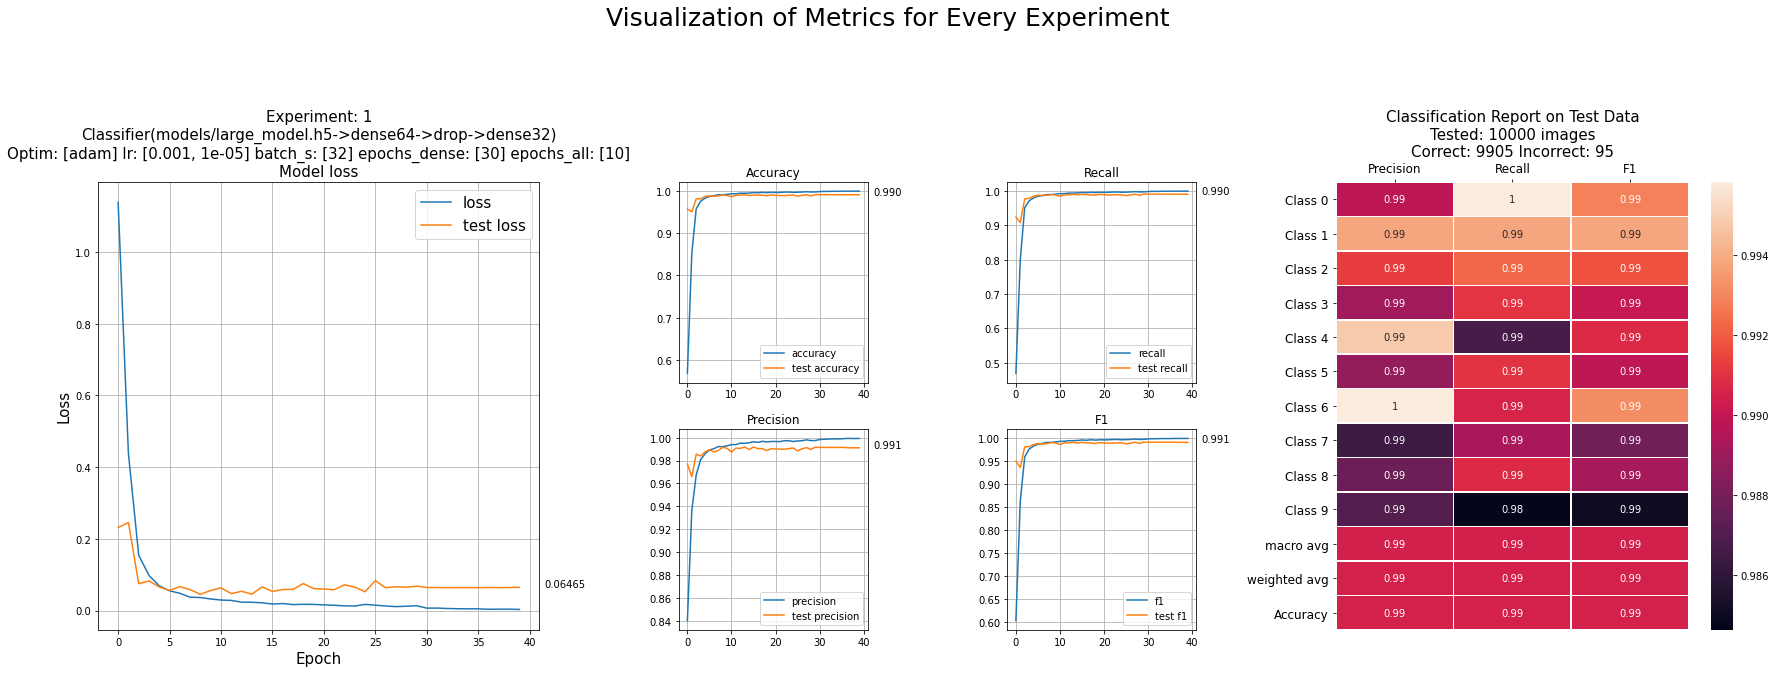

In [12]:
small_model_classifier_info = {"dense_layers" : [["dense", 64],
                                                 ["drop", 0.5],
                                                ["dense", 32]]
                                ,
                                "encoder_layers" : "models/large_model.h5"
                                ,
                                "optimizer" :   ["adam", 0.001, 1e-5]
                                ,
                                "dense_only_train_epochs": 30
                                ,
                                "full_train_epochs": 10
                                ,
                                "batch_size": 32
                                }


# get model
small_model_classifier = get_Classifier(small_model_classifier_info, train_X, num_of_classes)
# train it
small_model_classifier_history = train_Classifier(small_model_classifier, small_model_classifier_info, train_X, train_Y, test_X, test_Y)
# save it
small_model_classifier_histories.append(small_model_classifier_history)
# plot it
_ = classifier_loss_visualization([small_model_classifier_history])

### Decreasing epochs to decrease overfitting 

Train only dense layer
Epoch 1/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.7562 - accuracy: 0.7386 - Precision: 0.8767 - Recall: 0.6558 - val_loss: 0.1411 - val_accuracy: 0.9652 - val_Precision: 0.9792 - val_Recall: 0.9525
Epoch 2/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3596 - accuracy: 0.8834 - Precision: 0.9299 - Recall: 0.8490 - val_loss: 0.0941 - val_accuracy: 0.9751 - val_Precision: 0.9833 - val_Recall: 0.9709
Epoch 3/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2760 - accuracy: 0.9105 - Precision: 0.9445 - Recall: 0.8865 - val_loss: 0.0826 - val_accuracy: 0.9788 - val_Precision: 0.9843 - val_Recall: 0.9747
Epoch 4/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2214 - accuracy: 0.9294 - Precision: 0.9539 - Recall: 0.9105 - val_loss: 0.0635 - val_accuracy: 0.9824 - val_Precision: 0.9865 - val_Recall: 0.9789
Epoch 5/15
1875/1875 [==============================] - 28s 15ms/

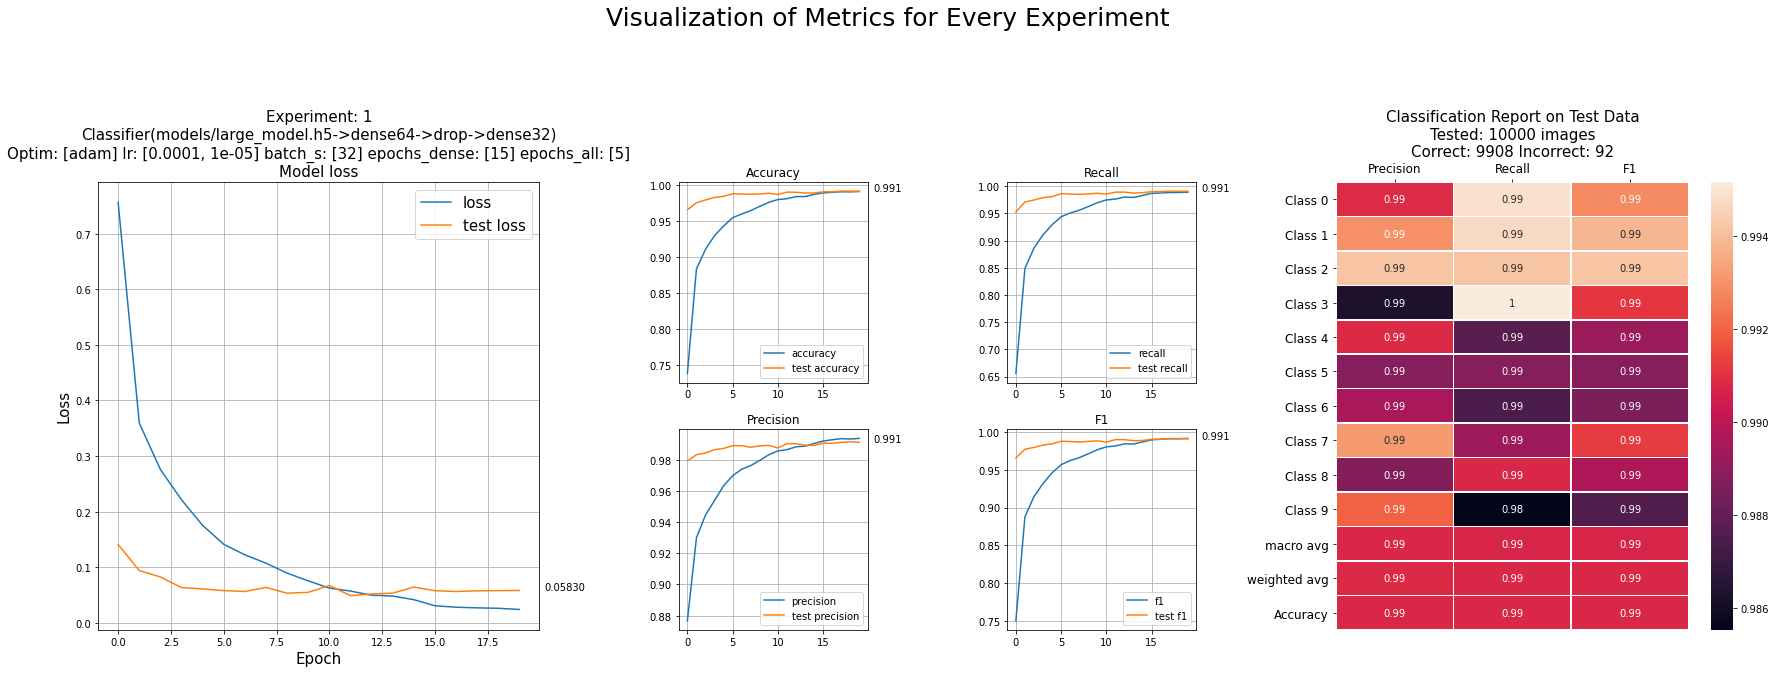

In [13]:
small_model_classifier_info = {"dense_layers" : [["dense", 64],
                                                 ["drop", 0.5],
                                                ["dense", 32]]
                                ,
                                "encoder_layers" : "models/large_model.h5"
                                ,
                                "optimizer" :   ["adam", 0.0001, 1e-5]
                                ,
                                "dense_only_train_epochs": 15
                                ,
                                "full_train_epochs": 5
                                ,
                                "batch_size": 32
                                }


# get model
small_model_classifier = get_Classifier(small_model_classifier_info, train_X, num_of_classes)
# train it
small_model_classifier_history = train_Classifier(small_model_classifier, small_model_classifier_info, train_X, train_Y, test_X, test_Y)
# save it
small_model_classifier_histories.append(small_model_classifier_history)
# plot it
_ = classifier_loss_visualization([small_model_classifier_history])

### Large Encoder + Small Dense overview

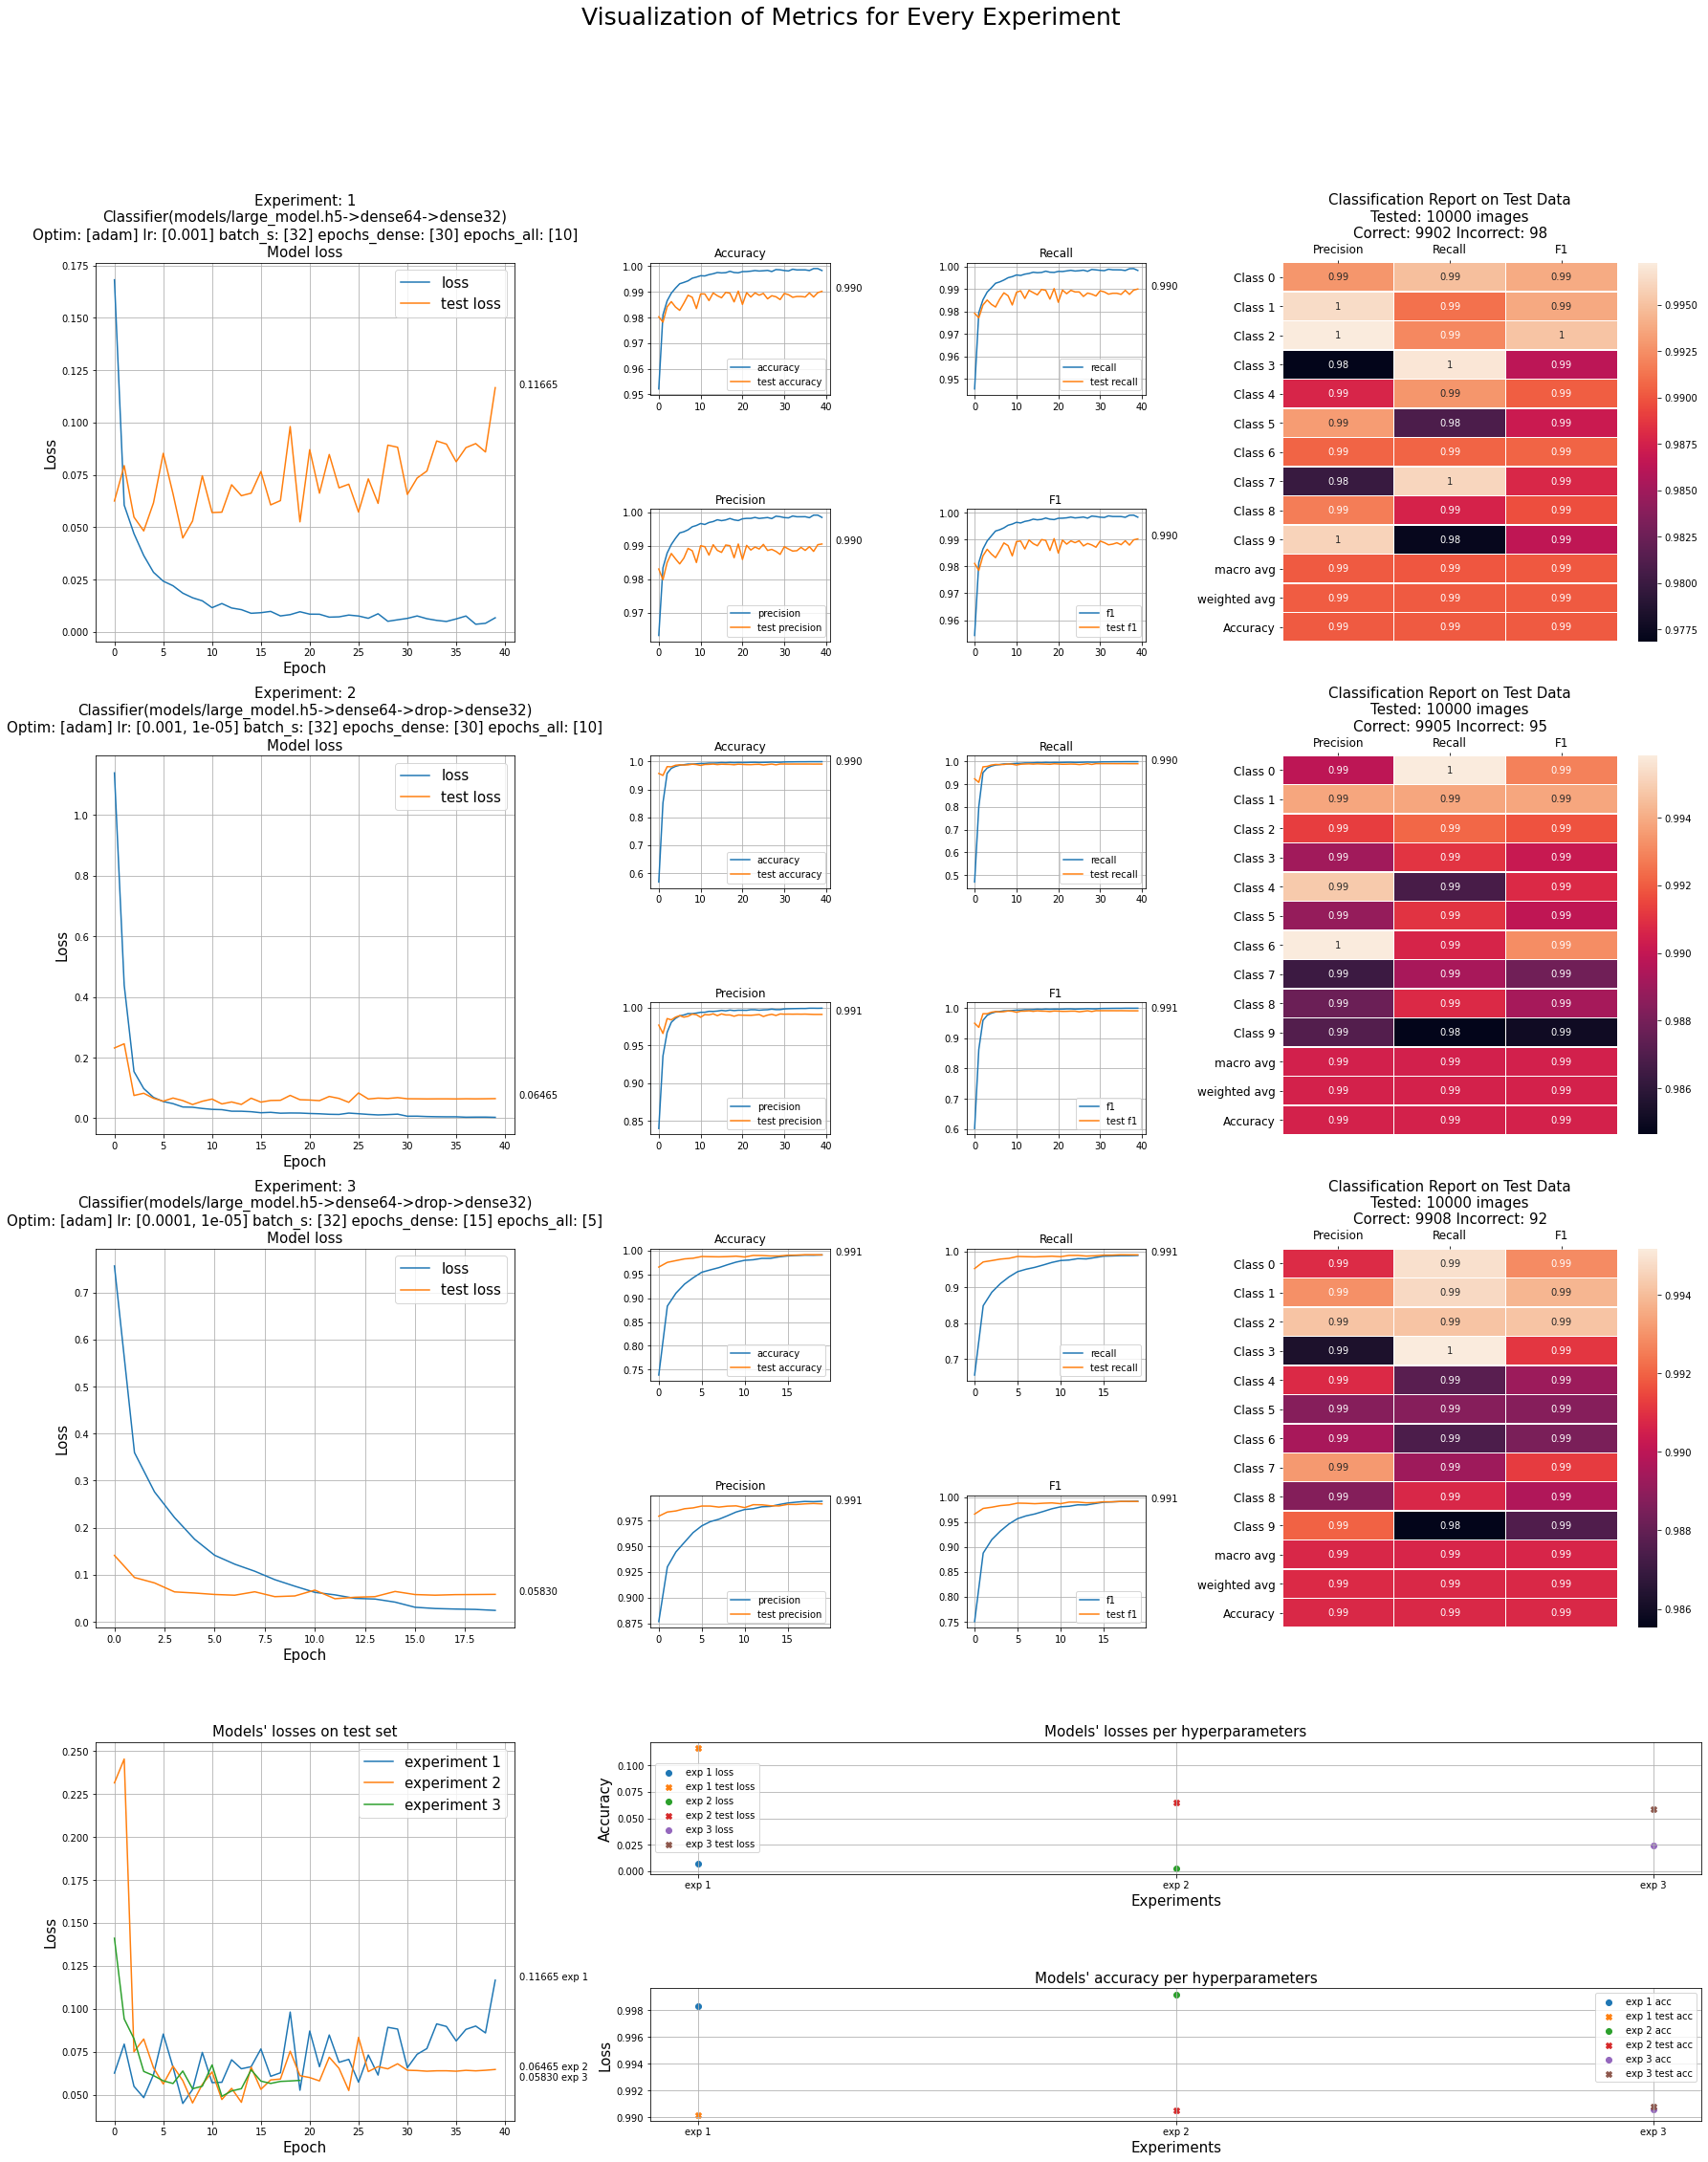

In [17]:
_ = classifier_loss_visualization(small_model_classifier_histories)

This model has as encoder the large model from the autoencoders with many layers. This model has the most parameters and has a large capacity in terms of the description of the data set.

Its use with the small dense model has resulted in an improved score from all other classification models, as the many layers of the encoder have encapsulated more features of the images and these many features along with a simple dense, that is tested and has already very good results in the classifier has given the best result so far, without much overfitting and with great accuracy

At first it had a slight overfitting but with dropout it was solved.

Adding the best set of hyperparametres to the classifiers experiment list

and save it


In [18]:
classifier_experiment_histories.append(small_model_classifier_histories[2])
small_model_classifier_histories[2].model.save("large_encoder_small_dense_classifier.h5")

## Large Encoder + Medium Dense

### Default Medium Dense with Dropout

Train only dense layer
Epoch 1/25
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4494 - accuracy: 0.8618 - Precision: 0.9291 - Recall: 0.8257 - val_loss: 0.1732 - val_accuracy: 0.9631 - val_Precision: 0.9685 - val_Recall: 0.9568
Epoch 2/25
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1313 - accuracy: 0.9650 - Precision: 0.9748 - Recall: 0.9557 - val_loss: 0.1071 - val_accuracy: 0.9764 - val_Precision: 0.9791 - val_Recall: 0.9741
Epoch 3/25
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0820 - accuracy: 0.9803 - Precision: 0.9845 - Recall: 0.9758 - val_loss: 0.0784 - val_accuracy: 0.9836 - val_Precision: 0.9847 - val_Recall: 0.9822
Epoch 4/25
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0591 - accuracy: 0.9844 - Precision: 0.9874 - Recall: 0.9817 - val_loss: 0.0419 - val_accuracy: 0.9898 - val_Precision: 0.9911 - val_Recall: 0.9891
Epoch 5/25
1875/1875 [==============================] - 29s 15ms/

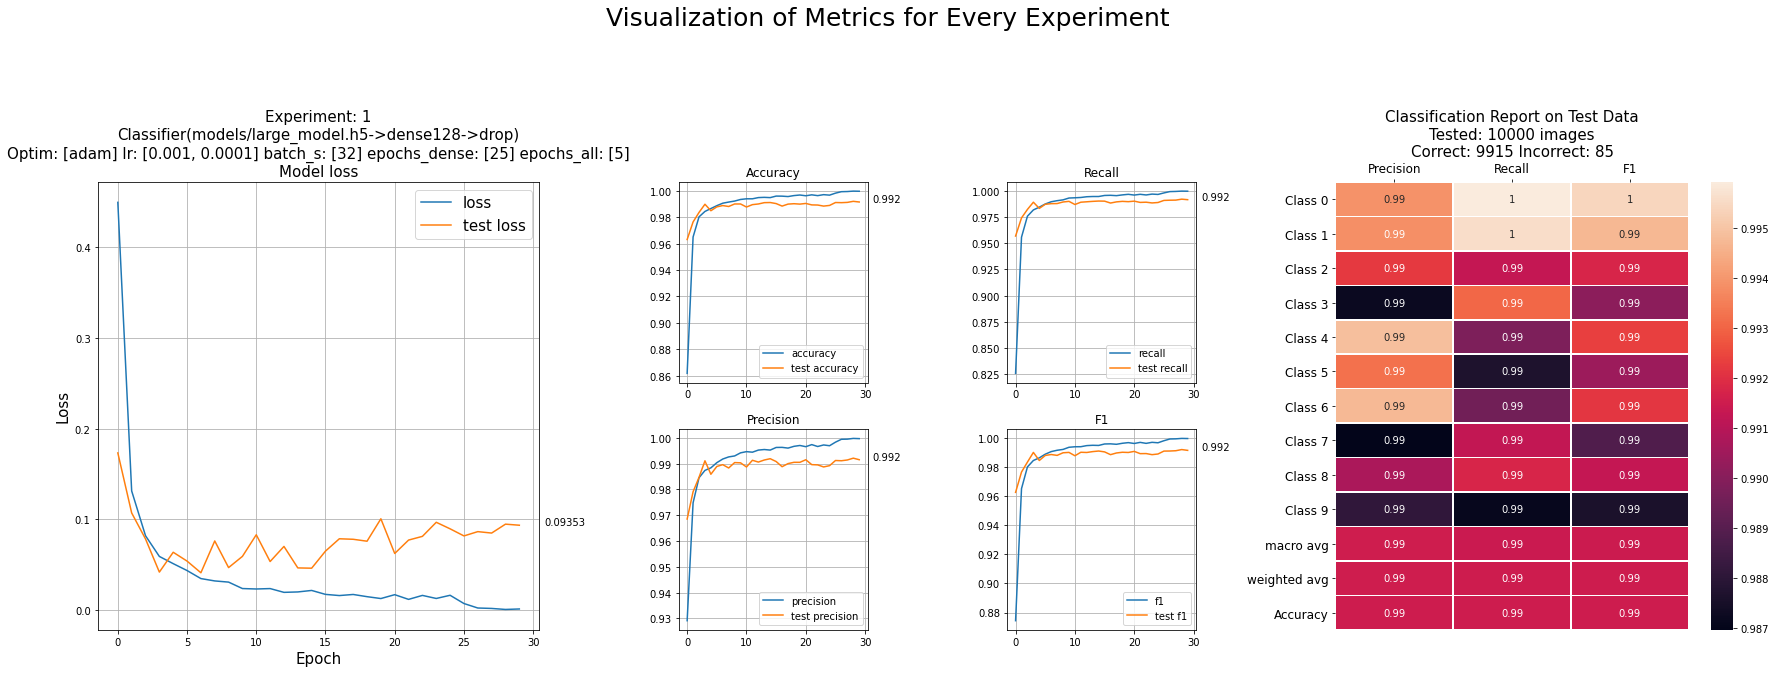

In [14]:
medium_model_classifier_histories = []
medium_model_classifier_info = {"dense_layers" : [["dense", 128],
                                                 ["drop", 0.5]]
                                ,
                                "encoder_layers" : "models/large_model.h5"
                                ,
                                "optimizer" :   ["adam", 0.001, 1e-4]
                                ,
                                "dense_only_train_epochs": 25
                                ,
                                "full_train_epochs": 5
                                ,
                                "batch_size": 32
                                }


# get model
medium_model_classifier = get_Classifier(medium_model_classifier_info, train_X, num_of_classes)
# train it
medium_model_classifier_history = train_Classifier(medium_model_classifier, medium_model_classifier_info, train_X, train_Y, test_X, test_Y)
# save it
medium_model_classifier_histories.append(medium_model_classifier_history)
# plot it
_ = classifier_loss_visualization([medium_model_classifier_history])

### Adding more Dropout and use smaller learning rate

Train only dense layer
Epoch 1/25
1875/1875 [==============================] - 29s 15ms/step - loss: 2.2713 - accuracy: 0.1397 - Precision: 0.8733 - Recall: 0.0271 - val_loss: 2.0644 - val_accuracy: 0.2182 - val_Precision: 0.9902 - val_Recall: 0.0912
Epoch 2/25
1875/1875 [==============================] - 28s 15ms/step - loss: 2.2322 - accuracy: 0.1432 - Precision: 0.9783 - Recall: 0.0301 - val_loss: 2.0719 - val_accuracy: 0.2053 - val_Precision: 0.9965 - val_Recall: 0.0864
Epoch 3/25
1875/1875 [==============================] - 28s 15ms/step - loss: 2.2019 - accuracy: 0.1556 - Precision: 0.9797 - Recall: 0.0427 - val_loss: 2.0689 - val_accuracy: 0.2088 - val_Precision: 0.9639 - val_Recall: 0.0934
Epoch 4/25
1875/1875 [==============================] - 28s 15ms/step - loss: 2.1177 - accuracy: 0.1854 - Precision: 0.9853 - Recall: 0.0725 - val_loss: 2.0731 - val_accuracy: 0.2105 - val_Precision: 0.9785 - val_Recall: 0.0954
Epoch 5/25
1875/1875 [==============================] - 28s 15ms/

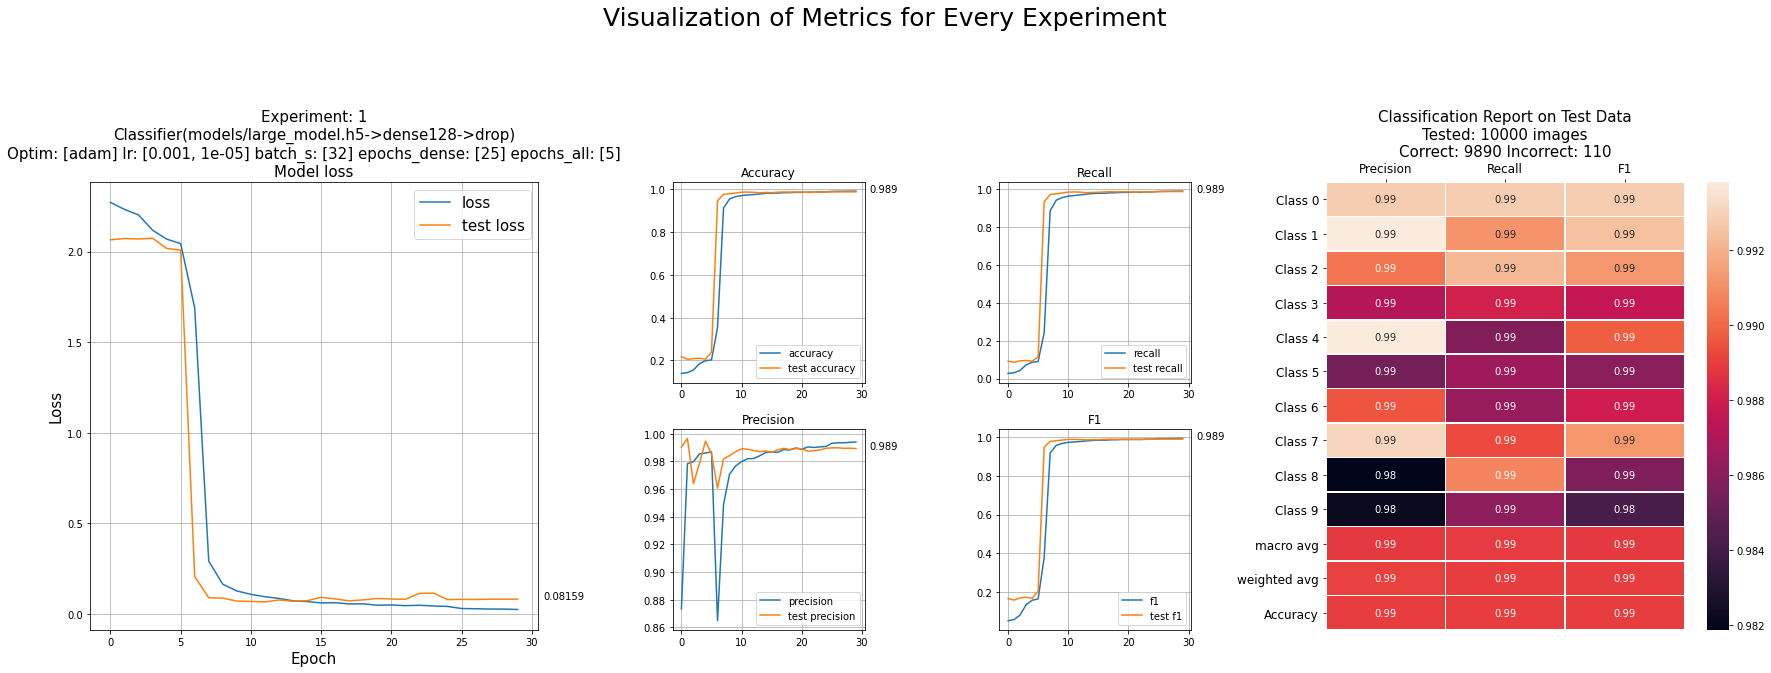

In [15]:
medium_model_classifier_info = {"dense_layers" : [["dense", 128],
                                                 ["drop", 0.8]]
                                ,
                                "encoder_layers" : "models/large_model.h5"
                                ,
                                "optimizer" :   ["adam", 0.001, 1e-5]
                                ,
                                "dense_only_train_epochs": 25
                                ,
                                "full_train_epochs": 5
                                ,
                                "batch_size": 32
                                }


# get model
medium_model_classifier = get_Classifier(medium_model_classifier_info, train_X, num_of_classes)
# train it
medium_model_classifier_history = train_Classifier(medium_model_classifier, medium_model_classifier_info, train_X, train_Y, test_X, test_Y)
# save it
medium_model_classifier_histories.append(medium_model_classifier_history)
# plot it
_ = classifier_loss_visualization([medium_model_classifier_history])

### Using less neurons

Train only dense layer
Epoch 1/25
1875/1875 [==============================] - 28s 15ms/step - loss: 0.8040 - accuracy: 0.7140 - Precision: 0.8709 - Recall: 0.6388 - val_loss: 0.1432 - val_accuracy: 0.9618 - val_Precision: 0.9724 - val_Recall: 0.9535
Epoch 2/25
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2179 - accuracy: 0.9295 - Precision: 0.9604 - Recall: 0.9133 - val_loss: 0.0693 - val_accuracy: 0.9825 - val_Precision: 0.9852 - val_Recall: 0.9796
Epoch 3/25
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0917 - accuracy: 0.9758 - Precision: 0.9817 - Recall: 0.9698 - val_loss: 0.1194 - val_accuracy: 0.9729 - val_Precision: 0.9770 - val_Recall: 0.9693
Epoch 4/25
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0632 - accuracy: 0.9836 - Precision: 0.9866 - Recall: 0.9807 - val_loss: 0.0547 - val_accuracy: 0.9862 - val_Precision: 0.9884 - val_Recall: 0.9828
Epoch 5/25
1875/1875 [==============================] - 28s 15ms/

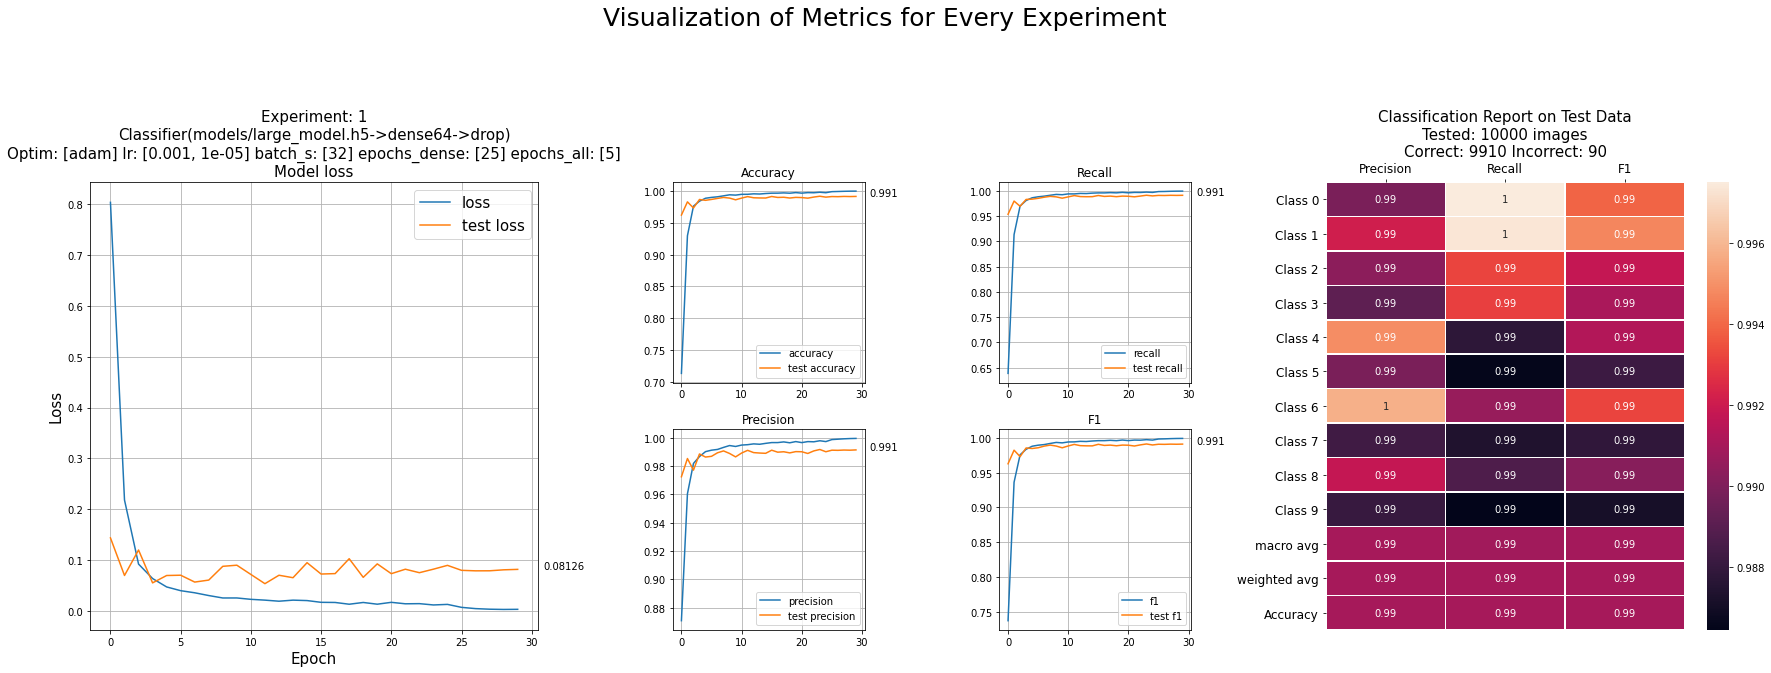

In [16]:
medium_model_classifier_info = {"dense_layers" : [["dense", 64],
                                                 ["drop", 0.4]]
                                ,
                                "encoder_layers" : "models/large_model.h5"
                                ,
                                "optimizer" :   ["adam", 0.001, 1e-5]
                                ,
                                "dense_only_train_epochs": 25
                                ,
                                "full_train_epochs": 5
                                ,
                                "batch_size": 32
                                }


# get model
medium_model_classifier = get_Classifier(medium_model_classifier_info, train_X, num_of_classes)
# train it
medium_model_classifier_history = train_Classifier(medium_model_classifier, medium_model_classifier_info, train_X, train_Y, test_X, test_Y)
# save it
medium_model_classifier_histories.append(medium_model_classifier_history)
# plot it
_ = classifier_loss_visualization([medium_model_classifier_history])

### Large Encoder + Medium Dense overview

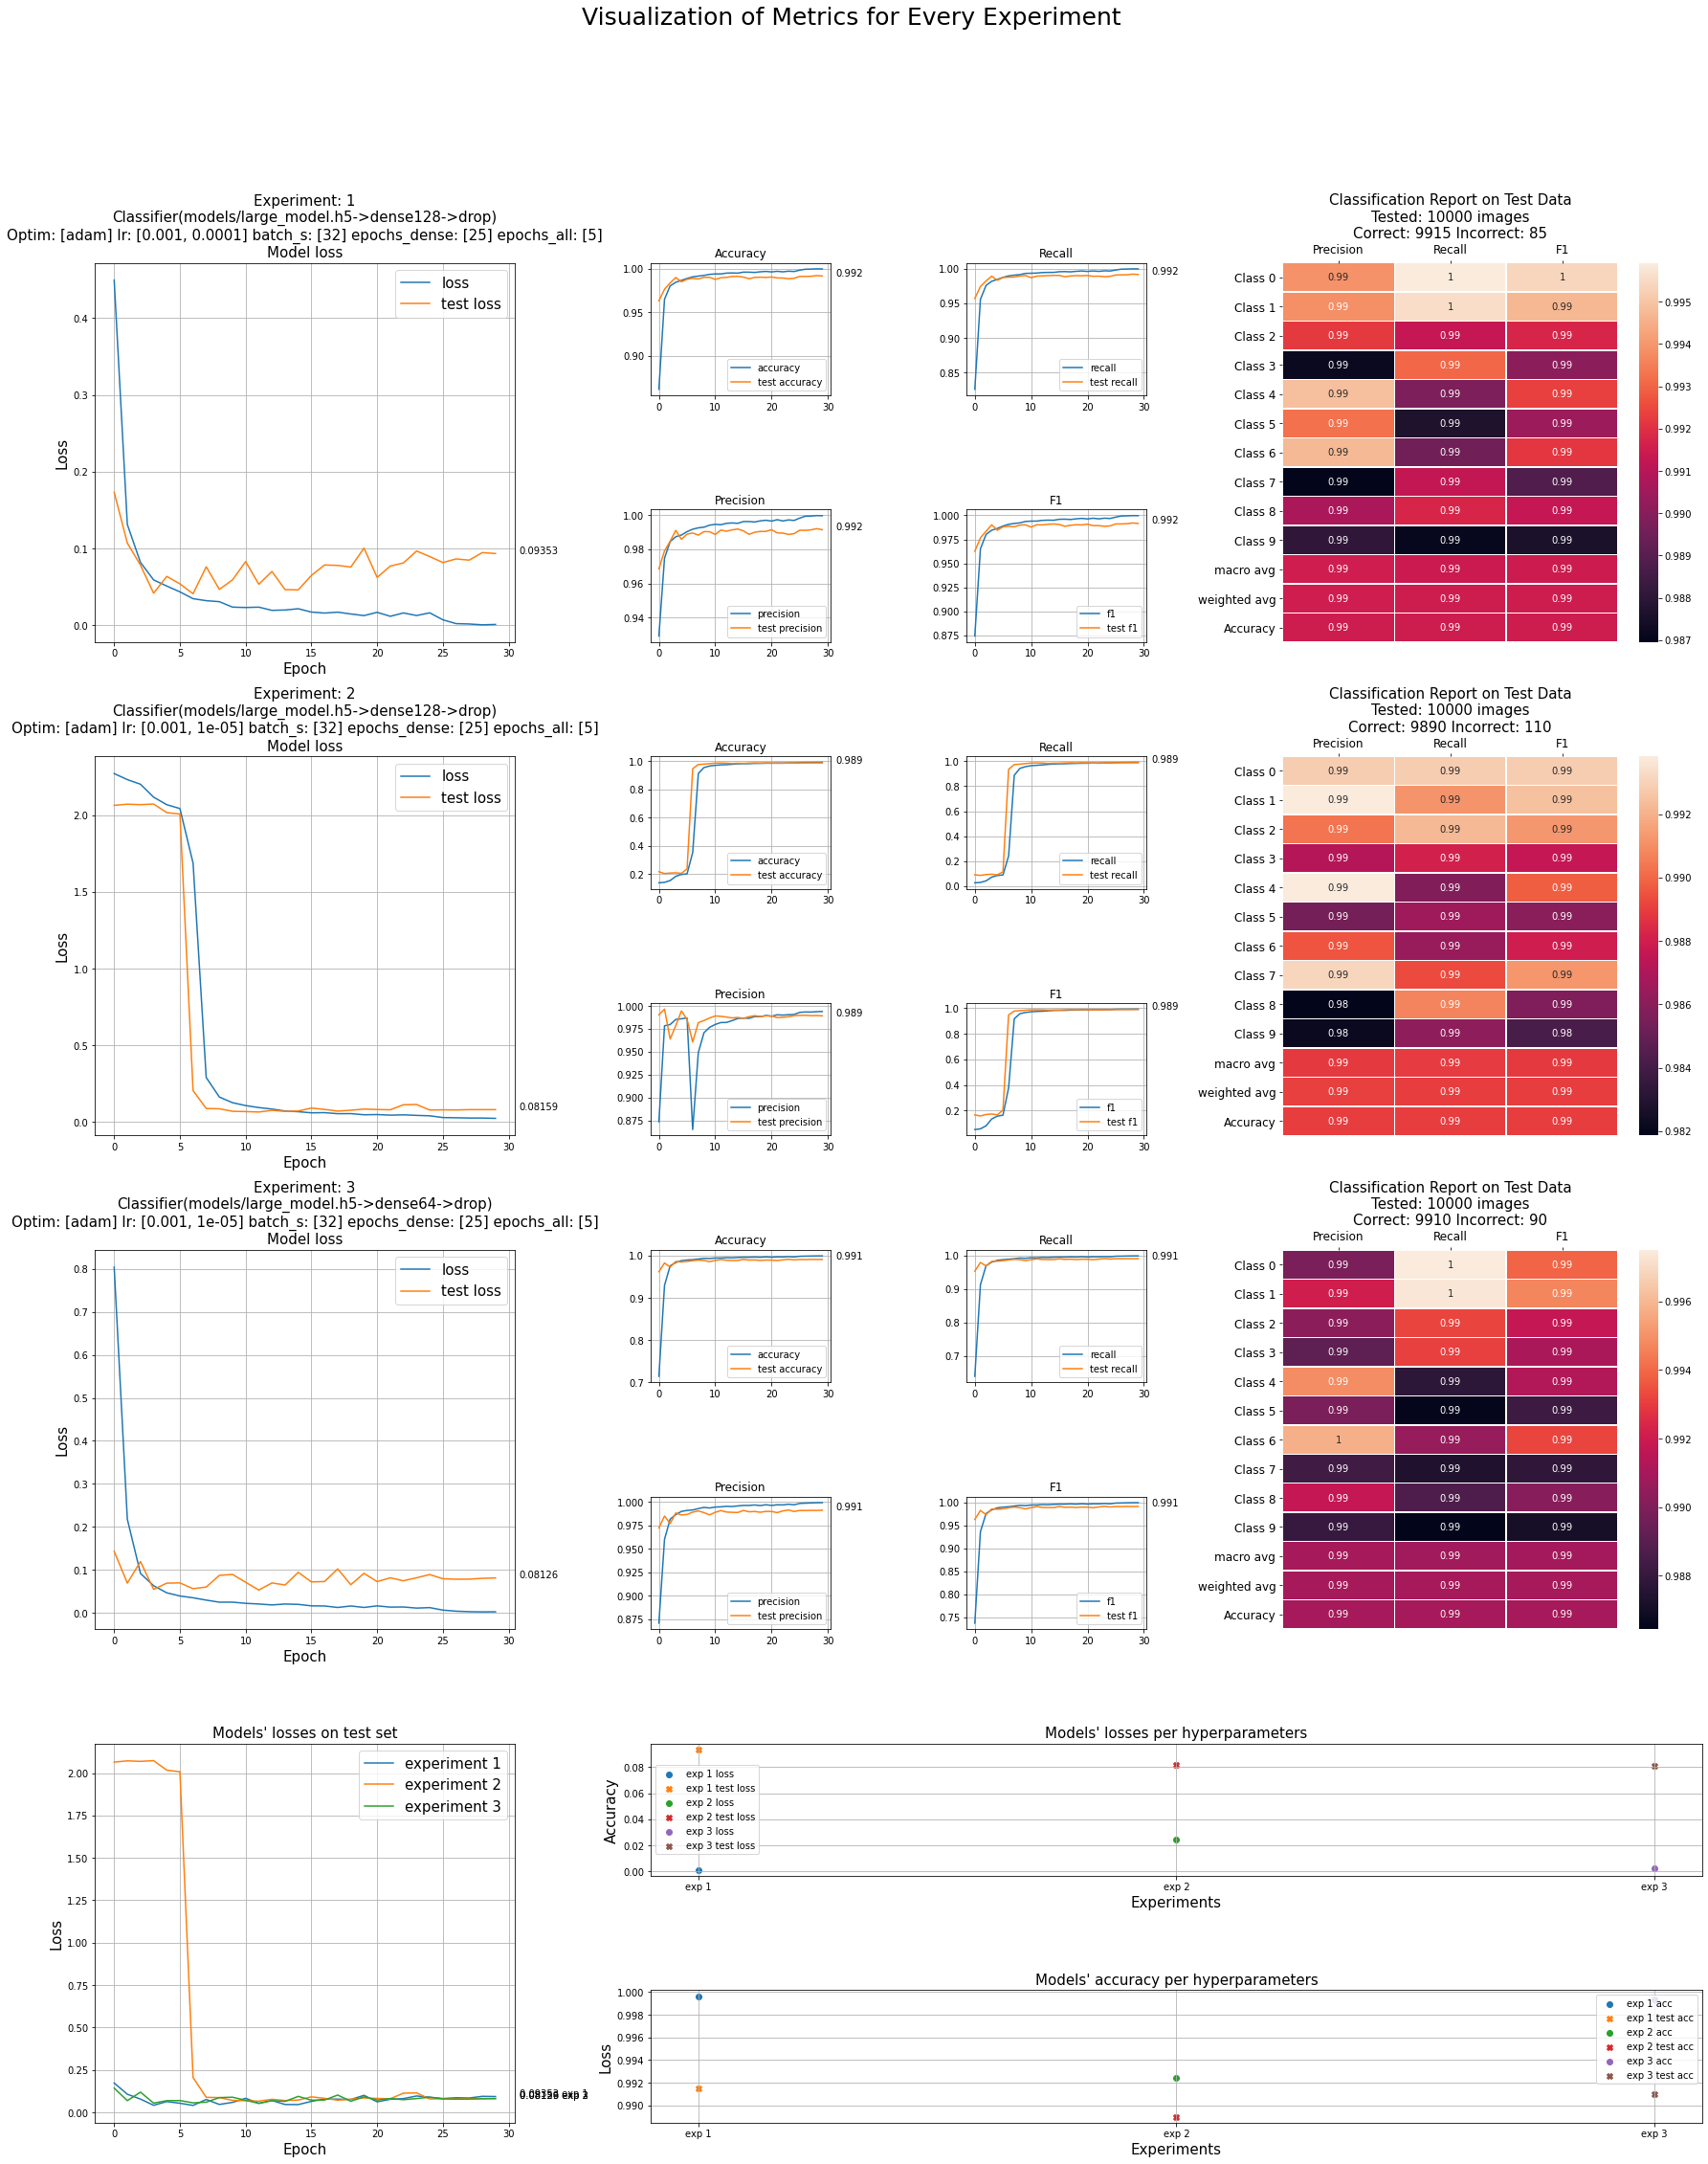

In [19]:
_ = classifier_loss_visualization(medium_model_classifier_histories)

As the micro dense had good results the slightly larger one with 128 neurons but only with a dense layer model manages to have the accuracy so far.

Before that you notice more overfittng compared to other models that have such good accuracy.

Adding the best set of hyperparametres to the classifiers experiment list

and save it


In [20]:
classifier_experiment_histories.append(medium_model_classifier_histories[-1])
medium_model_classifier_histories[-1].model.save("large_encoder_medium_dense_classifier.h5")

## Final Classifier Overview

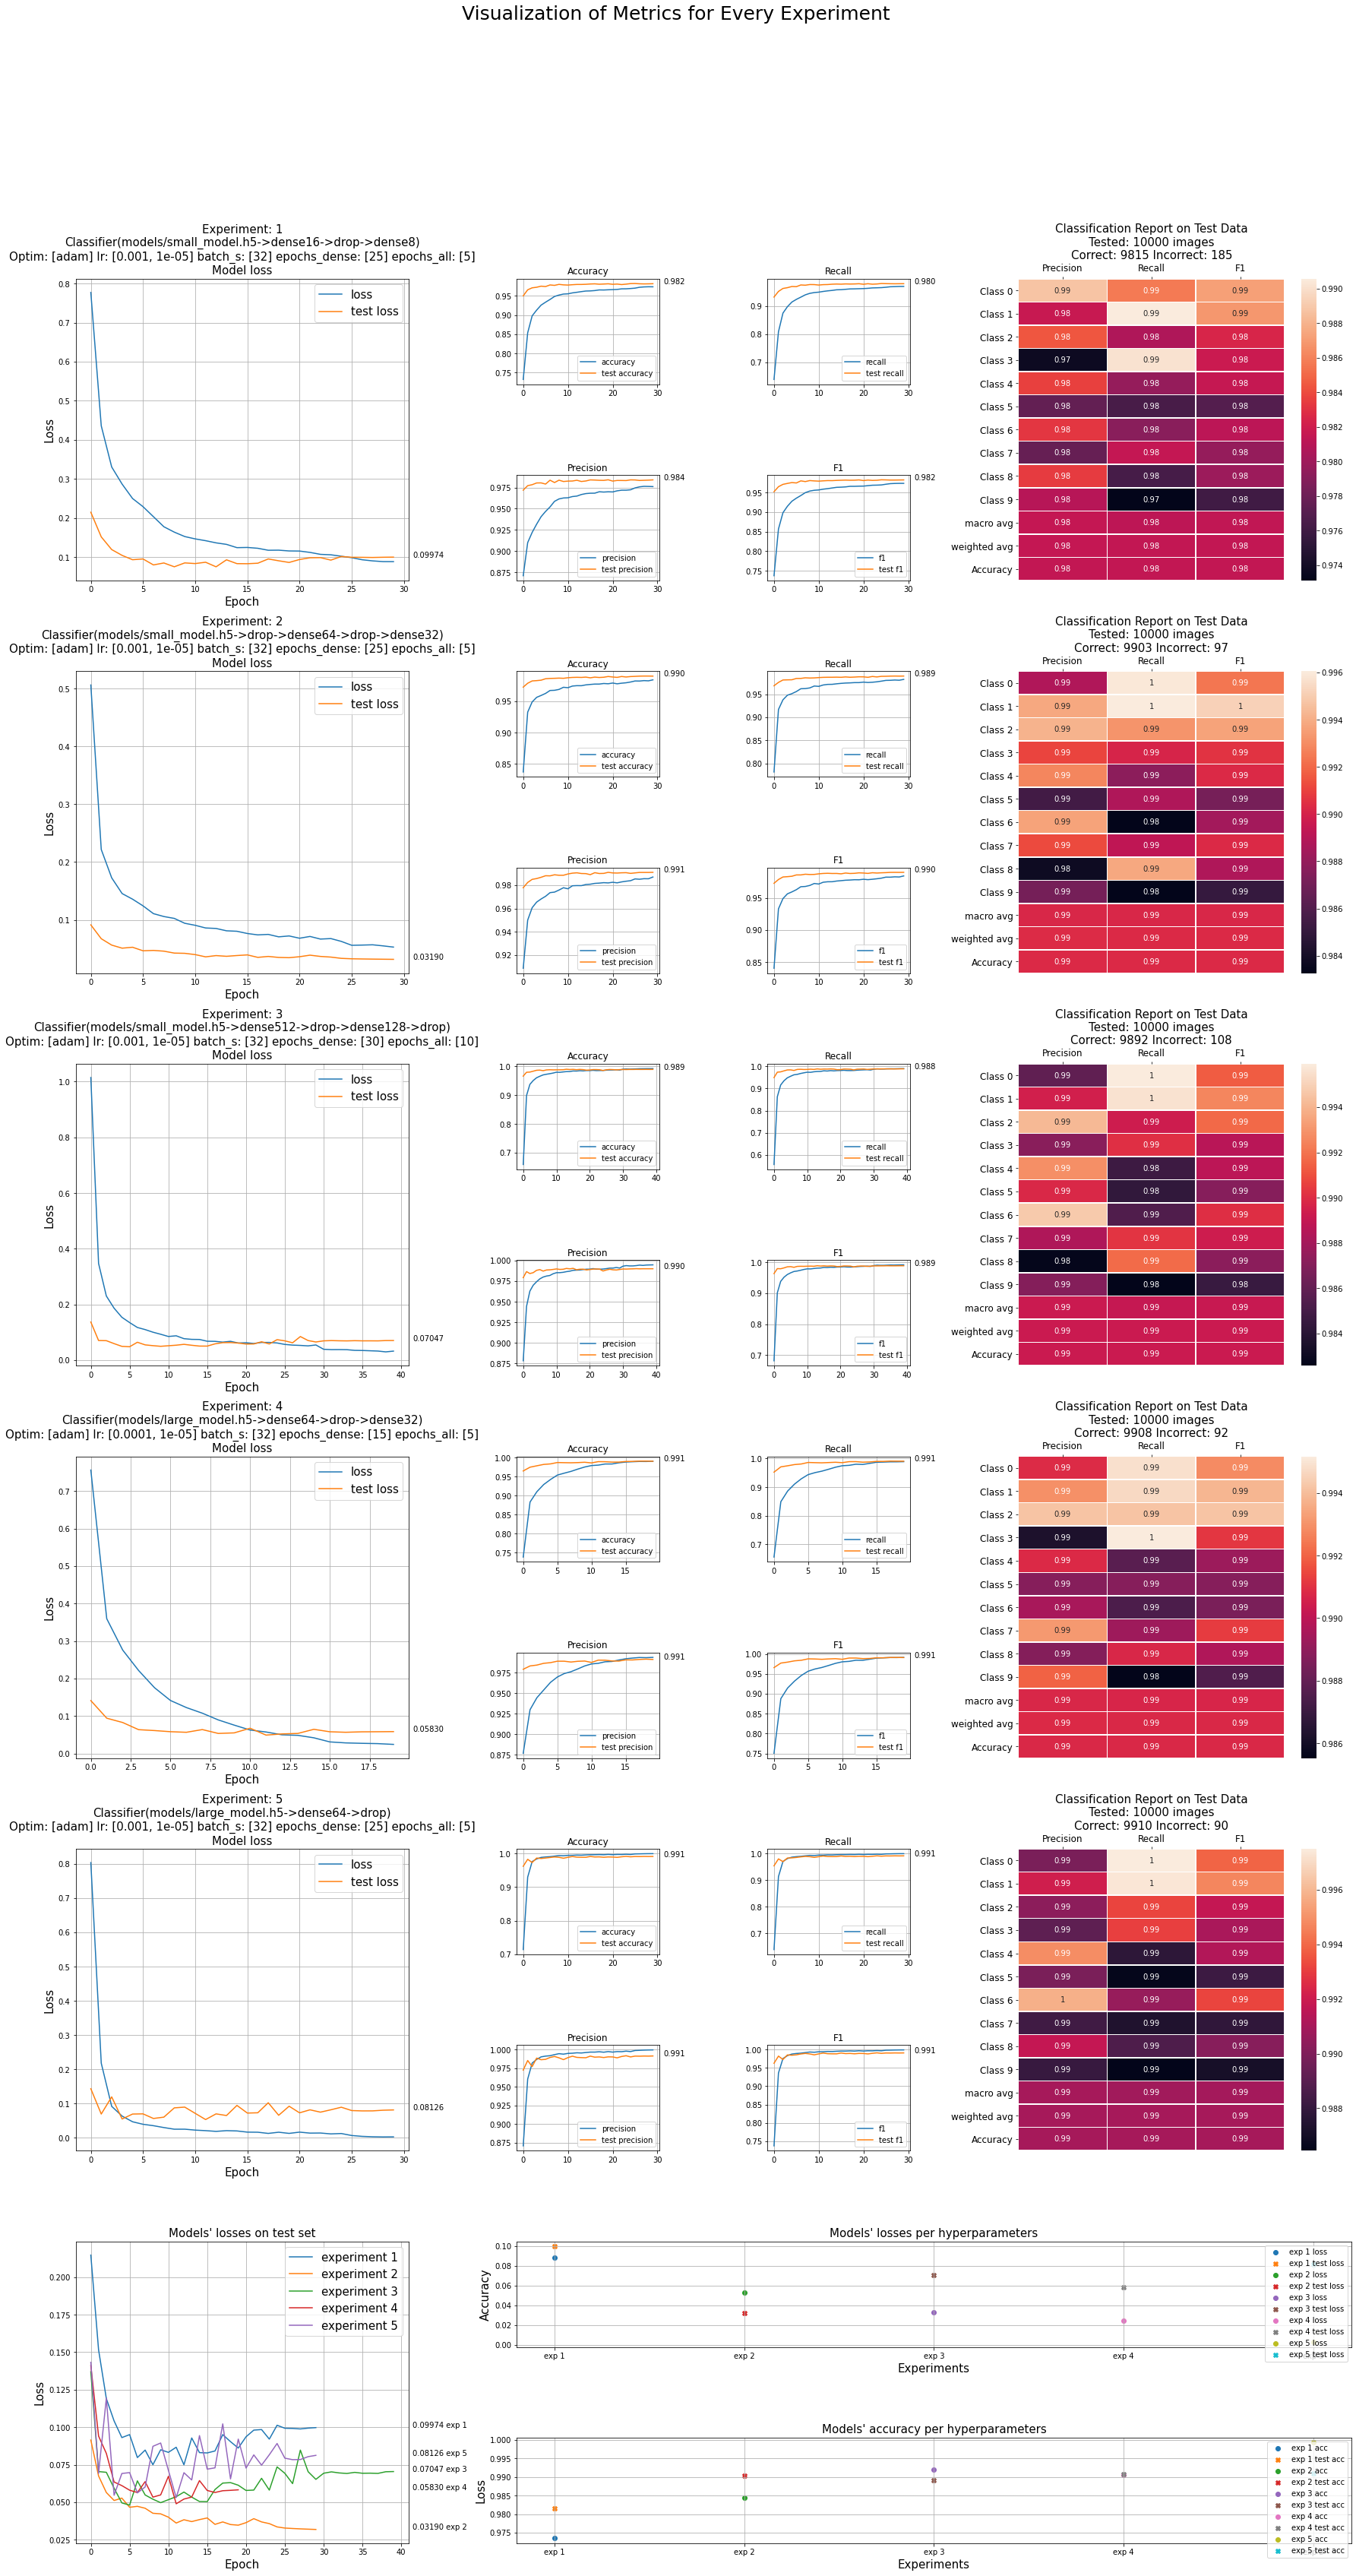

In [21]:
_ = classifier_loss_visualization(classifier_experiment_histories)

The final models have large differences between error and accuracy, however these values are very small with a short range of 0.02.

The one that has the highest accuracy is the model 5 and the one with the smallest error difference between train and test is 1

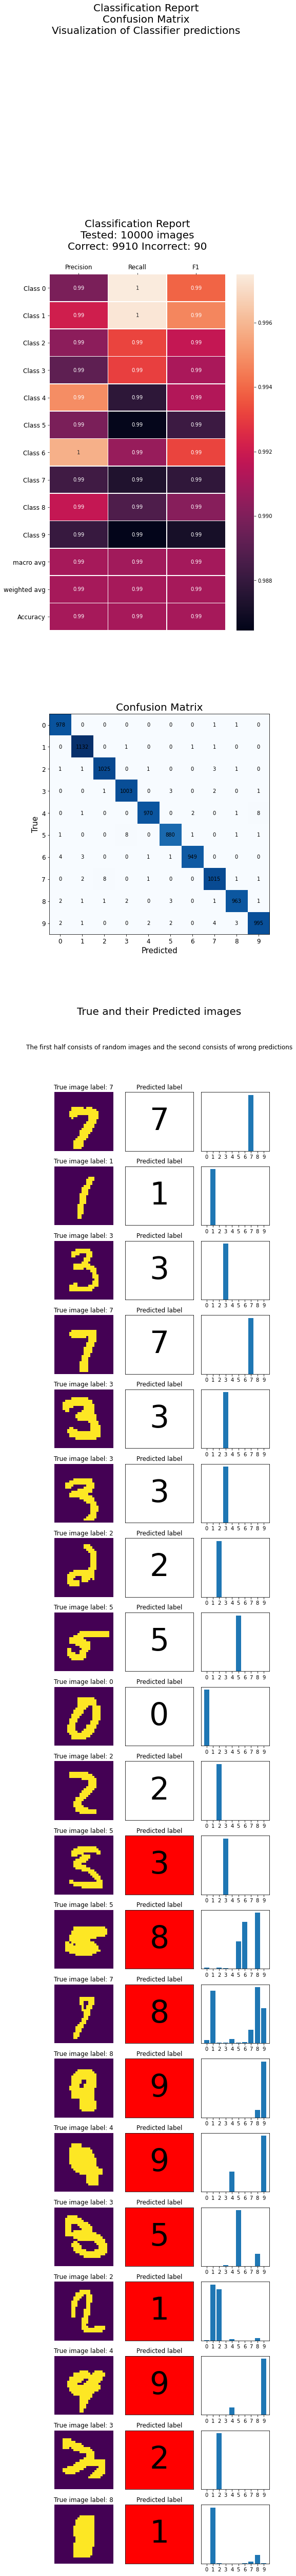

In [35]:
_ = classifier_prediction_visualization(classifier_experiment_histories[4].model, test_X, test_Y, 20)